# Project 4 : Ensemble Techniques - Travel Package Purchase Prediction

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 01/28/2022
---

# Description

## Background and Context


You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.



## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

---

### 1. Import  Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# to split the data into train and test
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics

# To build ensemble bagging models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# To build linear models
from sklearn.linear_model import LogisticRegression

# To build decision tree models
from sklearn.tree import DecisionTreeClassifier

# To build ensemble boosting models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To build xgboost boosting models
from xgboost import XGBClassifier

# To build stacking models
from sklearn.ensemble import StackingClassifier

<IPython.core.display.Javascript object>

### 2. Load Data

In [2]:
# Read data from excel file using pandas and create DataFrame object
tourism_data = pd.read_excel("Tourism.xlsx", sheet_name=1, index_col=0)

<IPython.core.display.Javascript object>

### 3. View Data

In [3]:
# checking number of columns and rows
print(f"There are {tourism_data.shape[0]} rows and {tourism_data.shape[1]} columns.")

There are 4888 rows and 19 columns.


<IPython.core.display.Javascript object>

In [4]:
# Check datatypes of each columns
tourism_data.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. Columns "ProdTaken","CityTier","NumberOfPersonVisiting","Passport","PitchSatisfactionScore" and "OwnCar" are integer data type
3. Columns "Age","DurationOfPitch","NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting" and "MonthlyIncome" are float datatype
4. Columns "TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus" and "Designation" are object datatypes. They must be checked further in order to convert them as a category or not.

In [5]:
# Additional check on data for null values
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  P

<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 200000 to 204887 which is the unique customer ID. Total rows is 4888
2. Column index is from 0 to 18. Total columns is 19
3. There are null values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome". **Missing value treatment is required for these columns**
4. **The target variable is "ProdTaken."** It does not have null values

In [6]:
# Check head
tourism_data.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
CustomerID                                                                
200000              1  41.0     Self Enquiry         3              6.0   
200001              0  49.0  Company Invited         1             14.0   
200002              1  37.0     Self Enquiry         1              8.0   
200003              0  33.0  Company Invited         1              9.0   
200004              0   NaN     Self Enquiry         1              8.0   

                Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
CustomerID                                                                      
200000            Salaried  Female                       3                3.0   
200001            Salaried    Male                       3                4.0   
200002         Free Lancer    Male                       3                4.0   
200003            Salaried  Female                       2                3.0   
200004      Small Business    Male                       2                3.0   

           ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
CustomerID                                                                      
200000             Deluxe                    3.0        Single            1.0   
200001             Deluxe                    4.0      Divorced            2.0   
200002              Basic                    3.0        Single            7.0   
200003              Basic                    3.0      Divorced            2.0   
200004              Basic                    4.0      Divorced            1.0   

            Passport  PitchSatisfactionScore  OwnCar  \
CustomerID                                             
200000             1                       2       1   
200001             0                       3       1   
200002             1                       3       0   
200003             1                       5       1   
200004             0                       5       1   

            NumberOfChildrenVisiting Designation  MonthlyIncome  
CustomerID                                                       
200000                           0.0     Manager        20993.0  
200001                           2.0     Manager        20130.0  
200002                           0.0   Executive        17090.0  
200003                           1.0   Executive        17909.0  
200004                           0.0   Executive        18468.0

<IPython.core.display.Javascript object>

In [7]:
# Check tail
tourism_data.tail()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
CustomerID                                                                
204883              1  49.0     Self Enquiry         3              9.0   
204884              1  28.0  Company Invited         1             31.0   
204885              1  52.0     Self Enquiry         3             17.0   
204886              1  19.0     Self Enquiry         3             16.0   
204887              1  36.0     Self Enquiry         1             14.0   

                Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
CustomerID                                                                      
204883      Small Business    Male                       3                5.0   
204884            Salaried    Male                       4                5.0   
204885            Salaried  Female                       4                4.0   
204886      Small Business    Male                       3                4.0   
204887            Salaried    Male                       4                4.0   

           ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
CustomerID                                                                      
204883             Deluxe                    4.0     Unmarried            2.0   
204884              Basic                    3.0        Single            3.0   
204885           Standard                    4.0       Married            7.0   
204886              Basic                    3.0        Single            3.0   
204887              Basic                    4.0     Unmarried            3.0   

            Passport  PitchSatisfactionScore  OwnCar  \
CustomerID                                             
204883             1                       1       1   
204884             1                       3       1   
204885             0                       1       1   
204886             0                       5       0   
204887             1                       3       1   

            NumberOfChildrenVisiting     Designation  MonthlyIncome  
CustomerID                                                           
204883                           1.0         Manager        26576.0  
204884                           2.0       Executive        21212.0  
204885                           3.0  Senior Manager        31820.0  
204886                           2.0       Executive        20289.0  
204887                           2.0       Executive        24041.0

<IPython.core.display.Javascript object>

In [8]:
# Check sample
tourism_data.sample(5)

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
CustomerID                                                                
201729              1   NaN  Company Invited         1             35.0   
203921              0  31.0     Self Enquiry         1             31.0   
204820              1  35.0     Self Enquiry         1             14.0   
201915              0  55.0     Self Enquiry         3             24.0   
200459              0  41.0  Company Invited         1              8.0   

                Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
CustomerID                                                                      
201729      Small Business    Male                       3                4.0   
203921            Salaried    Male                       4                4.0   
204820            Salaried    Male                       4                4.0   
201915            Salaried  Female                       2                3.0   
200459            Salaried  Female                       3                4.0   

           ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
CustomerID                                                                      
201729              Basic                    4.0        Single            1.0   
203921              Basic                    3.0       Married            3.0   
204820             Deluxe                    3.0       Married            3.0   
201915       Super Deluxe                    4.0        Single            4.0   
200459             Deluxe                    3.0     Unmarried            3.0   

            Passport  PitchSatisfactionScore  OwnCar  \
CustomerID                                             
201729             0                       3       0   
203921             0                       3       1   
204820             0                       3       0   
201915             0                       1       1   
200459             1                       2       0   

            NumberOfChildrenVisiting Designation  MonthlyIncome  
CustomerID                                                       
201729                           2.0   Executive        18479.0  
203921                           3.0   Executive        21371.0  
204820                           1.0     Manager        21263.0  
201915                           0.0         AVP        31835.0  
200459                           0.0     Manager        21811.0

<IPython.core.display.Javascript object>

#### Observation : 
1. Index is customer ID.
2. **ProdTaken is numerical and categorical. It is also the target variable**
3. Column "Age" is in years and is a continous variable
4. Columns "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" are strings and categorical variable. They can be typecast as Categorical. OneHotEncoding can be applied on these columns.
5. Columns "CityTier", "NumberOfPersonVisiting",	"NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "PitchSatisfactionScore" and "NumberOfChildrenVisiting" are sequential numbers
6. Column "DurationOfPitch" is probably in minutes and is a continous variable
7. Columns "Passport" and "OwnCar" are numbers and has only two values - 0 & 1

In [9]:
# Check basic summary
tourism_data.describe(include="all").T

count unique           top  freq          mean  \
ProdTaken                 4888.0    NaN           NaN   NaN      0.188216   
Age                       4662.0    NaN           NaN   NaN     37.622265   
TypeofContact               4863      2  Self Enquiry  3444           NaN   
CityTier                  4888.0    NaN           NaN   NaN      1.654255   
DurationOfPitch           4637.0    NaN           NaN   NaN     15.490835   
Occupation                  4888      4      Salaried  2368           NaN   
Gender                      4888      3          Male  2916           NaN   
NumberOfPersonVisiting    4888.0    NaN           NaN   NaN      2.905074   
NumberOfFollowups         4843.0    NaN           NaN   NaN      3.708445   
ProductPitched              4888      5         Basic  1842           NaN   
PreferredPropertyStar     4862.0    NaN           NaN   NaN      3.581037   
MaritalStatus               4888      4       Married  2340           NaN   
NumberOfTrips             4748.0    NaN           NaN   NaN      3.236521   
Passport                  4888.0    NaN           NaN   NaN      0.290917   
PitchSatisfactionScore    4888.0    NaN           NaN   NaN      3.078151   
OwnCar                    4888.0    NaN           NaN   NaN      0.620295   
NumberOfChildrenVisiting  4822.0    NaN           NaN   NaN      1.187267   
Designation                 4888      5     Executive  1842           NaN   
MonthlyIncome             4655.0    NaN           NaN   NaN  23619.853491   

                                  std     min      25%      50%      75%  \
ProdTaken                    0.390925     0.0      0.0      0.0      0.0   
Age                          9.316387    18.0     31.0     36.0     44.0   
TypeofContact                     NaN     NaN      NaN      NaN      NaN   
CityTier                     0.916583     1.0      1.0      1.0      3.0   
DurationOfPitch              8.519643     5.0      9.0     13.0     20.0   
Occupation                        NaN     NaN      NaN      NaN      NaN   
Gender                            NaN     NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.724891     1.0      2.0      3.0      3.0   
NumberOfFollowups            1.002509     1.0      3.0      4.0      4.0   
ProductPitched                    NaN     NaN      NaN      NaN      NaN   
PreferredPropertyStar        0.798009     3.0      3.0      3.0      4.0   
MaritalStatus                     NaN     NaN      NaN      NaN      NaN   
NumberOfTrips                1.849019     1.0      2.0      3.0      4.0   
Passport                     0.454232     0.0      0.0      0.0      1.0   
PitchSatisfactionScore       1.365792     1.0      2.0      3.0      4.0   
OwnCar                       0.485363     0.0      0.0      1.0      1.0   
NumberOfChildrenVisiting     0.857861     0.0      1.0      1.0      2.0   
Designation                       NaN     NaN      NaN      NaN      NaN   
MonthlyIncome             5380.698361  1000.0  20346.0  22347.0  25571.0   

                              max  
ProdTaken                     1.0  
Age                          61.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch             127.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        5.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                22.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             98678.0

<IPython.core.display.Javascript object>

#### Observation : 
1. There are missing values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome"
2. Columns "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" are strings and categorical variable
3. Columns "Age", "CityTier", "DurationOfPitch", "NumberOfPersonVisiting",	"NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "Passport", "PitchSatisfactionScore", "OwnCar" and "NumberOfChildrenVisiting" are numbers



### 4. Exploratory Data Analysis

#### A. Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, column, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="lightsalmon")
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, color="cornflowerblue"
    ) if bins else sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, color="cornflowerblue"
    )
    ax_hist2.axvline(data[column].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[column].median(), color="black", linestyle="-")
    plt.show()

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None, h=None, fig_size=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()

    if h is None:
        l = 0
    else:
        l = 20

    if fig_size is not None:
        plt.figure(figsize=(fig_size))
    else:
        if n is None:
            plt.figure(figsize=(l + count + 1, 5))
        else:
            plt.figure(figsize=(l + n + 2, 5))

    plt.xticks(rotation=45, fontsize=13)
    ax = sns.countplot(
        data=data,
        x=column,
        hue=h,
        palette="pastel",
        order=data[column].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

In [12]:
# Check datatypes of columns and apply above function to numerical columns
tourism_data.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

<IPython.core.display.Javascript object>

##### Univariate Analysis - Column "ProdTaken"

In [13]:
# Basic summary
tourism_data[["ProdTaken"]].describe()

ProdTaken
count  4888.000000
mean      0.188216
std       0.390925
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

<IPython.core.display.Javascript object>

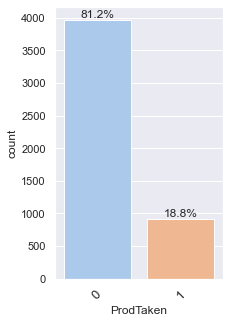

<IPython.core.display.Javascript object>

In [14]:
# Visualize data through plot
labeled_barplot(tourism_data, "ProdTaken", perc=True)

#### Observation of  column "ProdTaken": 
1. **This is the target variable**
2. It is a numerical column. But, it has only two values "0" and "1"
3. **Most of customers did not purchase travel package (81.2%). Target is to get more customers to purchase travel package.**

##### Univariate Analysis - Column "Age"

In [15]:
# Basic summary
tourism_data[["Age"]].describe()

Age
count  4662.000000
mean     37.622265
std       9.316387
min      18.000000
25%      31.000000
50%      36.000000
75%      44.000000
max      61.000000

<IPython.core.display.Javascript object>

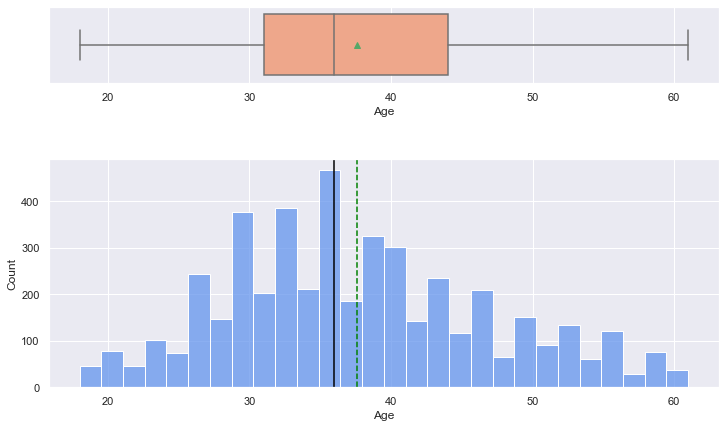

<IPython.core.display.Javascript object>

In [16]:
# Visualize data through plot
hist_boxplot(tourism_data, "Age")

#### Observation of  column "Age": 
1. It looks like a normal distribution.
2. It is not skewed
3. It has no outliers
4. Mean and Median are almost same
5. Mean is 37.622265 and median is 36
6. There are missing values and treatment is required

In [17]:
# Create bins for Age for ploting purpose
tourism_data["Age_Bin"] = pd.cut(
    tourism_data["Age"],
    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, np.inf],
    labels=[
        "Under 5",
        "6 to 10",
        "11 to 15",
        "16 to 20",
        "21 to 25",
        "26 to 30",
        "31 to 35",
        "36 to 40",
        "41 to 45",
        "46 to 50",
        "51 to 55",
        "56 to 60",
        "61 to 65",
        "Above 65",
    ],
)

<IPython.core.display.Javascript object>

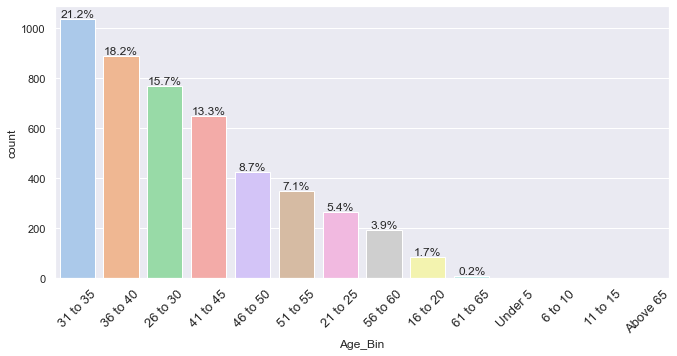

<IPython.core.display.Javascript object>

In [18]:
# Visualize data through plot
labeled_barplot(tourism_data, "Age_Bin", perc=True)

#### Observation of  column "Age_Bin": 
1. Most of the customers fall under age range 31 to 35
2. Second most of the customers fall under age range 36-40
3. Third most of the customers fall under age range 26-30
4. Customers of young age doesnt purchase travel packages. Probably because they dont have any job yet and so no money
5. Customers of old age doesnt purchase travel packages. Probably because they dont have good health to travel

##### Univariate Analysis - Column "TypeofContact"

In [19]:
# Basic summary
tourism_data[["TypeofContact"]].describe()

TypeofContact
count           4863
unique             2
top     Self Enquiry
freq            3444

<IPython.core.display.Javascript object>

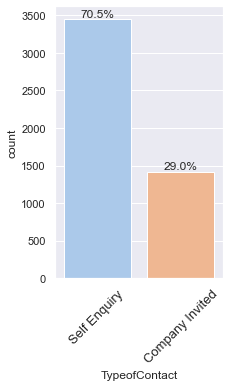

<IPython.core.display.Javascript object>

In [20]:
# Visualize data through plot
labeled_barplot(tourism_data, "TypeofContact", perc=True)

#### Observation of  column "TypeofContact": 
1. This is a categorical variable
2. There are only two values "Self Enquiry" and "Company Invited"
3. Most of the customers were contacted by "Self Enquiry" (70.5%) compared to "Company Invited" (29.0%)
4. There are missing values. Since this is a categorical variable, mode ("Self Enquiry") must be used to treat missing values

##### Univariate Analysis - Column "CityTier"

In [21]:
# Basic summary
tourism_data[["CityTier"]].describe()

CityTier
count  4888.000000
mean      1.654255
std       0.916583
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000

<IPython.core.display.Javascript object>

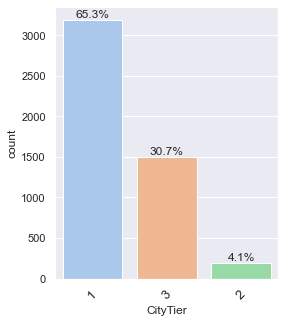

<IPython.core.display.Javascript object>

In [22]:
# Visualize data through plot
labeled_barplot(tourism_data, "CityTier", perc=True)

#### Observation of  column "CityTier": 
1. It is a numerical column. But, it has only three values 1,2 and 3
2. Its value depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
3. Tier 1 cities are more (65.3%) followed by Tier 3 (30.7%) and Tier 2 (4.1%)
4. There are no missing values

##### Univariate Analysis - Column "DurationOfPitch"

In [23]:
# Basic summary
tourism_data[["DurationOfPitch"]].describe()

DurationOfPitch
count      4637.000000
mean         15.490835
std           8.519643
min           5.000000
25%           9.000000
50%          13.000000
75%          20.000000
max         127.000000

<IPython.core.display.Javascript object>

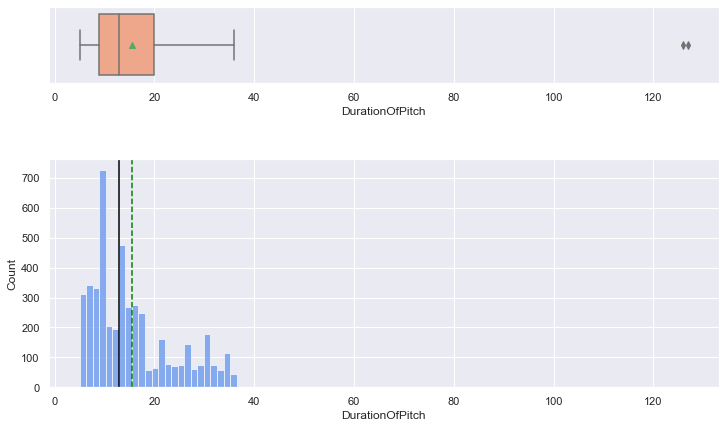

<IPython.core.display.Javascript object>

In [24]:
# Visualize data through plot
hist_boxplot(tourism_data, "DurationOfPitch")

#### Observation of  column "DurationOfPitch": 
1. It looks like a normal distribution.
2. It is not much skewed
3. It has outliers and and treatment may be required 
4. Mean and Median are almost same
5. Mean is 15.490835 and median is 13
6. There are missing values and treatment is required

In [25]:
# Create bins for Duration of Pitch for ploting purpose
tourism_data["DurationOfPitch_Bin"] = pd.cut(
    tourism_data["DurationOfPitch"],
    [0, 5, 10, 15, 20, 25, 30, 35, 40, np.inf],
    labels=[
        "Under 5",
        "6 to 10",
        "11 to 15",
        "16 to 20",
        "21 to 25",
        "26 to 30",
        "31 to 35",
        "36 to 40",
        "Above 40",
    ],
)

<IPython.core.display.Javascript object>

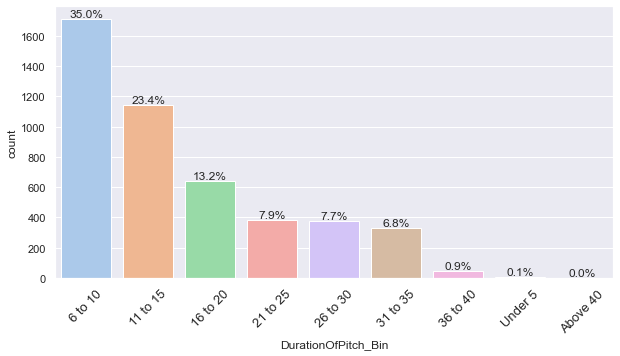

<IPython.core.display.Javascript object>

In [26]:
# Visualize data through plot
labeled_barplot(tourism_data, "DurationOfPitch_Bin", perc=True)

#### Observation of  column "DurationOfPitch_Bin": 
1. Most of the customers had sales pitch duration in range 6 to 10
2. Second most of the customers had sales pitch duration in range 11 to 15
3. Third most of the customers had sales pitch duration in range 16 to 20
4. Very few customers had sales pitch duration less than 5 and above 35

##### Univariate Analysis - Column "Occupation"

In [27]:
# Basic summary
tourism_data[["Occupation"]].describe()

Occupation
count        4888
unique          4
top      Salaried
freq         2368

<IPython.core.display.Javascript object>

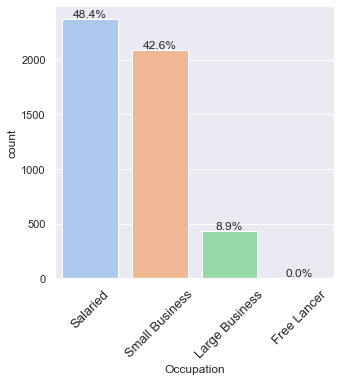

<IPython.core.display.Javascript object>

In [28]:
# Visualize data through plot
labeled_barplot(tourism_data, "Occupation", perc=True)

#### Observation of  column "Occupation": 
1. This is a categorical variable
2. There are only four values "Salaried", "Small Business", "Large Business" and "Free Lancer"
3. Most of the customers were "Salaried" (48.4%) followed by "Small Business" (42.6%), "Large Business" (8.9%) and "Free Lancer" (0.0%)
4. There are no missing values

##### Univariate Analysis - Column "Gender"

In [29]:
# Basic summary
tourism_data[["Gender"]].describe()

Gender
count    4888
unique      3
top      Male
freq     2916

<IPython.core.display.Javascript object>

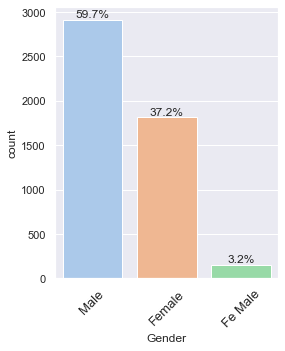

<IPython.core.display.Javascript object>

In [30]:
# Visualize data through plot
labeled_barplot(tourism_data, "Gender", perc=True)

#### Observation of  column "Gender": 
1. This is a categorical variable
2. There are three values "Male", "Female" and "Fe Male". **However, "Fe Male" looks like a mistake of "Female". Need to correct this data.**
3. Most of the customers were "Male" (59.7%) followed by "Female" (37.2%) and "Fe Male" (3.2%)
4. There are no missing values

##### Univariate Analysis - Column "NumberOfPersonVisiting"

In [31]:
# Basic summary
tourism_data[["NumberOfPersonVisiting"]].describe()

NumberOfPersonVisiting
count             4888.000000
mean                 2.905074
std                  0.724891
min                  1.000000
25%                  2.000000
50%                  3.000000
75%                  3.000000
max                  5.000000

<IPython.core.display.Javascript object>

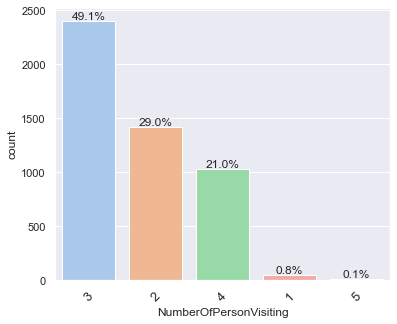

<IPython.core.display.Javascript object>

In [32]:
# Visualize data through plot
labeled_barplot(tourism_data, "NumberOfPersonVisiting", perc=True)

#### Observation of  column "NumberOfPersonVisiting": 
1. It is a numerical column. But, it has only five values 1,2,3,4 and 5.
2. Most of the customers had "3" persons travelling with them (49.1%) followed by "2" (29.0%), "4" (21.0%), "1" (0.8%) and "5" (0.1%)
3. There are no missing values

##### Univariate Analysis - Column "NumberOfFollowups"

In [33]:
# Basic summary
tourism_data[["NumberOfFollowups"]].describe()

NumberOfFollowups
count        4843.000000
mean            3.708445
std             1.002509
min             1.000000
25%             3.000000
50%             4.000000
75%             4.000000
max             6.000000

<IPython.core.display.Javascript object>

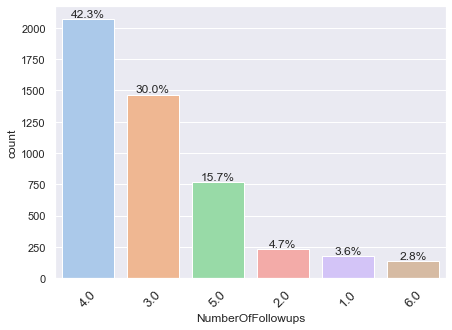

<IPython.core.display.Javascript object>

In [34]:
# Visualize data through plot
labeled_barplot(tourism_data, "NumberOfFollowups", perc=True)

#### Observation of  column "NumberOfFollowups": 
1. It is a numerical column. But, it has only six values 1,2,3,4,5 and 6.
2. Most of the customers had to be followed up "4" times (42.3%) followed by "3" (30.0%), "5" (15.7%), "2" (4.7%), "1" (3.6%) and "6" (2.8%)
3. There are missing values. Since this is a numerical variable, median ("4") can be used to treat missing values

##### Univariate Analysis - Column "ProductPitched"

In [35]:
# Basic summary
tourism_data[["ProductPitched"]].describe()

ProductPitched
count            4888
unique              5
top             Basic
freq             1842

<IPython.core.display.Javascript object>

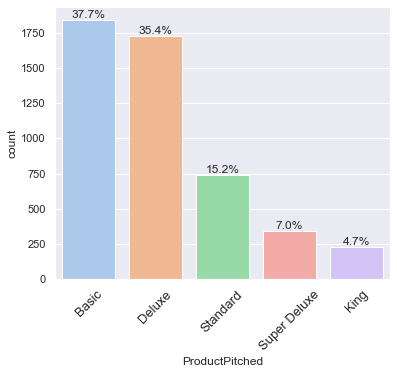

<IPython.core.display.Javascript object>

In [36]:
# Visualize data through plot
labeled_barplot(tourism_data, "ProductPitched", perc=True)

#### Observation of  column "ProductPitched": 
1. It is a categorical column
2. It has five values "Basic", "Deluxe", "Standard", "Super Deluxe" and "King"
3. Most of the customers were sales pitched with "Basic" (37.7%) followed by "Deluxe" (35.4%), "Standard" (15.2%), "Super Deluxe" (7.0%) and "King" (4.7%)
4. There are no missing values

##### Univariate Analysis - Column "PreferredPropertyStar"

In [37]:
# Basic summary
tourism_data[["PreferredPropertyStar"]].describe()

PreferredPropertyStar
count            4862.000000
mean                3.581037
std                 0.798009
min                 3.000000
25%                 3.000000
50%                 3.000000
75%                 4.000000
max                 5.000000

<IPython.core.display.Javascript object>

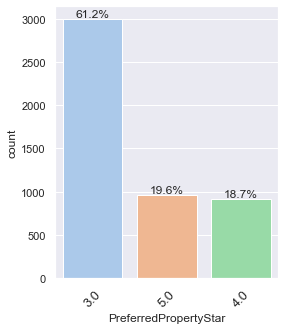

<IPython.core.display.Javascript object>

In [38]:
# Visualize data through plot
labeled_barplot(tourism_data, "PreferredPropertyStar", perc=True)

#### Observation of  column "PreferredPropertyStar": 
1. It is a numerical column. But, it has only three values 3,4 and 5
2. Most of the customers preferred hotels with stars "3" (61.2%) followed by "5" (19.6%), and "4" (18.7%)
3. There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values

##### Univariate Analysis - Column "MaritalStatus"

In [39]:
# Basic summary
tourism_data[["MaritalStatus"]].describe()

MaritalStatus
count           4888
unique             4
top          Married
freq            2340

<IPython.core.display.Javascript object>

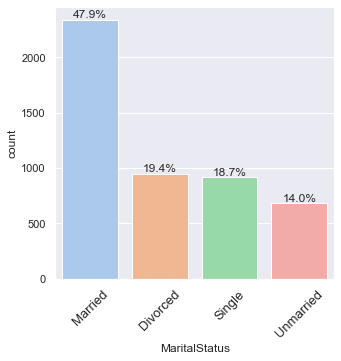

<IPython.core.display.Javascript object>

In [40]:
# Visualize data through plot
labeled_barplot(tourism_data, "MaritalStatus", perc=True)

#### Observation of  column "MaritalStatus": 
1. It is a categorical column
2. It has four values "Married", "Divorced", "Single" and "Unmarried"
3. Most of the customers were "Married" (47.9%) followed by "Divorced" (19.4%), "Single" (18.7%) and "Unmarried" (14.0%)
4. There are no missing values

##### Univariate Analysis - Column "NumberOfTrips"

In [41]:
# Basic summary
tourism_data[["NumberOfTrips"]].describe()

NumberOfTrips
count    4748.000000
mean        3.236521
std         1.849019
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000

<IPython.core.display.Javascript object>

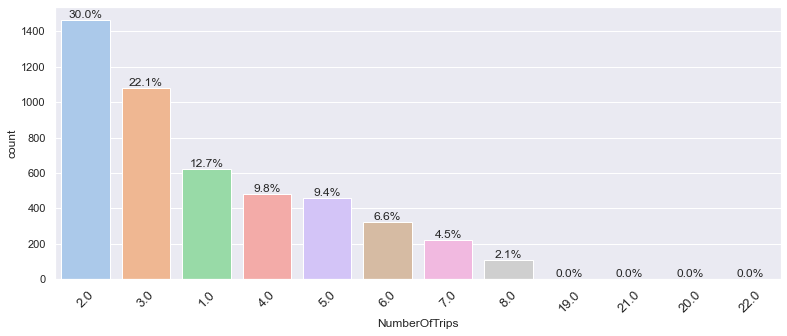

<IPython.core.display.Javascript object>

In [42]:
# Visualize data through plot
labeled_barplot(tourism_data, "NumberOfTrips", perc=True)

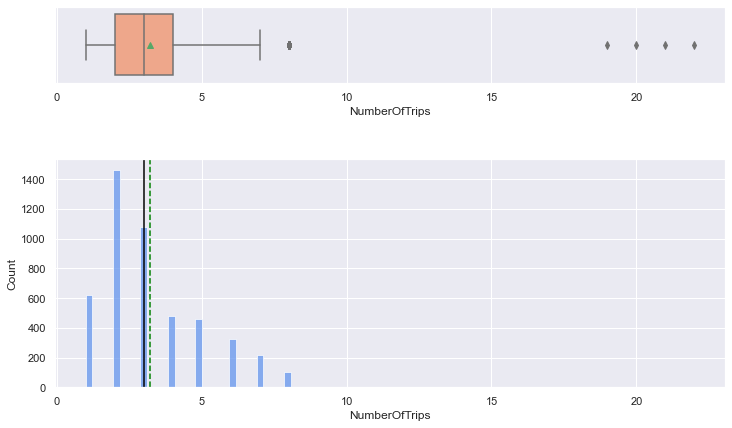

<IPython.core.display.Javascript object>

In [43]:
# Visualize data through plot
hist_boxplot(tourism_data, "NumberOfTrips")

#### Observation of  column "NumberOfTrips": 
1. It is a numerical column. But, it has limited values
2. Most of the customers took number of trips "2" (30%) followed by "3" (22.1%), and "1" (12.7%)
3. There are outliers and requires treatment
4. There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values

##### Univariate Analysis - Column "Passport"

In [44]:
# Basic summary
tourism_data[["Passport"]].describe()

Passport
count  4888.000000
mean      0.290917
std       0.454232
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

<IPython.core.display.Javascript object>

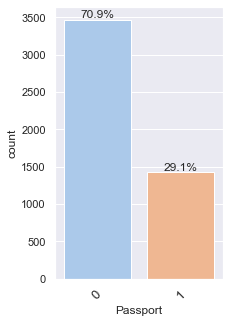

<IPython.core.display.Javascript object>

In [45]:
# Visualize data through plot
labeled_barplot(tourism_data, "Passport", perc=True)

#### Observation of  column "Passport": 
1. It is a categorical column
2. It has two values "0" and "1" which means "No" and "Yes"
3. Most of the customers did not had Passport (70.9%)
4. There are no missing values

##### Univariate Analysis - Column "PitchSatisfactionScore"

In [46]:
# Basic summary
tourism_data[["PitchSatisfactionScore"]].describe()

PitchSatisfactionScore
count             4888.000000
mean                 3.078151
std                  1.365792
min                  1.000000
25%                  2.000000
50%                  3.000000
75%                  4.000000
max                  5.000000

<IPython.core.display.Javascript object>

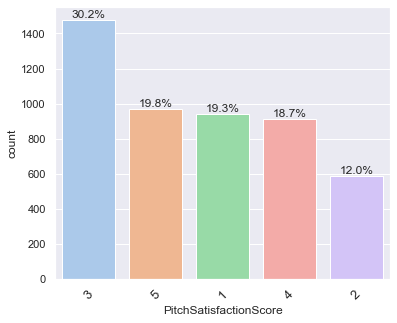

<IPython.core.display.Javascript object>

In [47]:
# Visualize data through plot
labeled_barplot(tourism_data, "PitchSatisfactionScore", perc=True)

#### Observation of  column "PitchSatisfactionScore": 
1. It is a numerical column. But, it has only five values 1,2,3,4 and 5
2. Most of the customers had pitch satisfaction score "3" (30.2%), followed by "5" (19.8%), "1" (19.3%), "4" (18.7%) and "2" (12.0%)
3. There are no missing values

##### Univariate Analysis - Column "OwnCar"

In [48]:
# Basic summary
tourism_data[["OwnCar"]].describe()

OwnCar
count  4888.000000
mean      0.620295
std       0.485363
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

<IPython.core.display.Javascript object>

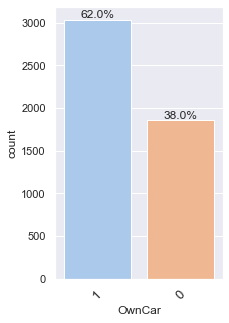

<IPython.core.display.Javascript object>

In [49]:
# Visualize data through plot
labeled_barplot(tourism_data, "OwnCar", perc=True)

#### Observation of  column "OwnCar": 
1. It is a categorical column
2. It has two values "0" and "1" which means "No" and "Yes"
3. Most of the customers owned a car (62.0%)
4. There are no missing values

##### Univariate Analysis - Column "NumberOfChildrenVisiting"

In [50]:
# Basic summary
tourism_data[["NumberOfChildrenVisiting"]].describe()

NumberOfChildrenVisiting
count               4822.000000
mean                   1.187267
std                    0.857861
min                    0.000000
25%                    1.000000
50%                    1.000000
75%                    2.000000
max                    3.000000

<IPython.core.display.Javascript object>

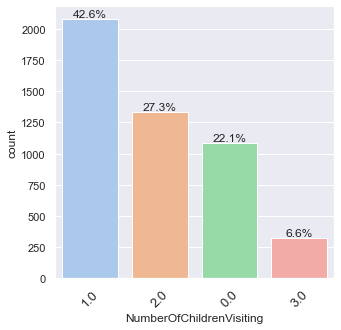

<IPython.core.display.Javascript object>

In [51]:
# Visualize data through plot
labeled_barplot(tourism_data, "NumberOfChildrenVisiting", perc=True)

#### Observation of  column "NumberOfChildrenVisiting": 
1. It is a numerical column. But, it has only four values 0,1,2 and 3.
2. Most of the customers had number of children "1" (42.6%), followed by "2" (27.3%), "0" (22.1%) and "3" (6.6%)
3. There are missing values. Since this is a numerical variable, median ("1") value can be used to treat missing values

##### Univariate Analysis - Column "Designation"

In [52]:
# Basic summary
tourism_data[["Designation"]].describe()

Designation
count         4888
unique           5
top      Executive
freq          1842

<IPython.core.display.Javascript object>

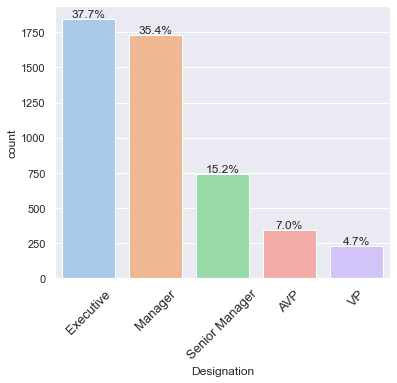

<IPython.core.display.Javascript object>

In [53]:
# Visualize data through plot
labeled_barplot(tourism_data, "Designation", perc=True)

#### Observation of  column "Designation": 
1. It is a categorical column
2. It has five values "Executive", "Manager", "Senior Manager", "AVP" and "VP"
3. Most of the customers were "Executive" (37.7%), followed by "Manager" (35.4%), "Senior Manager" (15.2%), "AVP" (7.0%) and "VP" (4.7%)
4. There are no missing values

##### Univariate Analysis - Column "MonthlyIncome"

In [54]:
# Basic summary
tourism_data[["MonthlyIncome"]].describe()

MonthlyIncome
count    4655.000000
mean    23619.853491
std      5380.698361
min      1000.000000
25%     20346.000000
50%     22347.000000
75%     25571.000000
max     98678.000000

<IPython.core.display.Javascript object>

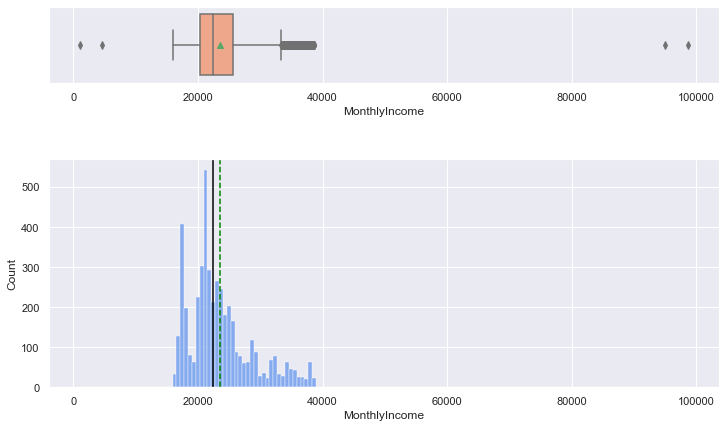

<IPython.core.display.Javascript object>

In [55]:
# Visualize data through plot
hist_boxplot(tourism_data, "MonthlyIncome")

#### Observation of  column "MonthlyIncome": 
1. It looks like a normal distribution.
2. It is slightly right skewed
3. It has outliers and treatment may be required
4. Mean and Median are almost close compared to range of values it has
5. Mean is 23619.853491 and median is 22347.000000
6. There are missing values and treatment is required

In [56]:
# Create bins for Monthly Income for ploting purpose
tourism_data["MonthlyIncome_Bin"] = pd.cut(
    tourism_data["MonthlyIncome"],
    [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, np.inf],
    labels=[
        "Under 5000",
        "5001 to 10000",
        "10001 to 15000",
        "15001 to 20000",
        "20001 to 25000",
        "25001 to 30000",
        "30001 to 35000",
        "35001 to 40000",
        "Above 40000",
    ],
)

<IPython.core.display.Javascript object>

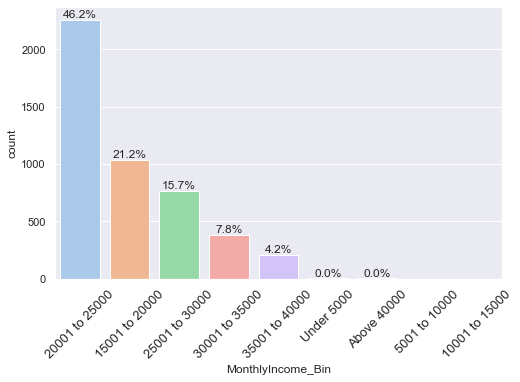

<IPython.core.display.Javascript object>

In [57]:
# Visualize data through plot
labeled_barplot(tourism_data, "MonthlyIncome_Bin", perc=True)

#### Observation of  column "MonthlyIncome_Bin": 
1. Most of the customers (almost 50%) has monthly income in range 20001 to 25000
2. Second most of the customers has monthly income in range 15001 to 20000
3. Third most of the customers has monthly income in range 25001 to 30000
4. Very few customers has monthly income less than 5000 and above 40000

#### B. Bivariate & Multivariate Analysis

In [58]:
# Get column and its datatypes for bivariate analysis
tourism_data.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact                 object
CityTier                       int64
DurationOfPitch              float64
Occupation                    object
Gender                        object
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched                object
PreferredPropertyStar        float64
MaritalStatus                 object
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                   object
MonthlyIncome                float64
Age_Bin                     category
DurationOfPitch_Bin         category
MonthlyIncome_Bin           category
dtype: object

<IPython.core.display.Javascript object>

In [59]:
# Get correlation between each numerical feature
tourism_data.corr()

ProdTaken       Age  CityTier  DurationOfPitch  \
ProdTaken                  1.000000 -0.147254  0.086852         0.078257   
Age                       -0.147254  1.000000 -0.015625        -0.012063   
CityTier                   0.086852 -0.015625  1.000000         0.022703   
DurationOfPitch            0.078257 -0.012063  0.022703         1.000000   
NumberOfPersonVisiting     0.009627  0.011621 -0.001671         0.065141   
NumberOfFollowups          0.112171 -0.002577  0.023652         0.009434   
PreferredPropertyStar      0.099577 -0.010474 -0.009164        -0.006637   
NumberOfTrips              0.018898  0.184905 -0.029709         0.009715   
Passport                   0.260844  0.033399  0.001793         0.033034   
PitchSatisfactionScore     0.051394  0.018510 -0.042160        -0.002880   
OwnCar                    -0.011508  0.048654  0.003817        -0.001626   
NumberOfChildrenVisiting   0.007421  0.007370  0.000672         0.031408   
MonthlyIncome             -0.130585  0.464869  0.051817        -0.006252   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.009627           0.112171   
Age                                     0.011621          -0.002577   
CityTier                               -0.001671           0.023652   
DurationOfPitch                         0.065141           0.009434   
NumberOfPersonVisiting                  1.000000           0.328569   
NumberOfFollowups                       0.328569           1.000000   
PreferredPropertyStar                   0.033867          -0.024176   
NumberOfTrips                           0.195223           0.139517   
Passport                                0.011177           0.004970   
PitchSatisfactionScore                 -0.019581           0.004054   
OwnCar                                  0.010362           0.012112   
NumberOfChildrenVisiting                0.610621           0.286425   
MonthlyIncome                           0.195134           0.176503   

                          PreferredPropertyStar  NumberOfTrips  Passport  \
ProdTaken                              0.099577       0.018898  0.260844   
Age                                   -0.010474       0.184905  0.033399   
CityTier                              -0.009164      -0.029709  0.001793   
DurationOfPitch                       -0.006637       0.009715  0.033034   
NumberOfPersonVisiting                 0.033867       0.195223  0.011177   
NumberOfFollowups                     -0.024176       0.139517  0.004970   
PreferredPropertyStar                  1.000000       0.012115  0.001040   
NumberOfTrips                          0.012115       1.000000  0.012949   
Passport                               0.001040       0.012949  1.000000   
PitchSatisfactionScore                -0.022701      -0.004378  0.002926   
OwnCar                                 0.015742      -0.011825 -0.022330   
NumberOfChildrenVisiting               0.035798       0.168795  0.020264   
MonthlyIncome                          0.014289       0.139105  0.002545   

                          PitchSatisfactionScore    OwnCar  \
ProdTaken                               0.051394 -0.011508   
Age                                     0.018510  0.048654   
CityTier                               -0.042160  0.003817   
DurationOfPitch                        -0.002880 -0.001626   
NumberOfPersonVisiting                 -0.019581  0.010362   
NumberOfFollowups                       0.004054  0.012112   
PreferredPropertyStar                  -0.022701  0.015742   
NumberOfTrips                          -0.004378 -0.011825   
Passport                                0.002926 -0.022330   
PitchSatisfactionScore                  1.000000  0.068850   
OwnCar                                  0.068850  1.000000   
NumberOfChildrenVisiting                0.000878  0.026572   
MonthlyIncome                           0.030421  0.080262   

                          Number

<IPython.core.display.Javascript object>

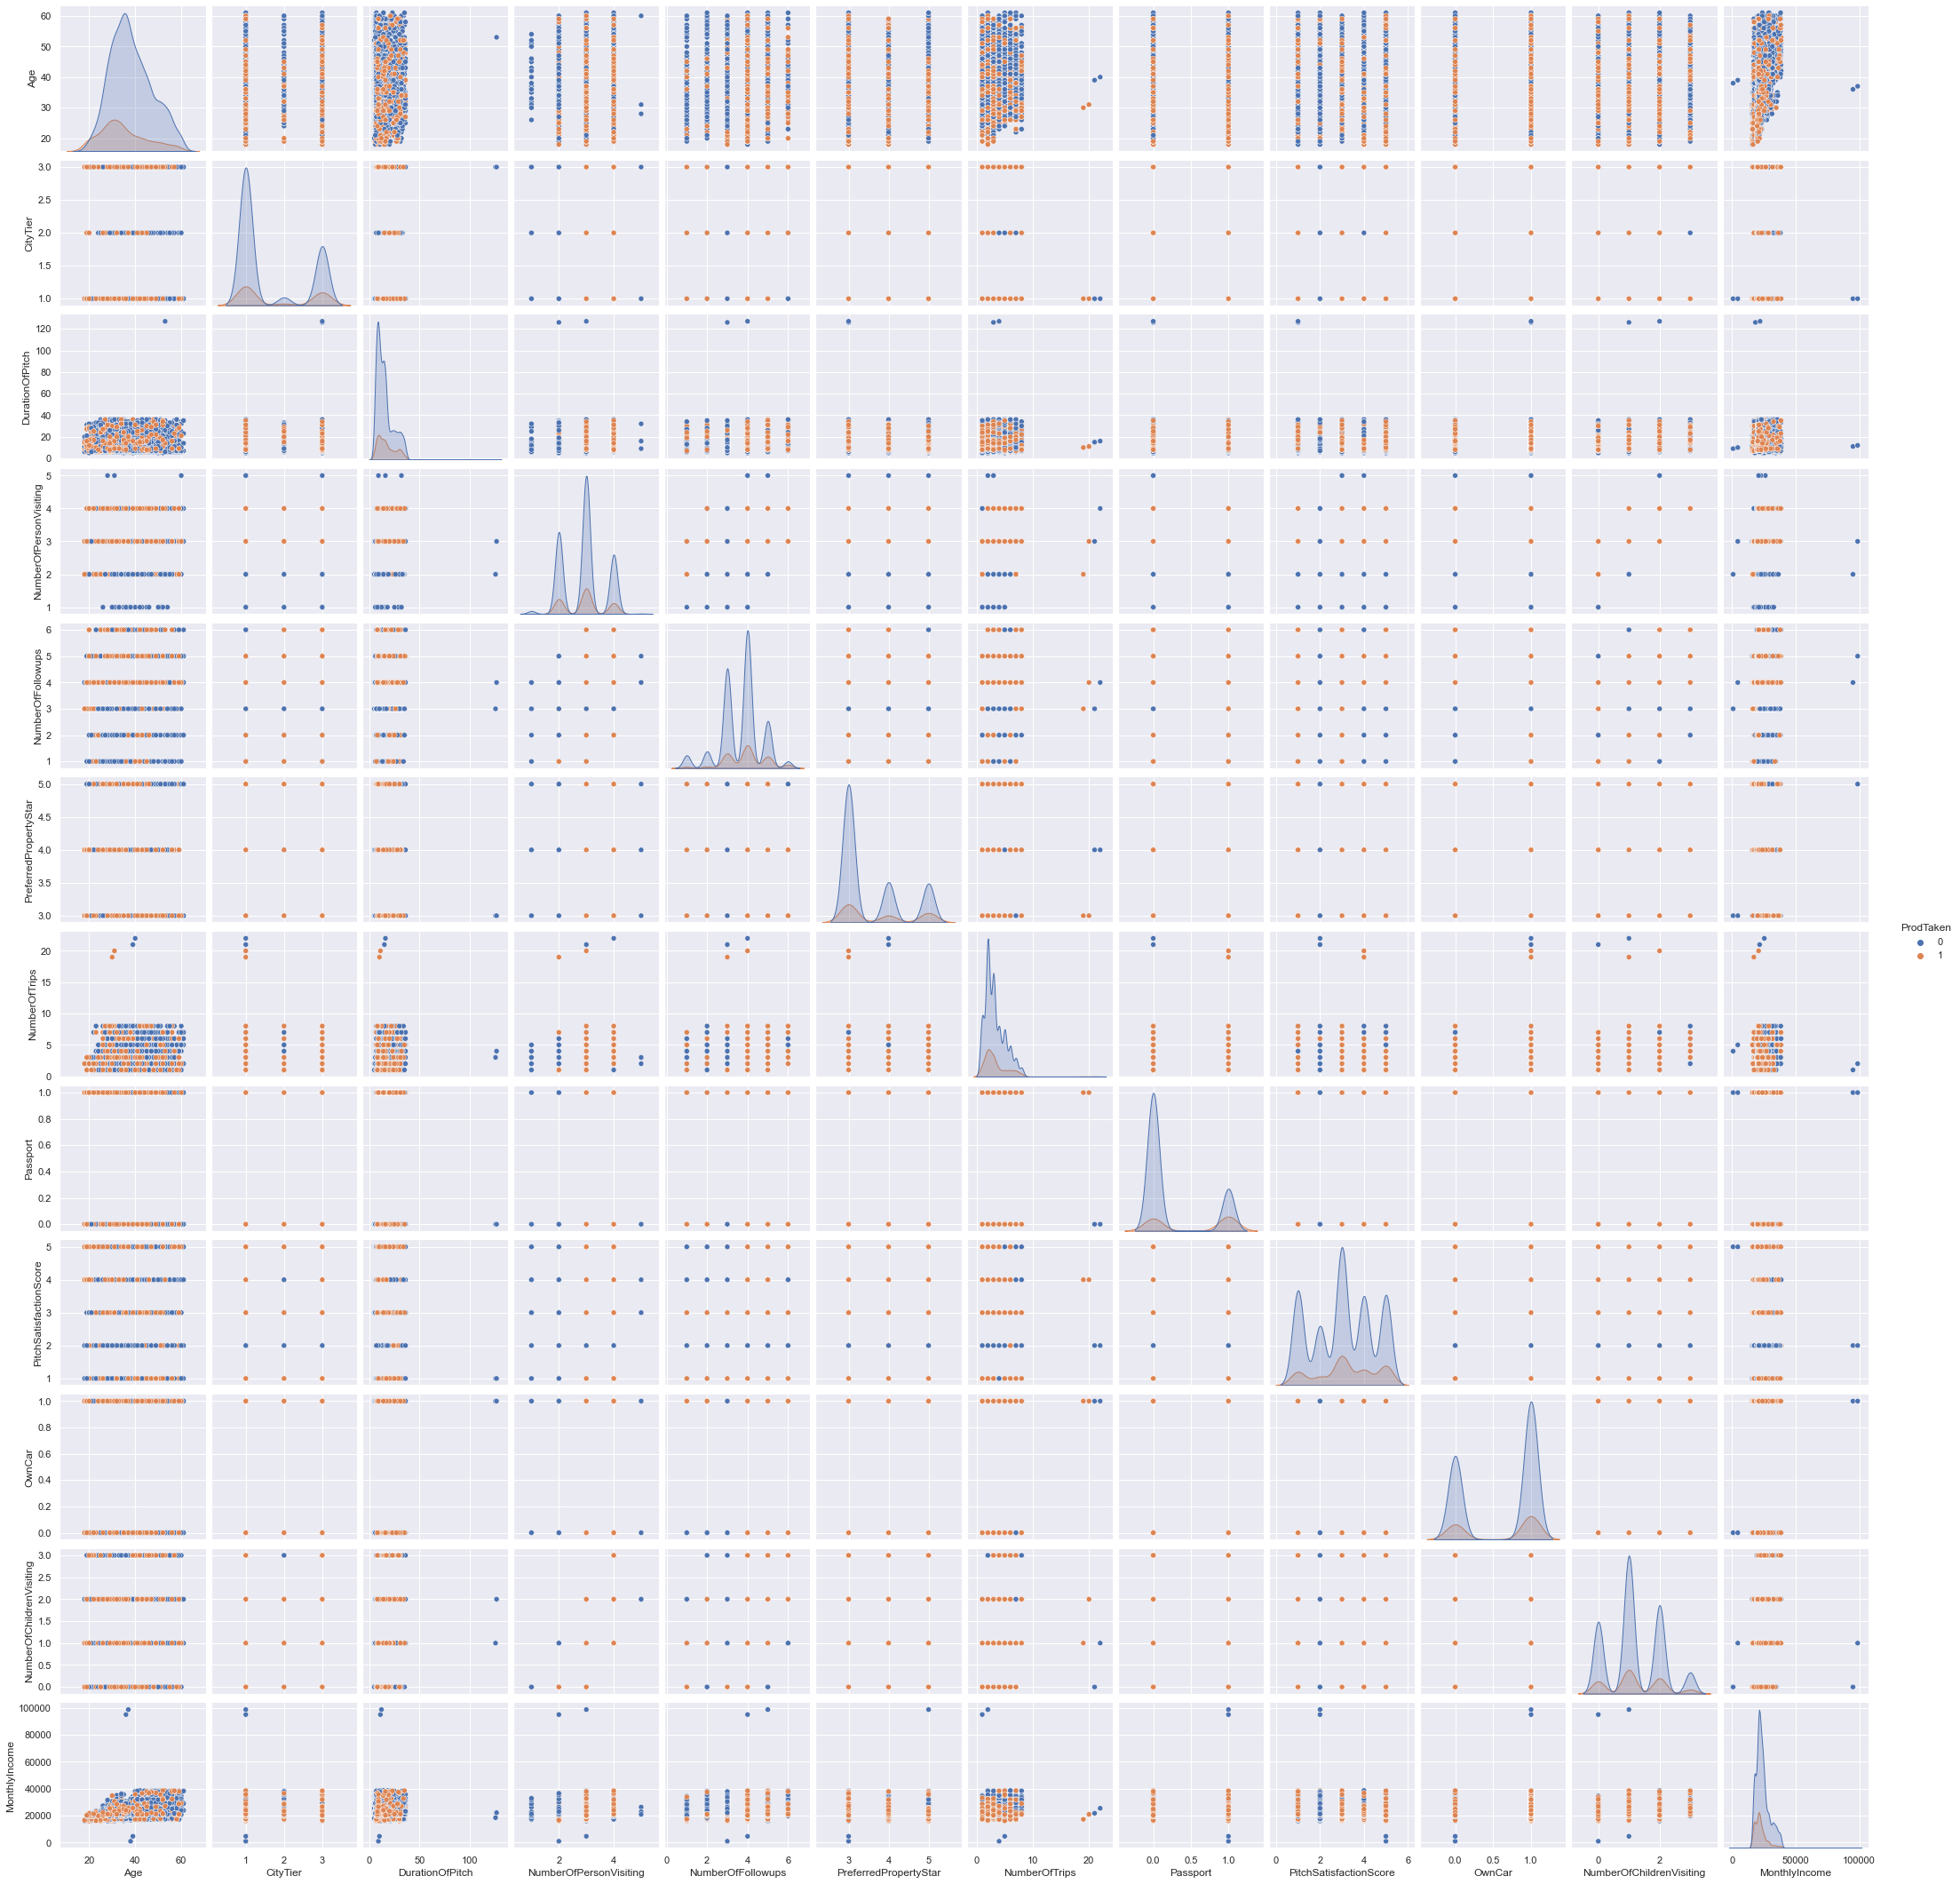

<IPython.core.display.Javascript object>

In [60]:
# Compare each numerical continous feature against each other
sns.pairplot(tourism_data, hue="ProdTaken")

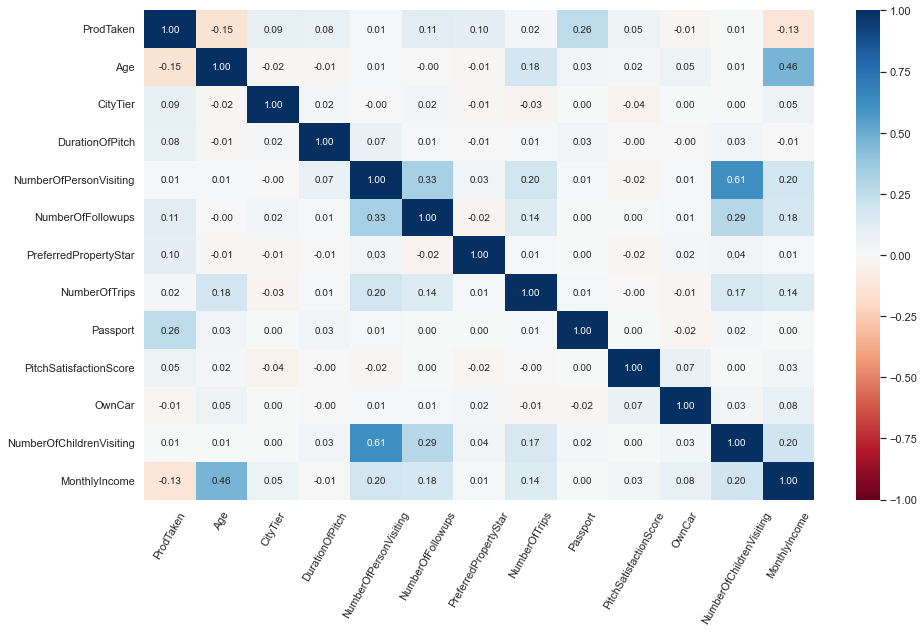

<IPython.core.display.Javascript object>

In [61]:
# Check heatmap for correlation
plt.figure(figsize=(15, 9))
sns.heatmap(
    tourism_data.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="RdBu",
    linewidths=0.002,
    linecolor="black",
)
plt.xticks(rotation=60)
plt.show()

#### Observation  on correlation between multiple variables:

1. There are higher positive correlation between below features:

    a) NumberOfChildrenVisiting and NumberOfPersonVisiting
    
    b) NumberOfFollowups and NumberOfPersonVisiting
    
    c) NumberOfFollowups and NumberOfChildrenVisiting
    
    d) Passport and ProductTaken(target variable)
    
    

2. There are higher negative correlation between below features:

    a) Age and ProductTaken(target variable)
    
    b) MonthlyIncome and ProductTaken(target variable)




In [62]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    display(pd.DataFrame(tab1))
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(
        kind="bar",
        stacked=True,
        figsize=(count + 5, 4),
        color=["cornflowerblue", "sandybrown"],
    )
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()

<IPython.core.display.Javascript object>

In [63]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    """
    Print the histogram and box plots compared with respect to product taken or not

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of predictor for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="limegreen",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of predictor for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="royalblue",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette=["cornflowerblue", "limegreen"],
    )

    # print("\n\n")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette=["royalblue", "forestgreen"],
    )

    plt.tight_layout(pad=1.08, h_pad=6, w_pad=2)
    plt.show()

<IPython.core.display.Javascript object>

In [64]:
# function to plot a boxplot and a histogram combined with hue and along the same scale.


def hist_boxplot_with_hue(data, column, hue_column, title_text, fig_size=(20, 8)):
    """
    Boxplot and histogram combined with hue

    data: dataframe
    feature: dataframe column
    fig_size: size of figure (default (12,9))
    hue_column: hue
    title_text: title
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=fig_size,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="lemonchiffon")
    sns.histplot(
        data=data,
        x=column,
        ax=ax_hist2,
        hue=hue_column,
        multiple="stack",
        palette="pastel",
    ).set(title=title_text)

    plt.show()

<IPython.core.display.Javascript object>

In [65]:
# Get column and its datatypes for bivariate analysis
tourism_data.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact                 object
CityTier                       int64
DurationOfPitch              float64
Occupation                    object
Gender                        object
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched                object
PreferredPropertyStar        float64
MaritalStatus                 object
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                   object
MonthlyIncome                float64
Age_Bin                     category
DurationOfPitch_Bin         category
MonthlyIncome_Bin           category
dtype: object

<IPython.core.display.Javascript object>

##### Age vs ProdTaken

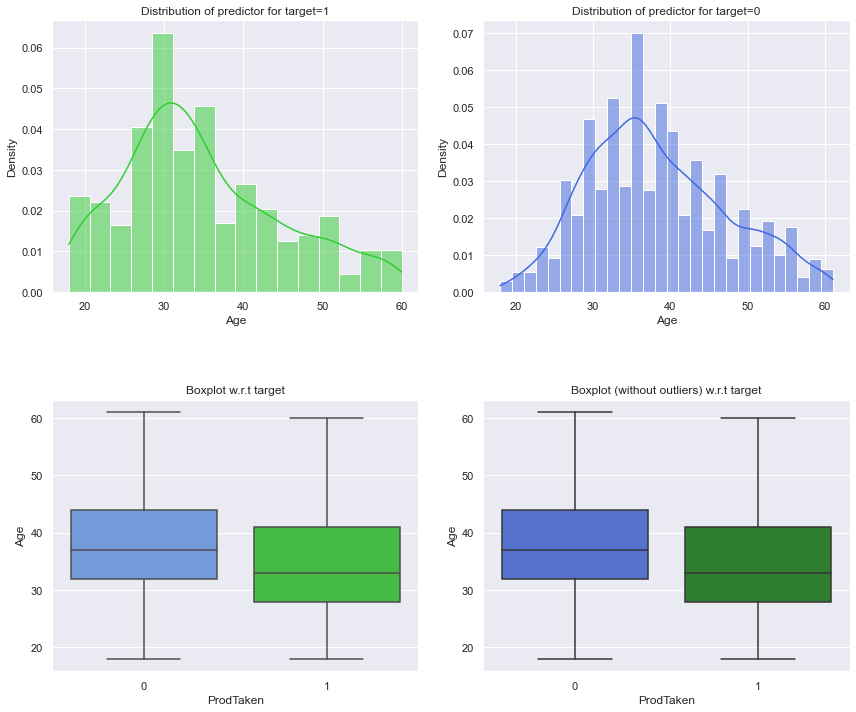

<IPython.core.display.Javascript object>

In [66]:
# Visualize data through plot
distribution_plot_wrt_target(data=tourism_data, predictor="Age", target="ProdTaken")

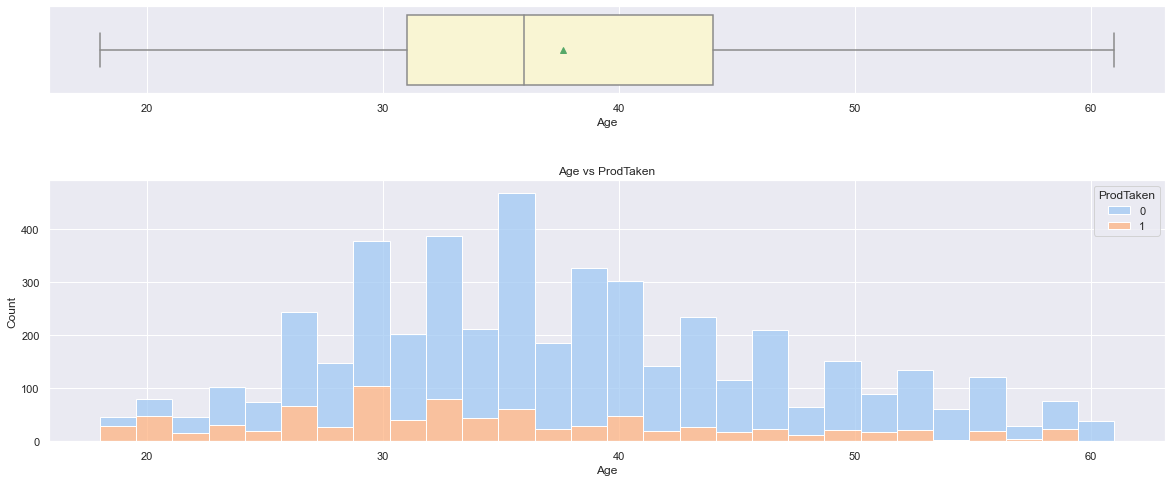

<IPython.core.display.Javascript object>

In [67]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    tourism_data, "Age", "ProdTaken", "Age vs ProdTaken",
)

ProdTaken     0    1   All
Age_Bin                   
All        3786  876  4662
31 to 35    838  199  1037
26 to 30    570  198   768
36 to 40    785  103   888
21 to 25    174   89   263
41 to 45    559   89   648
46 to 50    370   55   425
16 to 20     30   54    84
51 to 55    301   48   349
56 to 60    150   41   191
61 to 65      9    0     9

----------------------------------------------------------------------------------------------------


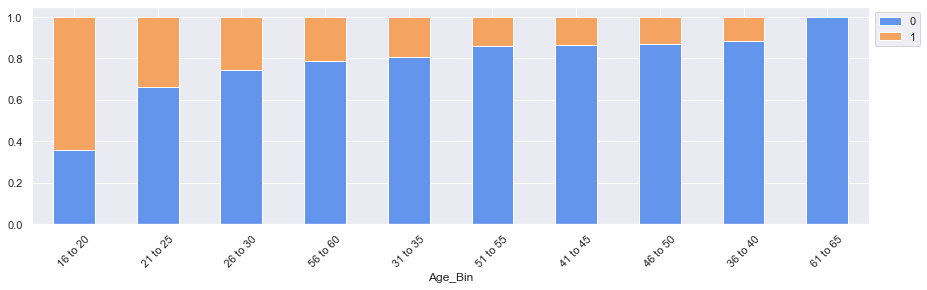

<IPython.core.display.Javascript object>

In [68]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="Age_Bin", target="ProdTaken")

#### Observation  "Age vs ProdTaken": 

1. Age has normal distribution for both ProductTaken = 'False' and ProductTaken = 'True' conditions.
2. Histogram shows number of customers who took travel package are more at around age 30. However, number of customers who didn't take travel package are more at around age 35.
3. Box plots shows customers who took travel package and didn't take travel package fall almost in same age range.
4. There is a slight correlation between Age and ProdTaken. 
5. However, customers in age range between 16 and 20 tends to take travel package more. More than 60% of customers in this age range has taken travel package.

##### TypeofContact vs ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419

----------------------------------------------------------------------------------------------------


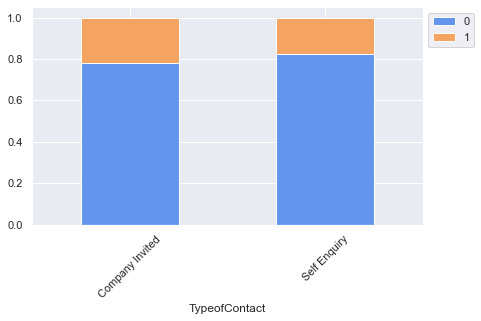

<IPython.core.display.Javascript object>

In [69]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="TypeofContact", target="ProdTaken")

#### Observation  "TypeofContact vs ProdTaken": 

1. Customers who were contacted by company has taken travel package slightly more than customers who did self enquiry.
2. There is no high correlation between TypeofContact and ProdTaken. 

##### CityTier vs ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198

----------------------------------------------------------------------------------------------------


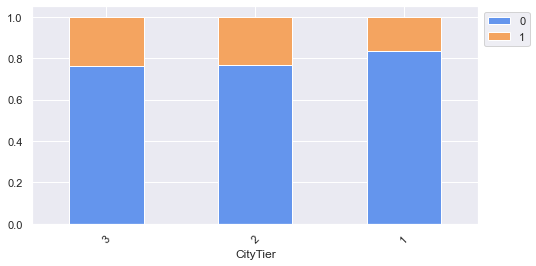

<IPython.core.display.Javascript object>

In [70]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="CityTier", target="ProdTaken")

#### Observation  "CityTier vs ProdTaken": 

1. Customers in CityTier 3 and 2 had taken travel package more than customers in CityTier 1.
2. There is no high correlation between CityTier and ProdTaken.

##### DurationOfPitch vs ProdTaken

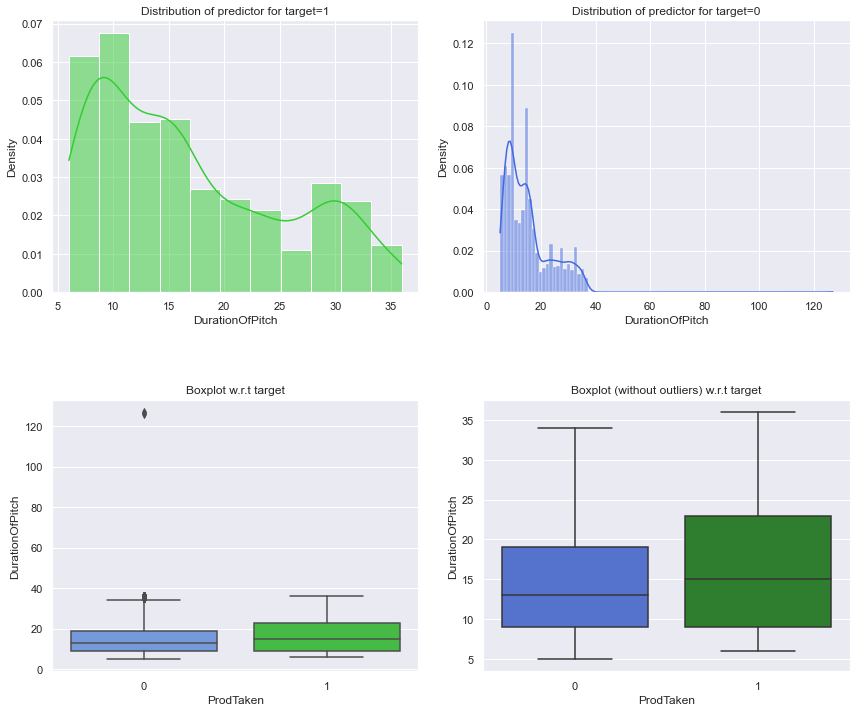

<IPython.core.display.Javascript object>

In [71]:
# Visualize data through plot
distribution_plot_wrt_target(
    data=tourism_data, predictor="DurationOfPitch", target="ProdTaken"
)

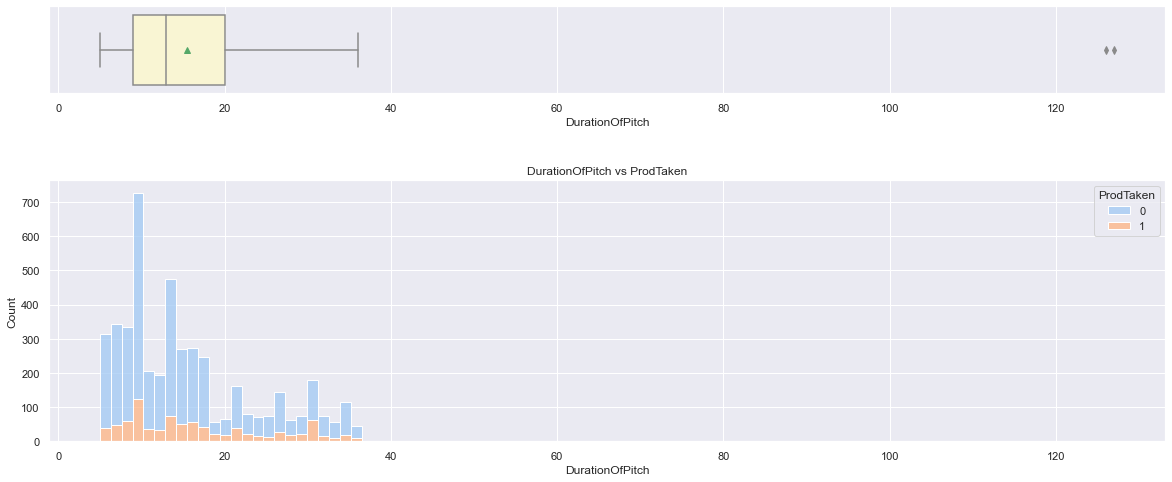

<IPython.core.display.Javascript object>

In [72]:
# Visualize data through histogram and boxplot for outliers and its impact
hist_boxplot_with_hue(
    tourism_data, "DurationOfPitch", "ProdTaken", "DurationOfPitch vs ProdTaken",
)

ProdTaken               0    1   All
DurationOfPitch_Bin                 
All                  3762  875  4637
6 to 10              1438  271  1709
11 to 15              950  195  1145
16 to 20              504  139   643
26 to 30              280   94   374
21 to 25              294   90   384
31 to 35              254   76   330
36 to 40               34   10    44
Under 5                 6    0     6
Above 40                2    0     2

----------------------------------------------------------------------------------------------------


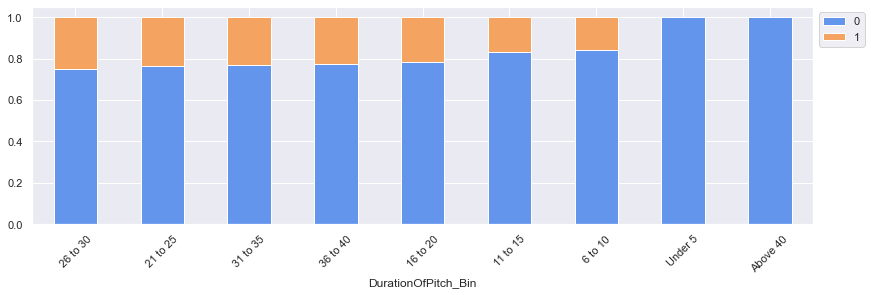

<IPython.core.display.Javascript object>

In [73]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="DurationOfPitch_Bin", target="ProdTaken")

#### Observation  "DurationOfPitch vs ProdTaken": 

1. DurationOfPitch has right skewed distribution for ProductTaken = 'True'
2. DurationOfPitch has heavily right skewed distribution for ProductTaken = 'False'
3. Histogram shows customers who took travel package and who didn't take travel package are more at around 10.
4. Box plots shows customers who accepted and not accepted personal loan fall almost in same range.
5. There is a slight correlation between DurationOfPitch and ProdTaken. 
6. Customers tends to take travel package more when duration of sales pitch is between 26 to 30. 
7. Customers tends to reject travel package completely when duration of sales pitch is less than 5 and above 40.

##### Occupation vs ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2

----------------------------------------------------------------------------------------------------


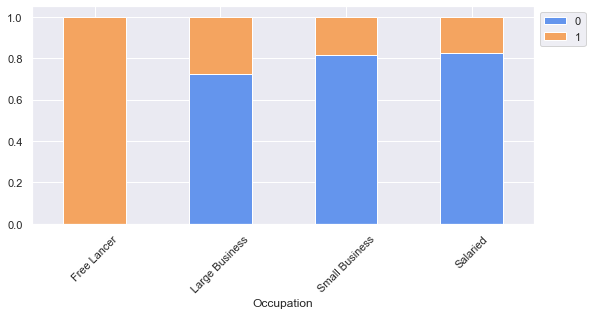

<IPython.core.display.Javascript object>

In [74]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="Occupation", target="ProdTaken")

#### Observation  "Occupation vs ProdTaken": 

1. All customers doing occupation "Free Lancer" had accepted travel package. However, there were only 2 customers in this category.
2. Customers doing occupation "Large Business" had accepted travel package more compared to "Small Business" and "Salaried". Probably, these customers have more income and can afford travel packages. 

##### Gender vs ProdTaken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1500  317  1817
Fe Male     130   25   155

----------------------------------------------------------------------------------------------------


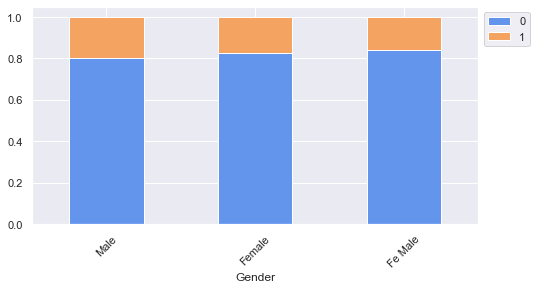

<IPython.core.display.Javascript object>

In [75]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="Gender", target="ProdTaken")

#### Observation  "Gender vs ProdTaken": 

1. Both "Male" and "Female" customers had equally accepted travel package.
2. There is no high correlation between Gender vs ProdTaken.

##### NumberOfPersonVisiting vs ProdTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3

----------------------------------------------------------------------------------------------------


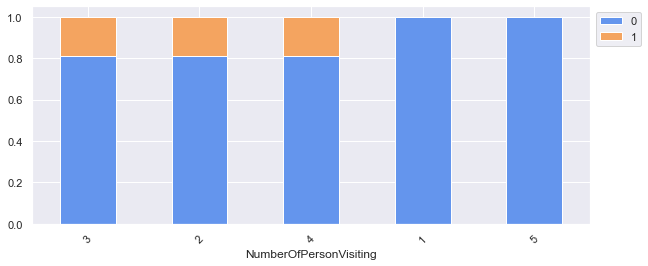

<IPython.core.display.Javascript object>

In [76]:
# Visualize data through plot
stacked_barplot(
    data=tourism_data, predictor="NumberOfPersonVisiting", target="ProdTaken"
)

#### Observation  "NumberOfPersonVisiting vs ProdTaken": 

1. Customers where NumberOfPersonVisiting is 1 or 5 didnt take travel package. Probably because they dont want to travel alone. Also, travel expense may be more if numbers of persons are 5.
2. Customers where NumberOfPersonVisiting is 3,2 and 4 had shown equal interest to take travel package.

##### NumberOfFollowups vs ProdTaken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176

----------------------------------------------------------------------------------------------------


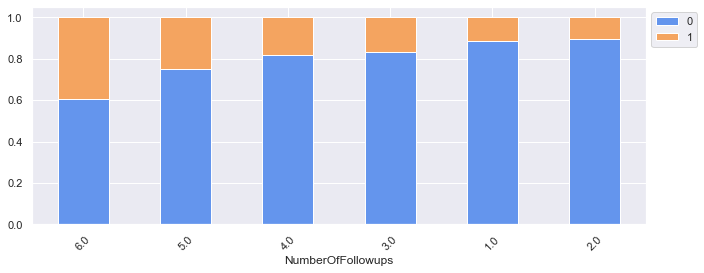

<IPython.core.display.Javascript object>

In [77]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="NumberOfFollowups", target="ProdTaken")

#### Observation  "NumberOfFollowups vs ProdTaken": 

1. More NumberOfFollowups had made customers take travel package. 
2. Customers who were followed up 6 times had mostly taken travel package. Then comes 5,4,3,1 and 2.
3. There is a correlation between NumberOfFollowups and ProdTaken. 

##### ProductPitched vs ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342

----------------------------------------------------------------------------------------------------


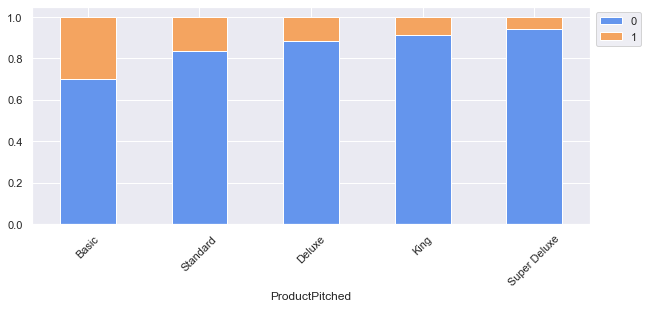

<IPython.core.display.Javascript object>

In [78]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="ProductPitched", target="ProdTaken")

#### Observation  "ProductPitched vs ProdTaken": 

1. Customers who were pitched with product "Basic" had taken it more compared to other products. Probably, its least expensive travel package. Then comes Standard, Deluxe, King and Super Deluxe.
2. There is a correlation between ProductPitched and ProdTaken. 

##### PreferredPropertyStar vs ProdTaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913

----------------------------------------------------------------------------------------------------


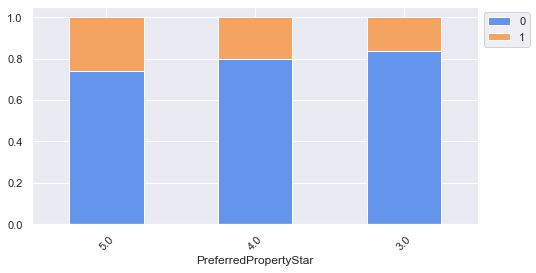

<IPython.core.display.Javascript object>

In [79]:
# Visualize data through plot
stacked_barplot(
    data=tourism_data, predictor="PreferredPropertyStar", target="ProdTaken"
)

#### Observation  "PreferredPropertyStar vs ProdTaken": 

1. Customers who preferred property star 5 had taken travel package more. Probably, they were impressed with property ratings. Then comes PreferredPropertyStar of 4 and 3.
2. There is a slight correlation between PreferredPropertyStar and ProdTaken. 

##### MaritalStatus vs ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950

----------------------------------------------------------------------------------------------------


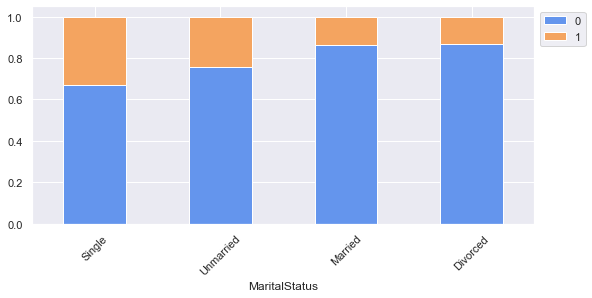

<IPython.core.display.Javascript object>

In [80]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="MaritalStatus", target="ProdTaken")

#### Observation  "MaritalStatus  vs ProdTaken": 

1. Customers who are "Single" had taken travel package more compared to others. Then comes "Unmarried", "Married" and "Divorced".
2. There is a slight correlation between MaritalStatus and ProdTaken. 

##### NumberOfTrips vs ProdTaken

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1

----------------------------------------------------------------------------------------------------


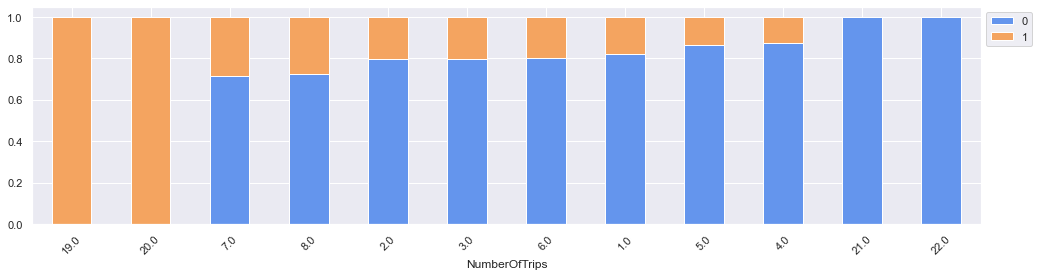

<IPython.core.display.Javascript object>

In [81]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="NumberOfTrips", target="ProdTaken")

#### Observation  "NumberOfTrips vs ProdTaken": 

1. Customers who had 7 and 8 trips had taken travel packages more.
2. Customers who already took more than 20 trips did not accept travel package. Probably, they are done with too much travel. However, customers who took 19 and 20 trips tends to accept travel packages. Probably, they are travel enthusiasts. 
3. There is a correlation between NumberOfTrips and ProdTaken. 

##### Passport vs ProdTaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466

----------------------------------------------------------------------------------------------------


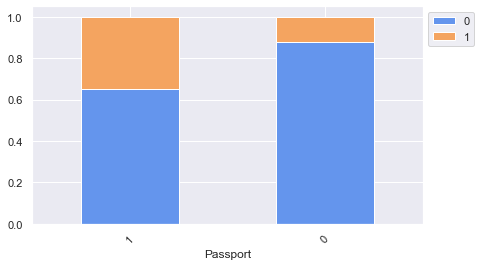

<IPython.core.display.Javascript object>

In [82]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="Passport", target="ProdTaken")

#### Observation  "Passport vs ProdTaken": 

1. Customers who has Passport had taken travel packages more. Probably, those are overseas travel packages.
2. There is a correlation between Passport and ProdTaken. 

##### PitchSatisfactionScore vs ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586

----------------------------------------------------------------------------------------------------


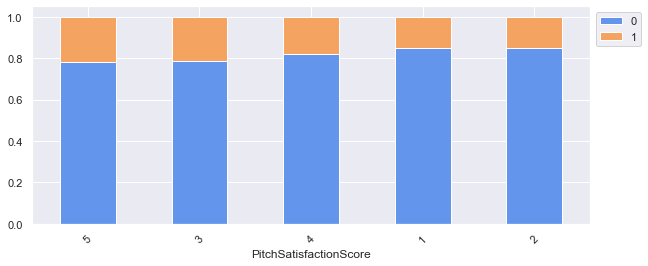

<IPython.core.display.Javascript object>

In [83]:
# Visualize data through plot
stacked_barplot(
    data=tourism_data, predictor="PitchSatisfactionScore", target="ProdTaken"
)

#### Observation  "PitchSatisfactionScore vs ProdTaken": 

1. Customers who has PitchSatisfactionScore more than 2 had taken travel packages slightly more. Probably, customers were impressed with sales pitch.
2. There is not much correlation between PitchSatisfactionScore and ProdTaken. 

##### OwnCar vs ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856

----------------------------------------------------------------------------------------------------


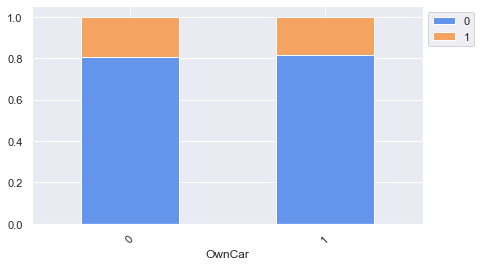

<IPython.core.display.Javascript object>

In [84]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="OwnCar", target="ProdTaken")

#### Observation  "OwnCar vs ProdTaken": 

1. Customers who doesn't own a car had taken travel packages slightly more. Probably, customers were not able to do a road trip and prefer travel packages.
2. There is not much correlation between OwnCar and ProdTaken. 

##### NumberOfChildrenVisiting vs ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325

----------------------------------------------------------------------------------------------------


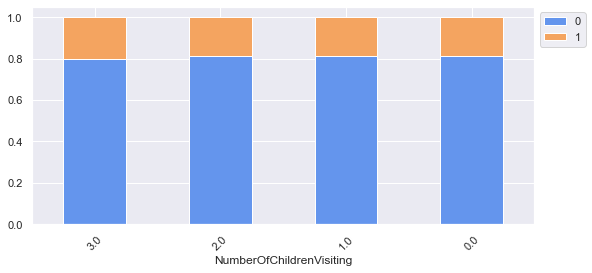

<IPython.core.display.Javascript object>

In [85]:
# Visualize data through plot
stacked_barplot(
    data=tourism_data, predictor="NumberOfChildrenVisiting", target="ProdTaken"
)

#### Observation  "NumberOfChildrenVisiting vs ProdTaken": 

1. Customers who have 3 children had taken travel packages slightly more. Probably, they are doing family vacation fod kids. Then comes 2,1 and 0.
2. There is not much correlation between NumberOfChildrenVisiting and ProdTaken. 

##### Designation vs ProdTaken

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230

----------------------------------------------------------------------------------------------------


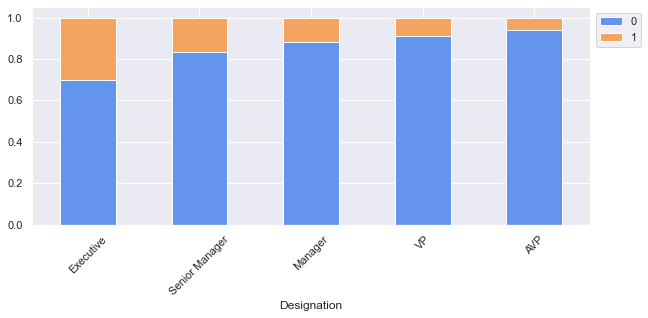

<IPython.core.display.Javascript object>

In [86]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="Designation", target="ProdTaken")

#### Observation  "Designation vs ProdTaken": 

1. Customers with designation "Executive" had taken travel package more. Then comes "Senior Manager", "Manager", "VP" and "AVP".
2. There is a slight correlation between Designation and ProdTaken. 

##### MonthlyIncome vs ProdTaken

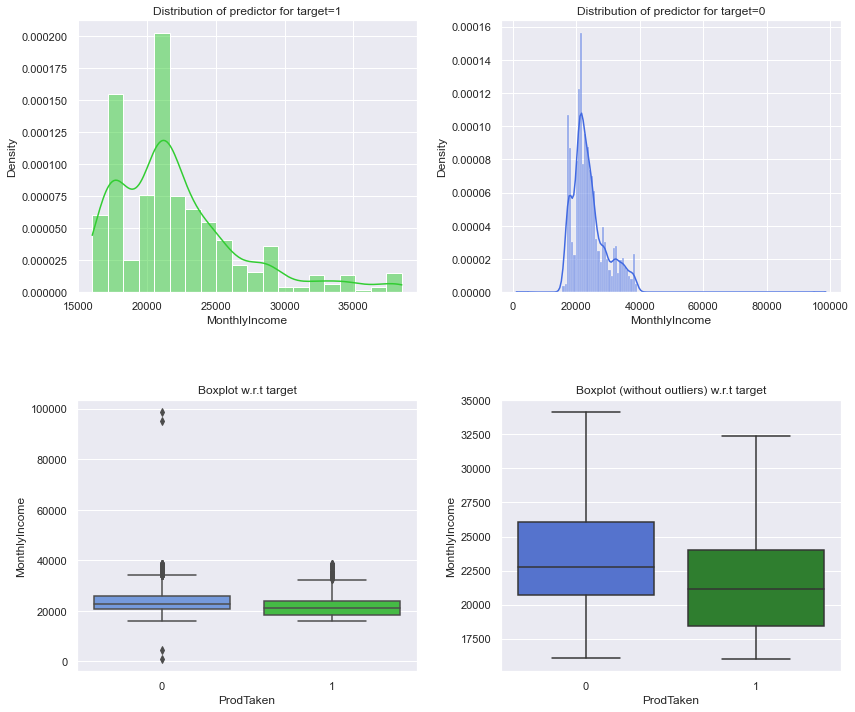

<IPython.core.display.Javascript object>

In [87]:
# Visualize data through plot
distribution_plot_wrt_target(
    data=tourism_data, predictor="MonthlyIncome", target="ProdTaken"
)

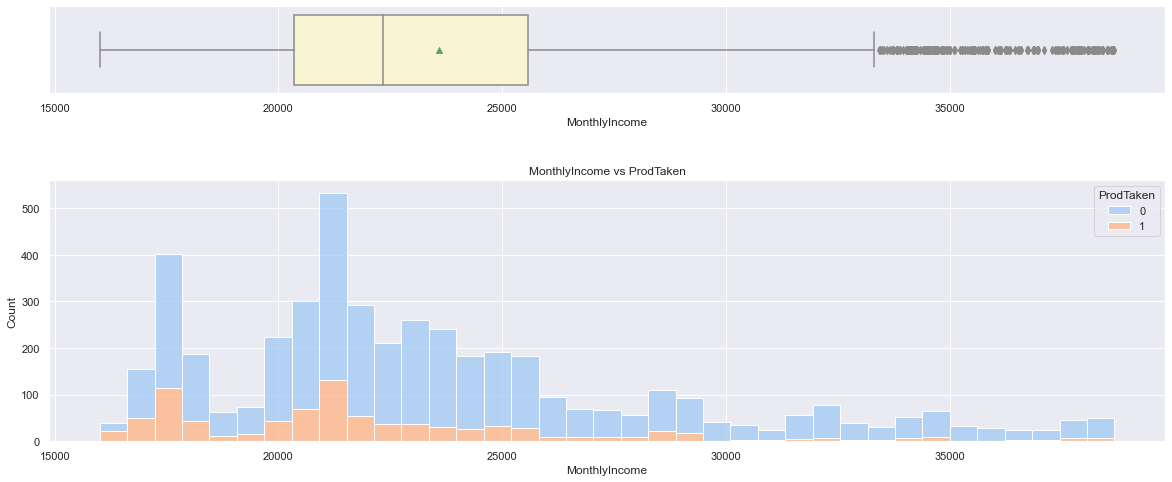

<IPython.core.display.Javascript object>

In [88]:
# Visualize data through histogram and boxplot for outliers and its impact
hist_boxplot_with_hue(
    tourism_data[
        (tourism_data["MonthlyIncome"] > 15000)
        & (tourism_data["MonthlyIncome"] < 40000)
    ],
    "MonthlyIncome",
    "ProdTaken",
    "MonthlyIncome vs ProdTaken",
)

ProdTaken             0    1   All
MonthlyIncome_Bin                 
All                3767  888  4655
20001 to 25000     1830  427  2257
15001 to 20000      754  284  1038
25001 to 30000      651  117   768
30001 to 35000      343   39   382
35001 to 40000      185   21   206
Under 5000            2    0     2
Above 40000           2    0     2

----------------------------------------------------------------------------------------------------


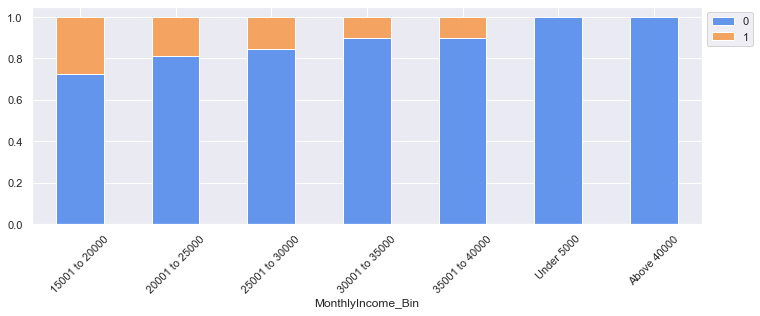

<IPython.core.display.Javascript object>

In [89]:
# Visualize data through plot
stacked_barplot(data=tourism_data, predictor="MonthlyIncome_Bin", target="ProdTaken")

#### Observation  "MonthlyIncome vs ProdTaken": 

1. MonthlyIncome is right skewed for both ProductTaken = 'False' and ProductTaken = 'True' conditions.
2. Histogram shows number of customers who took and didnt take travel package are more around income 21,000. 
3. Box plots shows there are outliers.
4. There is a correlation between MonthlyIncome and ProdTaken. 
5. Customers with income between 15001 and 20000 tends to take travel package more. Whereas, customers with income less than 5000 and more than 40000 did not take travel package.

#### C. Customer Profile - Product Taken

In [90]:
# Create a function to plot catlot with percentage
def catplot_with_percentage(data, predictor, target):
    """
    Print the category percentage and plot a category plot

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    df = data.groupby([predictor, target]).agg({target: "count"})
    df["Percentage"] = round(
        100 * df[target] / df.groupby(predictor)[target].transform("sum"), 1
    )
    df.rename({target: "Count"}, axis=1, inplace=True)
    display(df)
    print("-" * 110)

    g = sns.catplot(
        data=data,
        x=target,
        col=predictor,
        kind="count",
        palette="pastel",
        legend=True,
        aspect=4,
        col_order=["Basic", "Deluxe", "Standard", "Super Deluxe", "King"],
    )
    g.fig.set_figwidth(20)
    g.fig.set_figheight(6)
    g.set_xticklabels(rotation=45)

    plt.show()

<IPython.core.display.Javascript object>

##### ProdTaken vs ProductPitched

Count  Percentage
ProductPitched ProdTaken                   
Basic          0           1290        70.0
               1            552        30.0
Deluxe         0           1528        88.2
               1            204        11.8
King           0            210        91.3
               1             20         8.7
Standard       0            618        83.3
               1            124        16.7
Super Deluxe   0            322        94.2
               1             20         5.8

--------------------------------------------------------------------------------------------------------------


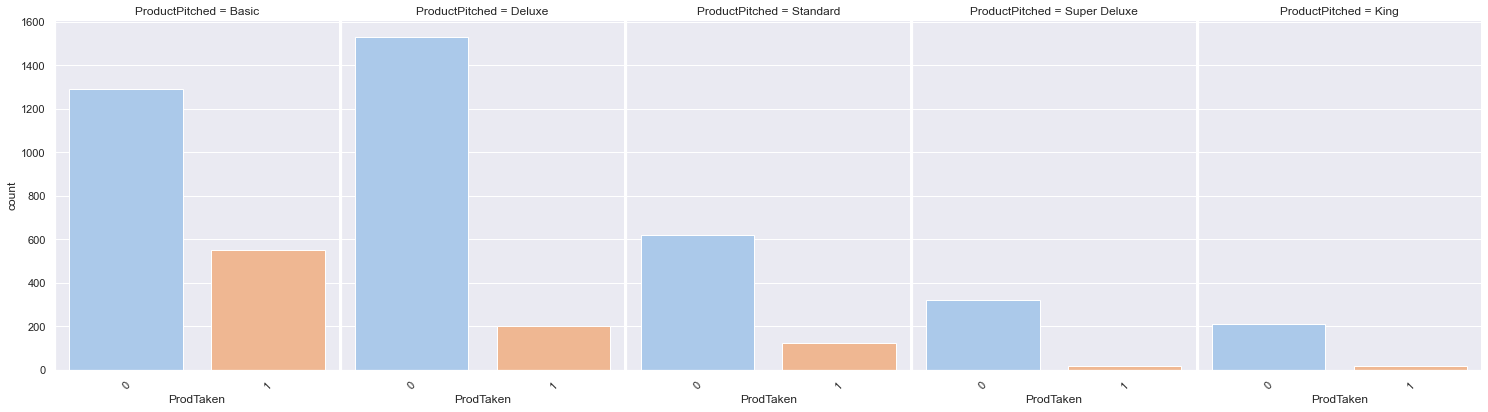

<IPython.core.display.Javascript object>

In [91]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "ProdTaken")

#### Observation  "ProdTaken vs ProductPitched": 

1. **Basic :** 30% of customers had taken travel package 
2. **Deluxe :** 11.8% of customers had taken travel package
3. **Standard :** 16% of customers had taken travel package
4. **Super Deluxe :** 5.8% of customers had taken travel package
5. **King :** 8.7% of customers had taken travel package

##### Age vs ProductPitched

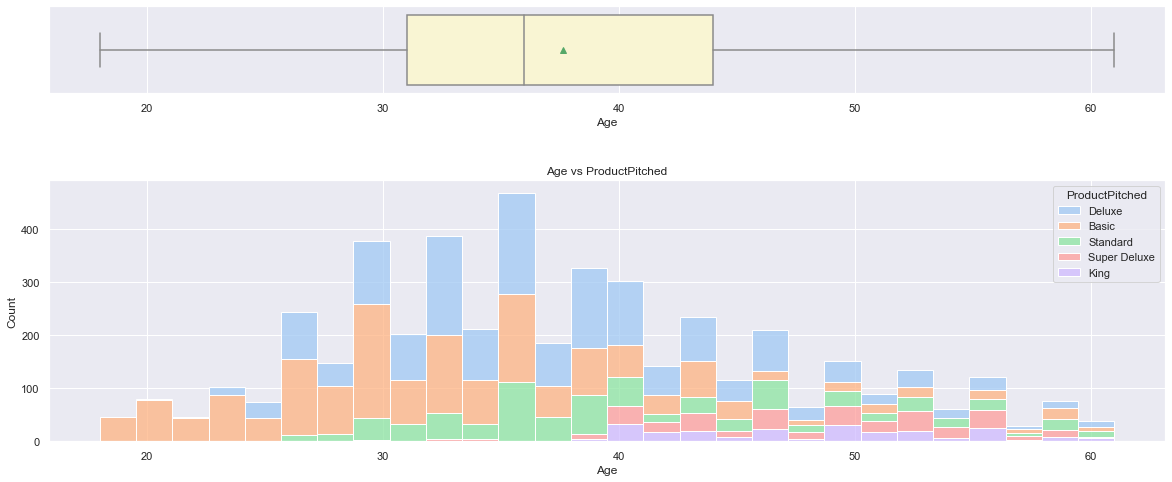

<IPython.core.display.Javascript object>

In [92]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(tourism_data, "Age", "ProductPitched", "Age vs ProductPitched")

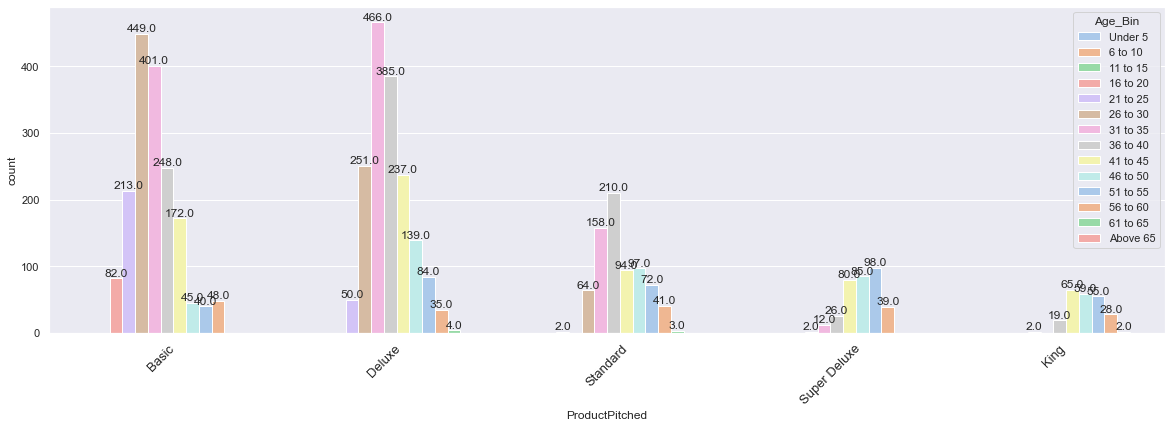

<IPython.core.display.Javascript object>

In [93]:
# Visualize data through plot
labeled_barplot(tourism_data, "ProductPitched", h="Age_Bin", fig_size=(20, 6))

Count  Percentage
ProductPitched Age_Bin                    
Basic          Under 5       0         0.0
               6 to 10       0         0.0
               11 to 15      0         0.0
               16 to 20     82         4.8
               21 to 25    213        12.5
               26 to 30    449        26.4
               31 to 35    401        23.6
               36 to 40    248        14.6
               41 to 45    172        10.1
               46 to 50     45         2.7
               51 to 55     40         2.4
               56 to 60     48         2.8
               61 to 65      0         0.0
               Above 65      0         0.0
Deluxe         Under 5       0         0.0
               6 to 10       0         0.0
               11 to 15      0         0.0
               16 to 20      0         0.0
               21 to 25     50         3.0
               26 to 30    251        15.2
               31 to 35    466        28.2
               36 to 40    385        23.3
               41 to 45    237        14.4
               46 to 50    139         8.4
               51 to 55     84         5.1
               56 to 60     35         2.1
               61 to 65      4         0.2
               Above 65      0         0.0
King           Under 5       0         0.0
               6 to 10       0         0.0
               11 to 15      0         0.0
               16 to 20      0         0.0
               21 to 25      0         0.0
               26 to 30      2         0.9
               31 to 35      0         0.0
               36 to 40     19         8.3
               41 to 45     65        28.3
               46 to 50     59        25.7
               51 to 55     55        23.9
               56 to 60     28        12.2
               61 to 65      2         0.9
               Above 65      0         0.0
Standard       Under 5       0         0.0
               6 to 10       0         0.0
               11 to 15      0         0.0
               16 to 20      2         0.3
               21 to 25      0         0.0
               26 to 30     64         8.6
               31 to 35    158        21.3
               36 to 40    210        28.3
               41 to 45     94        12.7
               46 to 50     97        13.1
               51 to 55     72         9.7
               56 to 60     41         5.5
               61 to 65      3         0.4
               Above 65      0         0.0
Super Deluxe   Under 5       0         0.0
               6 to 10       0         0.0
               11 to 15      0         0.0
               16 to 20      0         0.0
               21 to 25      0         0.0
               26 to 30      2         0.6
               31 to 35     12         3.5
               36 to 40     26         7.6
               41 to 45     80        23.4
               46 to 50     85        24.9
               51 to 55     98        28.7
               56 to 60     39        11.4
               61 to 65      0         0.0
               Above 65      0         0.0

--------------------------------------------------------------------------------------------------------------


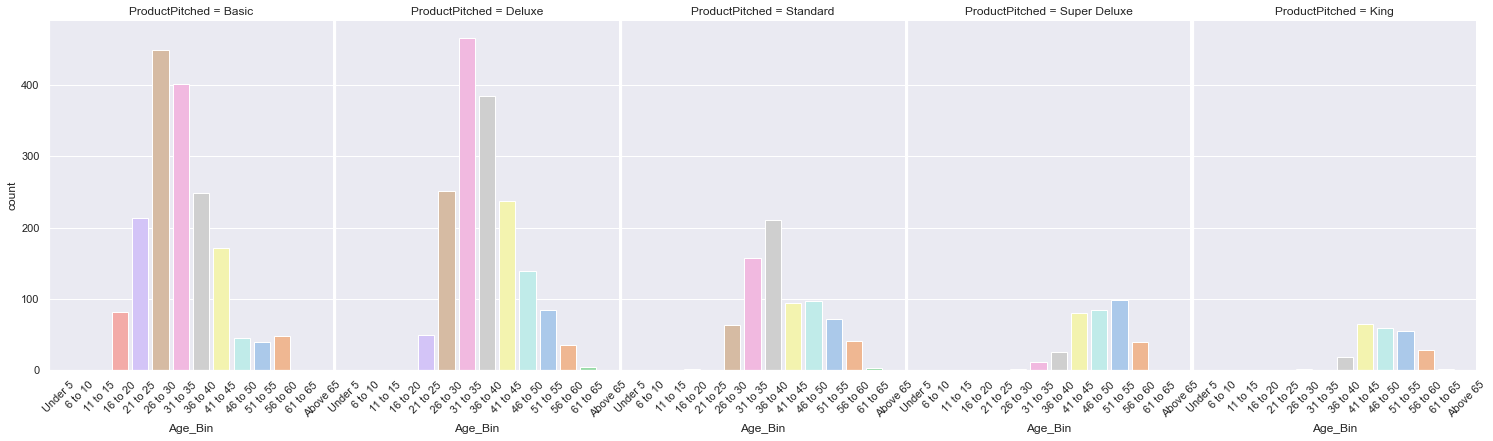

<IPython.core.display.Javascript object>

In [94]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "Age_Bin")

#### Observation  "Age vs ProductPitched": 

1. **Basic :** Customers within age 26-30 were mostly pitched with this product
2. **Deluxe :** Customers within age 31-35 were mostly pitched with this product
3. **Standard :** Customers within age 36-40 were mostly pitched with this product
4. **Super Deluxe :** Customers within age 51-55 were mostly pitched with this product
5. **King :** Customers within age 41-45 were mostly pitched with this product

##### TypeofContact vs ProductPitched

Count  Percentage
ProductPitched TypeofContact                     
Basic          Company Invited    516        28.2
               Self Enquiry      1316        71.8
Deluxe         Company Invited    541        31.5
               Self Enquiry      1176        68.5
King           Company Invited     48        20.9
               Self Enquiry       182        79.1
Standard       Company Invited    218        29.4
               Self Enquiry       524        70.6
Super Deluxe   Company Invited     96        28.1
               Self Enquiry       246        71.9

--------------------------------------------------------------------------------------------------------------


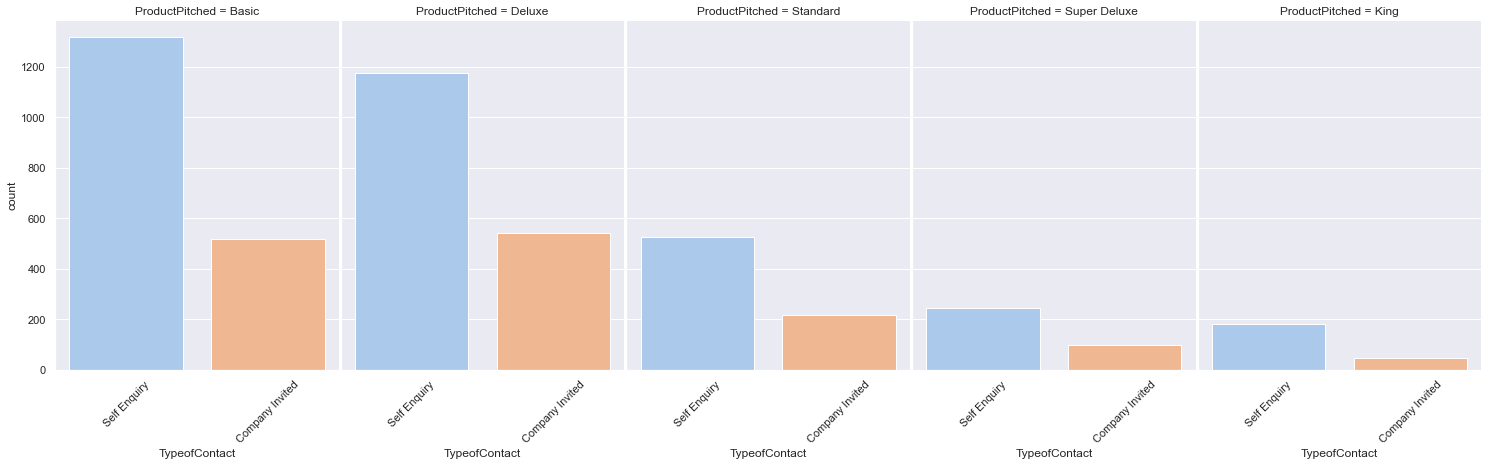

<IPython.core.display.Javascript object>

In [95]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "TypeofContact")

#### Observation  "TypeofContact vs ProductPitched": 

1. **Basic :** 71.8 % of customers were contacted by "Self Enquiry"
2. **Deluxe :** 68.5 % of customers were contacted by "Self Enquiry"
3. **Standard :** 70.6 % of customers were contacted by "Self Enquiry"
4. **Super Deluxe :** 71.9 % of customers were contacted by "Self Enquiry"
5. **King :** 79.1 % of customers were contacted by "Self Enquiry"

##### CityTier vs ProductPitched

Count  Percentage
ProductPitched CityTier                   
Basic          1          1466        79.6
               2           108         5.9
               3           268        14.5
Deluxe         1           908        52.4
               2            40         2.3
               3           784        45.3
King           1           168        73.0
               2            22         9.6
               3            40        17.4
Standard       1           436        58.8
               2            18         2.4
               3           288        38.8
Super Deluxe   1           212        62.0
               2            10         2.9
               3           120        35.1

--------------------------------------------------------------------------------------------------------------


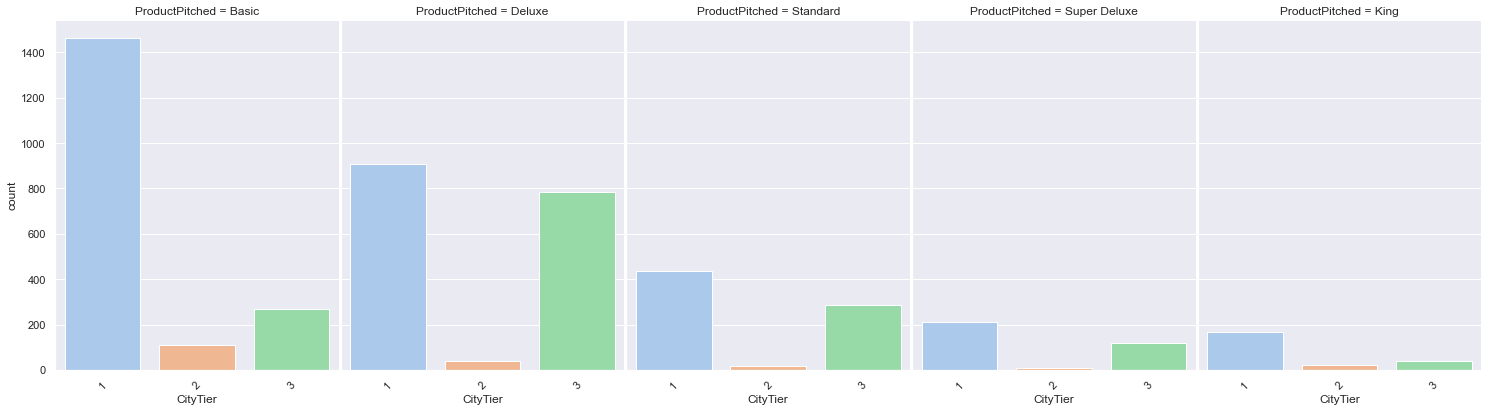

<IPython.core.display.Javascript object>

In [96]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "CityTier")

#### Observation  "CityTier vs ProductPitched": 

1. **Basic :** 79.6% of customers were from CityTier "1", followed by 14.5% from CityTier "3" and 5.9% from CityTier "1"
2. **Deluxe :** 52.4% of customers were from CityTier "1", followed by 45.3% from CityTier "3" and 2.3% from CityTier "1"
3. **Standard :** 58.8% of customers were from CityTier "1", followed by 38.8% from CityTier "3" and 2.4% from CityTier "1"
4. **Super Deluxe :** 62.00% of customers were from CityTier "1", followed by 35.1% from CityTier "3" and 2.9% from CityTier "1"
5. **King :** 73.0% of customers were from CityTier "1", followed by 17.4% from CityTier "3" and 9.6% from CityTier "1"

##### DurationOfPitch vs ProductPitched

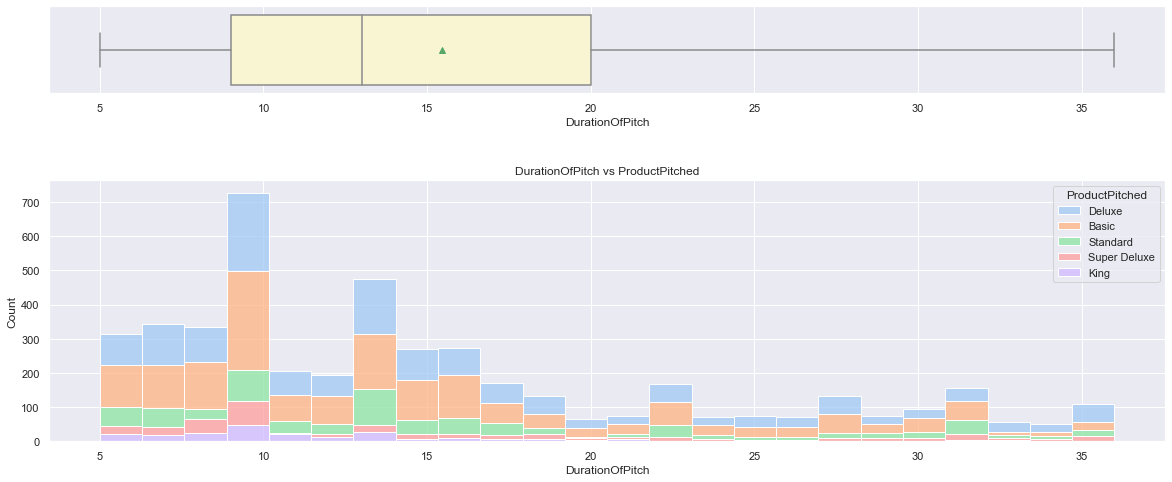

<IPython.core.display.Javascript object>

In [97]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    tourism_data[tourism_data["DurationOfPitch"] < 40],
    "DurationOfPitch",
    "ProductPitched",
    "DurationOfPitch vs ProductPitched",
)

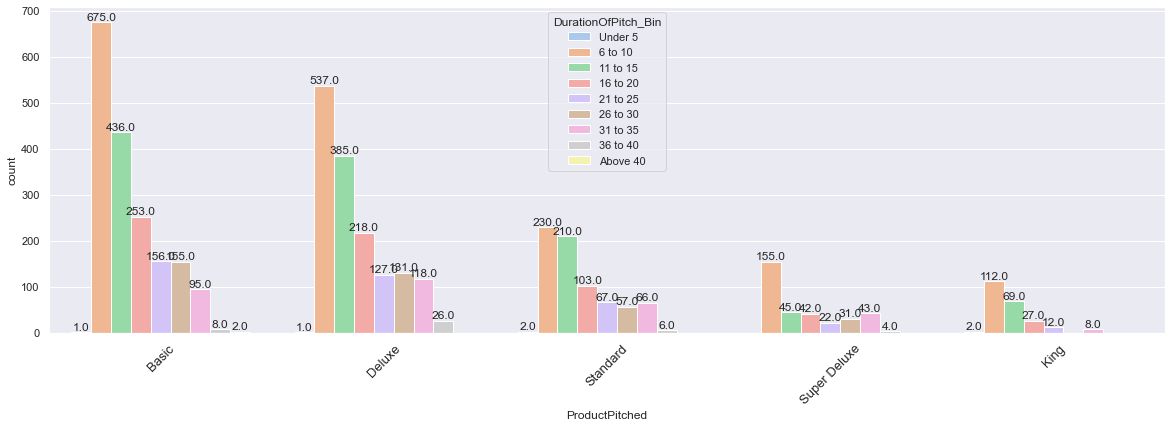

<IPython.core.display.Javascript object>

In [98]:
# Visualize data through plot
labeled_barplot(
    tourism_data, "ProductPitched", h="DurationOfPitch_Bin", fig_size=(20, 6)
)

#### Observation  "DurationOfPitch vs ProductPitched": 

1. **Basic :** Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20 
2. **Deluxe :** Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20
3. **Standard :** Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20
4. **Super Deluxe :** Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20
5. **King :** Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20

##### Occupation vs ProductPitched

Count  Percentage
ProductPitched Occupation                       
Basic          Free Lancer         2         0.1
               Large Business    196        10.6
               Salaried          924        50.2
               Small Business    720        39.1
Deluxe         Large Business    124         7.2
               Salaried          818        47.2
               Small Business    790        45.6
King           Large Business     12         5.2
               Salaried          114        49.6
               Small Business    104        45.2
Standard       Large Business     84        11.3
               Salaried          338        45.6
               Small Business    320        43.1
Super Deluxe   Large Business     18         5.3
               Salaried          174        50.9
               Small Business    150        43.9

--------------------------------------------------------------------------------------------------------------


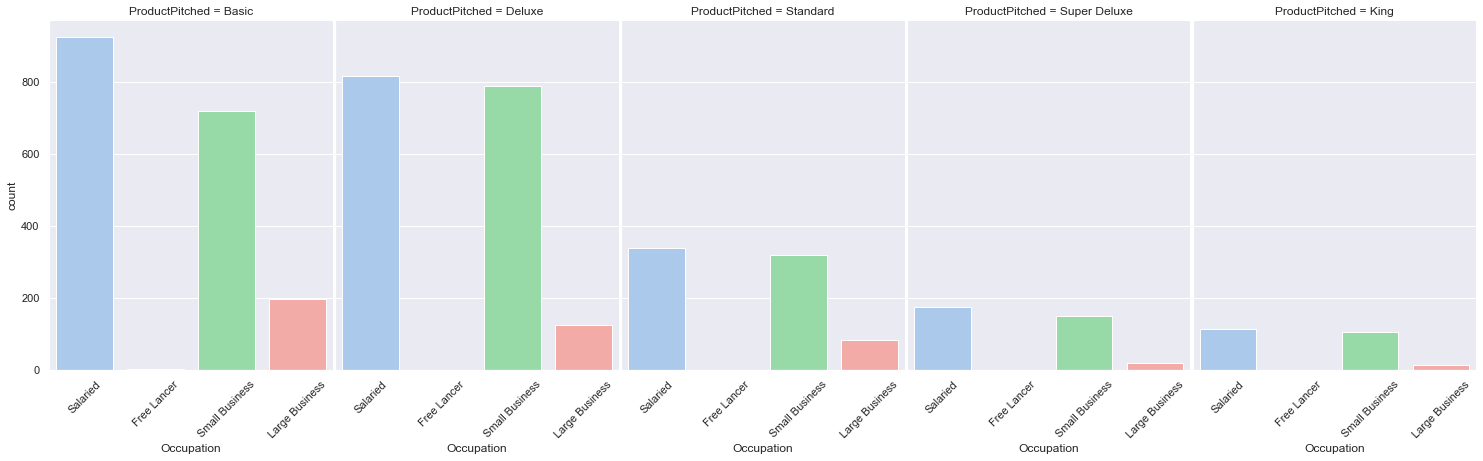

<IPython.core.display.Javascript object>

In [99]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "Occupation")

#### Observation  "Occupation vs ProductPitched": 

1. **Basic :** 50.2% of customers had occupation as "Salaried", followed by 39.1% had occupation "Small Business" and 10.6% had occupation "Large Business"
2. **Deluxe :** 47.2% of customers had occupation as "Salaried", followed by 45.6% had occupation "Small Business" and 7.2% had occupation "Large Business"
3. **Standard :** 45.6% of customers had occupation as "Salaried", followed by 43.1% had occupation "Small Business" and 11.3% had occupation "Large Business"
4. **Super Deluxe :** 50.9% of customers had occupation as "Salaried", followed by 43.9% had occupation "Small Business" and 5.3% had occupation "Large Business"
5. **King :** 49.6% of customers had occupation as "Salaried", followed by 45.2% had occupation "Small Business" and 5.2% had occupation "Large Business"

##### Gender vs ProductPitched

Count  Percentage
ProductPitched Gender                    
Basic          Fe Male      4         0.2
               Female     676        36.7
               Male      1162        63.1
Deluxe         Fe Male     83         4.8
               Female     641        37.0
               Male      1008        58.2
King           Female      82        35.7
               Male       148        64.3
Standard       Fe Male     63         8.5
               Female     263        35.4
               Male       416        56.1
Super Deluxe   Fe Male      5         1.5
               Female     155        45.3
               Male       182        53.2

--------------------------------------------------------------------------------------------------------------


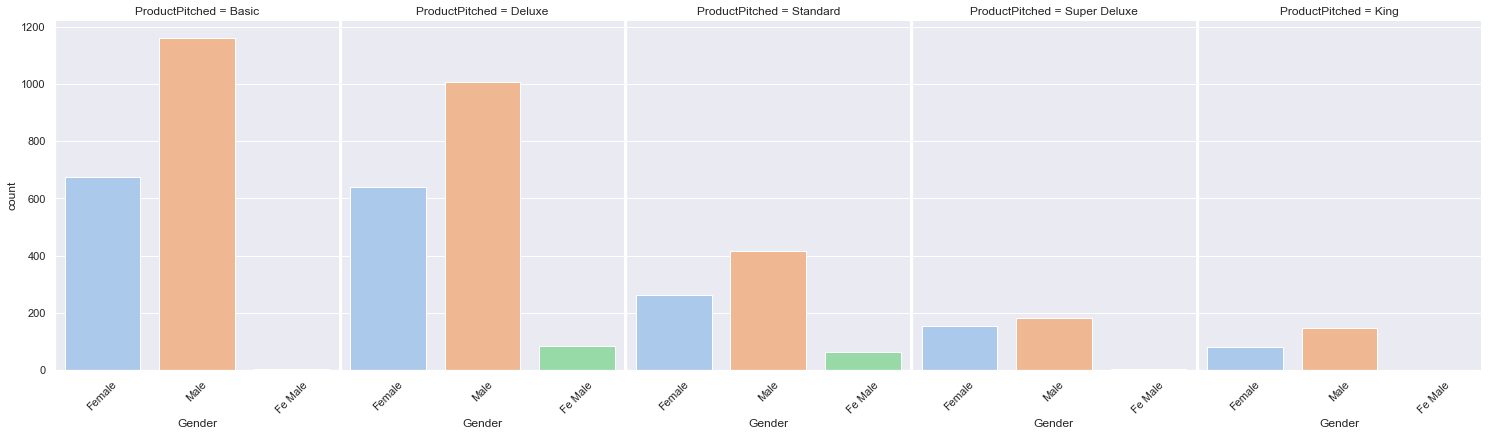

<IPython.core.display.Javascript object>

In [100]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "Gender")

#### Observation  "Gender vs ProductPitched": 

1. **Basic :** 63.1% of customers were "Males" and rest were "Females"
2. **Deluxe :** 58.2% of customers were "Males" and rest were "Females"
3. **Standard :** 56.1% of customers were "Males" and rest were "Females"
4. **Super Deluxe :** 53.2% of customers were "Males" and rest were "Females"
5. **King :** 64.3% of customers were "Males" and rest were "Females"

##### NumberOfPersonVisiting vs ProductPitched

Count  Percentage
ProductPitched NumberOfPersonVisiting                   
Basic          1                           9         0.5
               2                         517        28.1
               3                         911        49.5
               4                         404        21.9
               5                           1         0.1
Deluxe         1                          17         1.0
               2                         511        29.5
               3                         848        49.0
               4                         355        20.5
               5                           1         0.1
King           2                          75        32.6
               3                         115        50.0
               4                          40        17.4
Standard       1                           7         0.9
               2                         209        28.2
               3                         363        48.9
               4                         162        21.8
               5                           1         0.1
Super Deluxe   1                           6         1.8
               2                         106        31.0
               3                         165        48.2
               4                          65        19.0

--------------------------------------------------------------------------------------------------------------


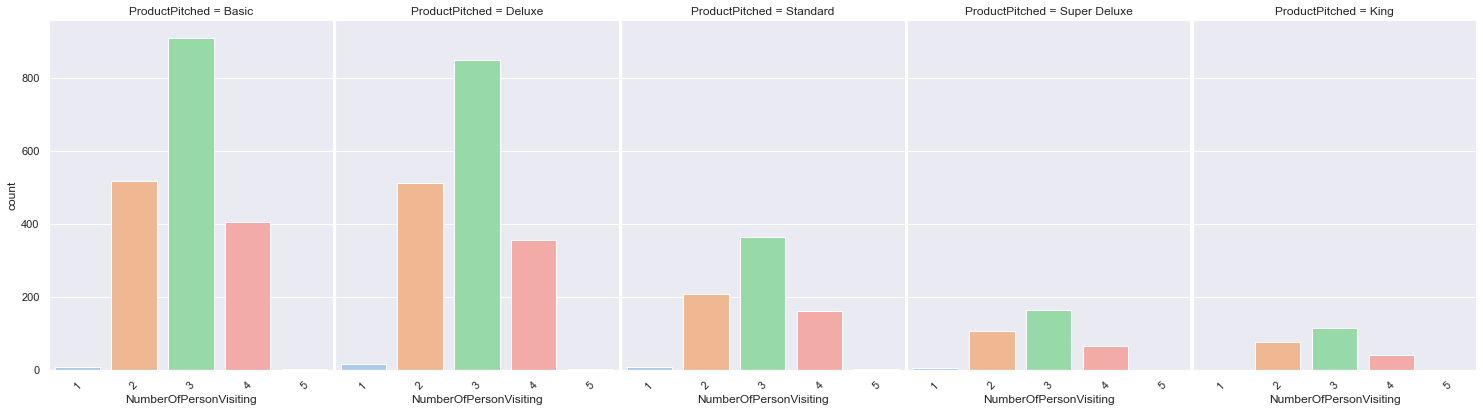

<IPython.core.display.Javascript object>

In [101]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "NumberOfPersonVisiting")

#### Observation  "NumberOfPersonVisiting vs ProductPitched": 

1. **Basic :** 49.5% of customers had "3" number of persons visiting, followed by "2"(28.1%) and "4"(21.9%)
2. **Deluxe :** 49.0% of customers had "3" number of persons visiting, followed by "2"(29.5%) and "4"(20.5%)
3. **Standard :** 48.9% of customers had "3" number of persons visiting, followed by "2"(28.2%) and "4"(21.8%)
4. **Super Deluxe :** 48.2% of customers had "3" number of persons visiting, followed by "2"(31.0%) and "4"(19.0%)
5. **King :** 50.0% of customers had "3" number of persons visiting, followed by "2"(32.6%) and "4"(17.4%)

##### NumberOfFollowups vs ProductPitched

Count  Percentage
ProductPitched NumberOfFollowups                   
Basic          1.0                   72         3.9
               2.0                   92         5.0
               3.0                  556        30.4
               4.0                  767        41.9
               5.0                  288        15.7
               6.0                   54         3.0
Deluxe         1.0                   65         3.8
               2.0                   86         5.1
               3.0                  509        29.9
               4.0                  724        42.6
               5.0                  263        15.5
               6.0                   53         3.1
King           1.0                    4         1.7
               2.0                    6         2.6
               3.0                   75        32.6
               4.0                  100        43.5
               5.0                   36        15.7
               6.0                    9         3.9
Standard       1.0                   17         2.3
               2.0                   23         3.1
               3.0                  221        29.8
               4.0                  333        44.9
               5.0                  133        17.9
               6.0                   15         2.0
Super Deluxe   1.0                   18         5.3
               2.0                   22         6.4
               3.0                  105        30.7
               4.0                  144        42.1
               5.0                   48        14.0
               6.0                    5         1.5

--------------------------------------------------------------------------------------------------------------


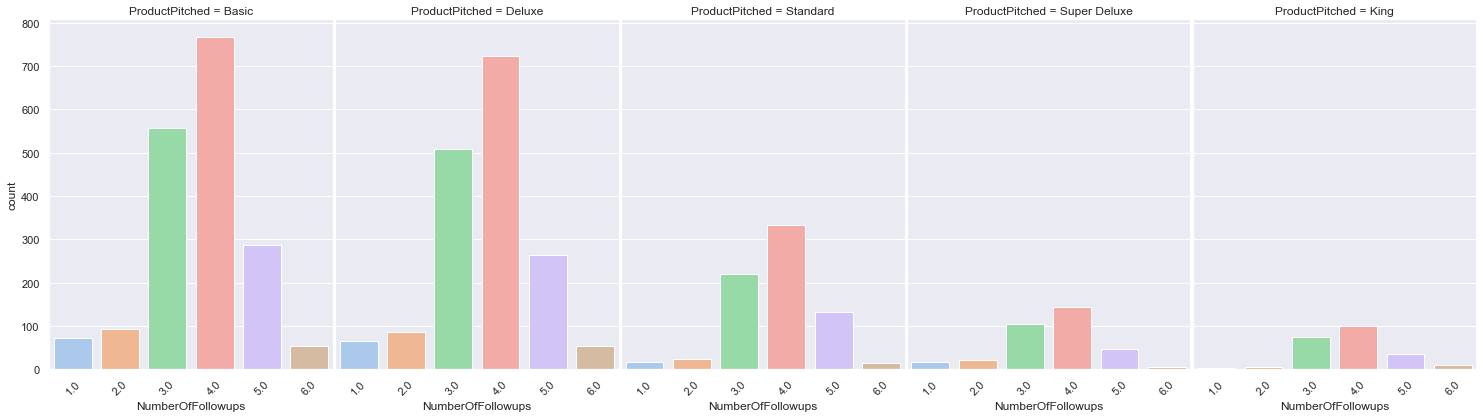

<IPython.core.display.Javascript object>

In [102]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "NumberOfFollowups")

#### Observation  "NumberOfFollowups vs ProductPitched": 

1. **Basic :** 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times 
2. **Deluxe :** 42.6% of customers were followed up "4" times, then 29.9% were followed up "3" times and 15.5% were followed up "5" times 
3. **Standard :** 44.9% of customers were followed up "4" times, then 29.8% were followed up "3" times and 17.9% were followed up "5" times 
4. **Super Deluxe :** 42.1% of customers were followed up "4" times, then 30.7% were followed up "3" times and 15.7% were followed up "5" times 
5. **King :** 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times 

##### PreferredPropertyStar vs ProductPitched

Count  Percentage
ProductPitched PreferredPropertyStar                   
Basic          3.0                     1118        60.7
               4.0                      368        20.0
               5.0                      355        19.3
Deluxe         3.0                     1090        63.0
               4.0                      312        18.0
               5.0                      329        19.0
King           3.0                      137        66.2
               4.0                       41        19.8
               5.0                       29        14.0
Standard       3.0                      436        58.8
               4.0                      130        17.5
               5.0                      175        23.6
Super Deluxe   3.0                      212        62.0
               4.0                       62        18.1
               5.0                       68        19.9

--------------------------------------------------------------------------------------------------------------


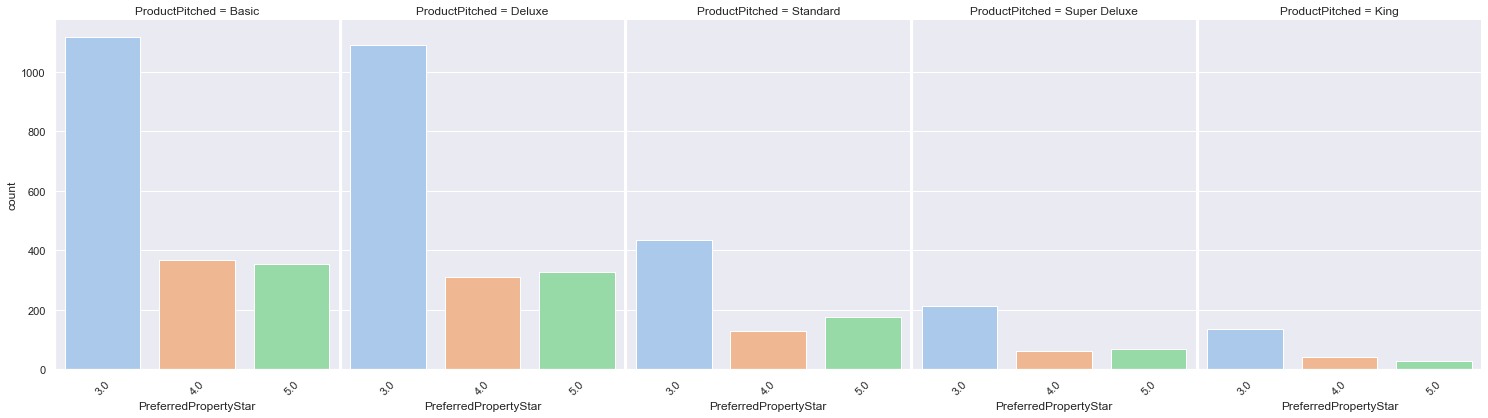

<IPython.core.display.Javascript object>

In [103]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "PreferredPropertyStar")

#### Observation  "PreferredPropertyStar vs ProductPitched": 

1. **Basic :** 60.7% of customers preferred property star "3", then 20.0% preferred "4" times and 19.3% preferred "5"
2. **Deluxe :** 63.0% of customers preferred property star "3", then 19.0% preferred "5" times and 18.0% preferred "4"
3. **Standard :** 58.8% of customers preferred property star "3", then 23.6% preferred "5" times and 17.5% preferred "4" 
4. **Super Deluxe :** 62.0% of customers preferred property star "3", then 19.9% preferred "5" times and 18.1% preferred "4" 
5. **King :** 66.2% of customers preferred property star "3", then 19.8% preferred "4" times and 14.0% preferred "5"

##### MaritalStatus vs ProductPitched

Count  Percentage
ProductPitched MaritalStatus                   
Basic          Divorced         332        18.0
               Married          816        44.3
               Single           511        27.7
               Unmarried        183         9.9
Deluxe         Divorced         336        19.4
               Married          852        49.2
               Single           221        12.8
               Unmarried        323        18.6
King           Divorced          52        22.6
               Married          126        54.8
               Single            52        22.6
Standard       Divorced         142        19.1
               Married          380        51.2
               Single            50         6.7
               Unmarried        170        22.9
Super Deluxe   Divorced          88        25.7
               Married          166        48.5
               Single            82        24.0
               Unmarried          6         1.8

--------------------------------------------------------------------------------------------------------------


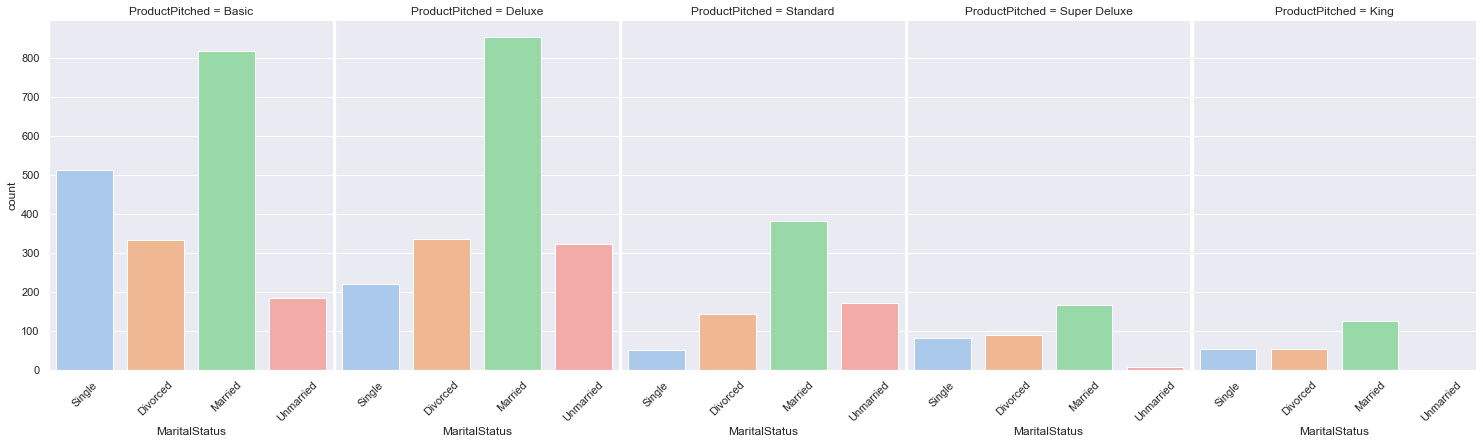

<IPython.core.display.Javascript object>

In [104]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "MaritalStatus")

#### Observation  "PreferredPropertyStar vs ProductPitched": 

1. **Basic :** 44.3% of customers were "Married", then 27.7% were "Single" and 18.0% were "Divorced"
2. **Deluxe :** 49.2% of customers were "Married", then 19.4% were "Divorced" and 18.6% were "Unmarried"
3. **Standard :** 51.2% of customers were "Married", then 22.9% were "Unmarried" and 19.1% were "Divorced"
4. **Super Deluxe :** 48.5% of customers were "Married", then 25.7% were "Divorced" and 24.0% were "Single"
5. **King :** 54.8% of customers were "Married", then 22.6% were "Single" and "Divorced"

##### NumberOfTrips vs ProductPitched

Count  Percentage
ProductPitched NumberOfTrips                   
Basic          1.0              212        11.5
               2.0              651        35.4
               3.0              492        26.8
               4.0              122         6.6
               5.0              136         7.4
               6.0              104         5.7
               7.0               77         4.2
               8.0               41         2.2
               19.0               1         0.1
               20.0               1         0.1
Deluxe         1.0              237        13.7
               2.0              513        29.7
               3.0              368        21.3
               4.0              184        10.6
               5.0              179        10.3
               6.0              130         7.5
               7.0               79         4.6
               8.0               38         2.2
               21.0               1         0.1
               22.0               1         0.1
King           1.0               28        18.9
               2.0               35        23.6
               3.0               20        13.5
               4.0               21        14.2
               5.0               21        14.2
               6.0               14         9.5
               7.0                8         5.4
               8.0                1         0.7
Standard       1.0              100        13.5
               2.0              205        27.7
               3.0              154        20.8
               4.0               95        12.8
               5.0               83        11.2
               6.0               54         7.3
               7.0               33         4.5
               8.0               17         2.3
Super Deluxe   1.0               43        14.7
               2.0               60        20.5
               3.0               45        15.4
               4.0               56        19.2
               5.0               39        13.4
               6.0               20         6.8
               7.0               21         7.2
               8.0                8         2.7

--------------------------------------------------------------------------------------------------------------


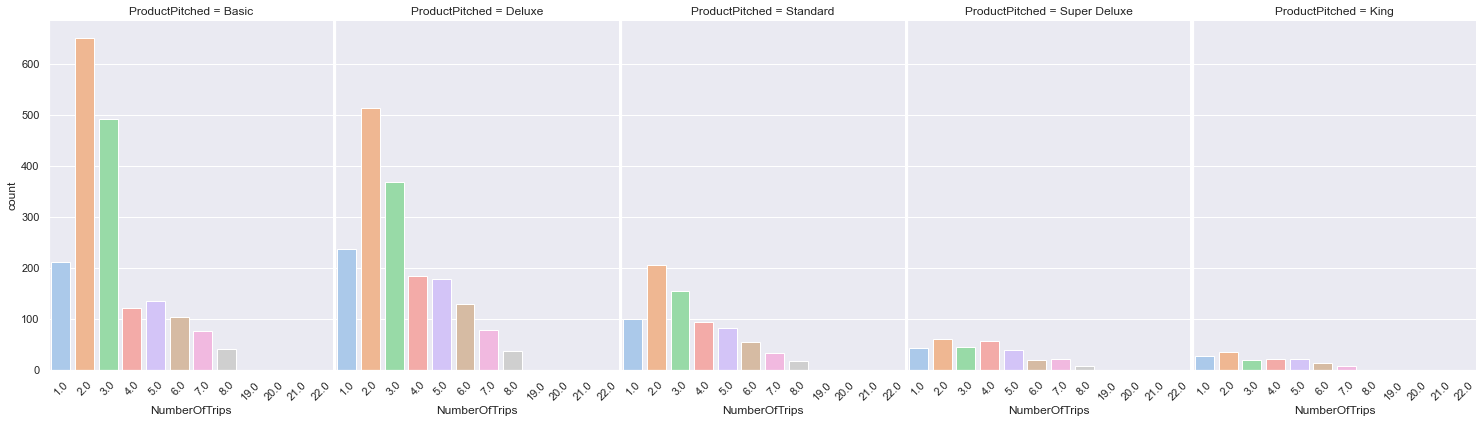

<IPython.core.display.Javascript object>

In [105]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "NumberOfTrips")

#### Observation  "NumberOfTrips vs ProductPitched": 

1. **Basic :** 35.4% of customers had taken "2" trips, then 26.8% took "3" trips and 11.5% took "1" trip
2. **Deluxe :** 29.7% of customers had taken "2" trips, then 21.3% took "3" trips and 13.7% took "1" trip
3. **Standard :** 27.7% of customers had taken "2" trips, then 20.8% took "3" trips and 13.5% took "1" trip
4. **Super Deluxe :** 20.5% of customers had taken "2" trips, then 19.2% took "4" trips and 15.4% took "3" trips
5. **King :** 23.6% of customers had taken "2" trips, then 18.9% took "1" trips and 14.2% took "4" and "5" trips

##### Passport vs ProductPitched

Count  Percentage
ProductPitched Passport                   
Basic          0          1274        69.2
               1           568        30.8
Deluxe         0          1252        72.3
               1           480        27.7
King           0           170        73.9
               1            60        26.1
Standard       0           532        71.7
               1           210        28.3
Super Deluxe   0           238        69.6
               1           104        30.4

--------------------------------------------------------------------------------------------------------------


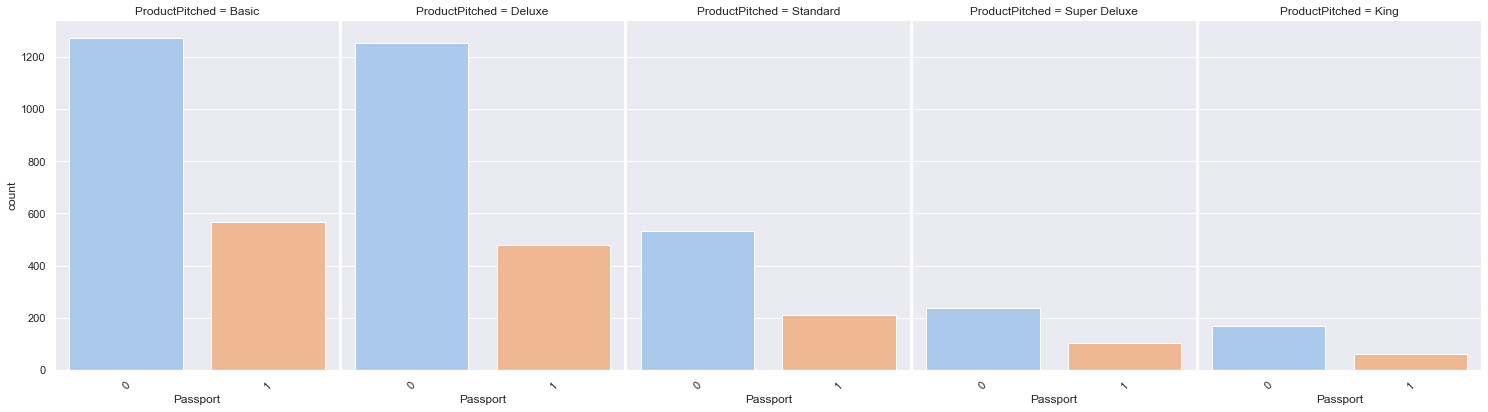

<IPython.core.display.Javascript object>

In [106]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "Passport")

#### Observation  "Passport vs ProductPitched": 

1. **Basic :** 69.2% of customers did not had passport and 30.8% had passport
2. **Deluxe :** 72.3% of customers did not had passport and 27.7% had passport
3. **Standard :** 71.7% of customers did not had passport and 28.3% had passport
4. **Super Deluxe :** 69.6% of customers did not had passport and 30.4% had passport
5. **King :** 73.9% of customers did not had passport and 26.1% had passport

##### PitchSatisfactionScore vs ProductPitched

Count  Percentage
ProductPitched PitchSatisfactionScore                   
Basic          1                         358        19.4
               2                         204        11.1
               3                         550        29.9
               4                         390        21.2
               5                         340        18.5
Deluxe         1                         352        20.3
               2                         220        12.7
               3                         552        31.9
               4                         280        16.2
               5                         328        18.9
King           1                          40        17.4
               2                          34        14.8
               3                          48        20.9
               4                          50        21.7
               5                          58        25.2
Standard       1                         146        19.7
               2                         102        13.7
               3                         202        27.2
               4                         144        19.4
               5                         148        19.9
Super Deluxe   1                          46        13.5
               2                          26         7.6
               3                         126        36.8
               4                          48        14.0
               5                          96        28.1

--------------------------------------------------------------------------------------------------------------


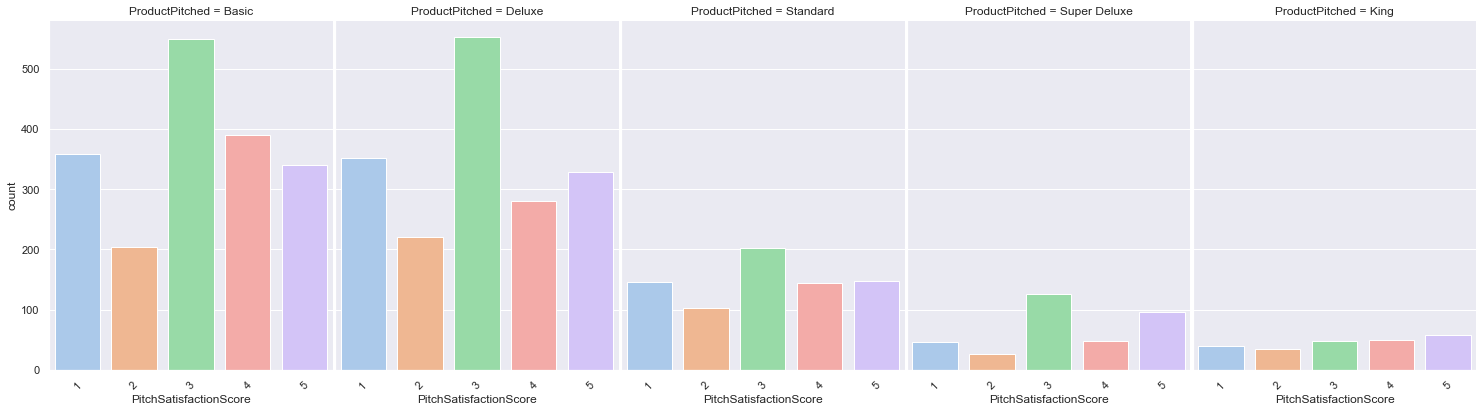

<IPython.core.display.Javascript object>

In [107]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "PitchSatisfactionScore")

#### Observation  "PitchSatisfactionScore vs ProductPitched": 

1. **Basic :** 29.9% of customers had pitch satisfaction score "3", then 21.2% had "4" and 19.3% had "1"
2. **Deluxe :** 31.9% of customers had pitch satisfaction score "3", then 20.3% had "1" and 18.9% had "5"
3. **Standard :** 27.2% of customers had pitch satisfaction score "3", then 19.9% had "5" and 19.7% had "1"
4. **Super Deluxe :** 36.8% of customers had pitch satisfaction score "3", then 28.1% had "5" and 14.0% had "4"
5. **King :** 25.2% of customers had pitch satisfaction score "5", then 21.7% had "4" and 20.9% had "3"

##### OwnCar vs ProductPitched

Count  Percentage
ProductPitched OwnCar                   
Basic          0         758        41.2
               1        1084        58.8
Deluxe         0         674        38.9
               1        1058        61.1
King           0          64        27.8
               1         166        72.2
Standard       0         258        34.8
               1         484        65.2
Super Deluxe   0         102        29.8
               1         240        70.2

--------------------------------------------------------------------------------------------------------------


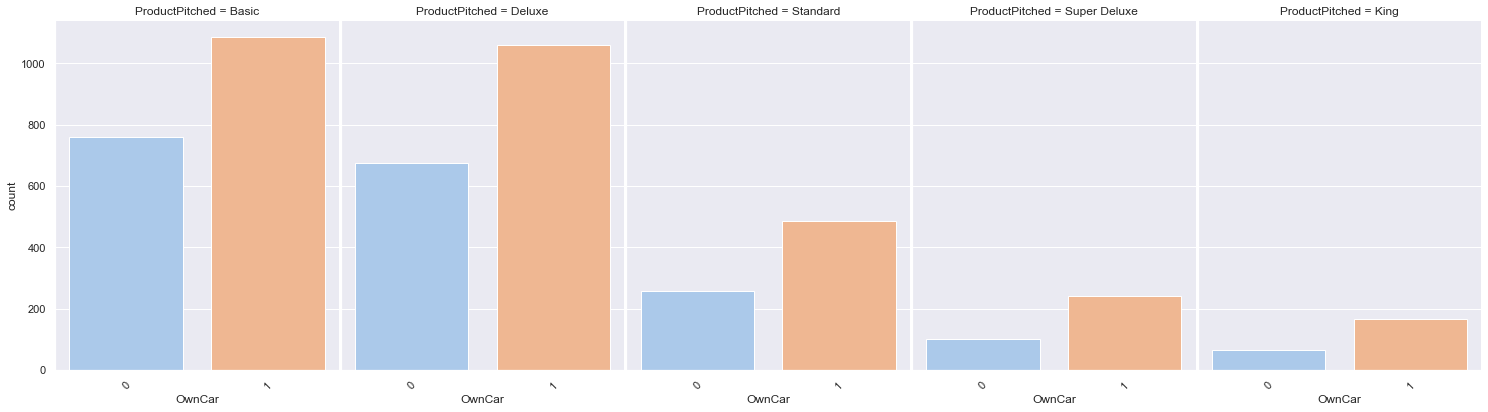

<IPython.core.display.Javascript object>

In [108]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "OwnCar")

#### Observation  "OwnCar vs ProductPitched": 

1. **Basic :** 58.8% of customers owned a car and 41.2% did not
2. **Deluxe :** 61.1% of customers owned a car and 38.9% did not
3. **Standard :** 65.2% of customers owned a car and 34.8% did not
4. **Super Deluxe :** 70.2% of customers owned a car and 29.8% did not
5. **King :** 72.2% of customers owned a car and 27.8% did not

##### NumberOfChildrenVisiting vs ProductPitched

Count  Percentage
ProductPitched NumberOfChildrenVisiting                   
Basic          0.0                         404        21.9
               1.0                         793        43.1
               2.0                         517        28.1
               3.0                         127         6.9
Deluxe         0.0                         391        22.6
               1.0                         754        43.6
               2.0                         474        27.4
               3.0                         112         6.5
King           0.0                          31        14.8
               1.0                          89        42.6
               2.0                          72        34.4
               3.0                          17         8.1
Standard       0.0                         172        23.2
               1.0                         318        42.9
               2.0                         198        26.7
               3.0                          53         7.2
Super Deluxe   0.0                          84        28.0
               1.0                         126        42.0
               2.0                          74        24.7
               3.0                          16         5.3

--------------------------------------------------------------------------------------------------------------


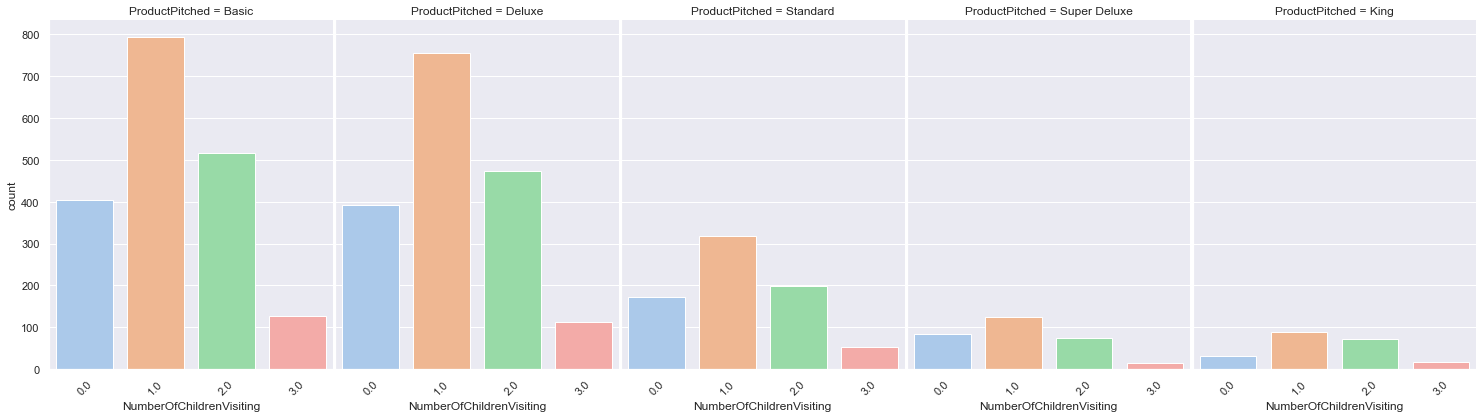

<IPython.core.display.Javascript object>

In [109]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "NumberOfChildrenVisiting")

#### Observation  "NumberOfChildrenVisiting vs ProductPitched": 

1. **Basic :** 43.1% of customers had "1" children travelling with them, then 28.1% had "2"  and 21.9% had "0"
2. **Deluxe :** 43.6% of customers had "1" children travelling with them, then 43.6% had "2"  and 22.6% had "0"
3. **Standard :** 42.9% of customers had "1" children travelling with them, then 26.7% had "2"  and 23.2% had "0"
4. **Super Deluxe :** 42.0% of customers had "1" children travelling with them, then 28.0% had "0"  and 24.7% had "2"
5. **King :** 42.6% of customers had "1" children travelling with them, then 34.4% had "2"  and 14.8% had "0"

##### Designation vs ProductPitched

Count  Percentage
ProductPitched Designation                      
Basic          Executive        1842       100.0
Deluxe         Manager          1732       100.0
King           VP                230       100.0
Standard       Senior Manager    742       100.0
Super Deluxe   AVP               342       100.0

--------------------------------------------------------------------------------------------------------------


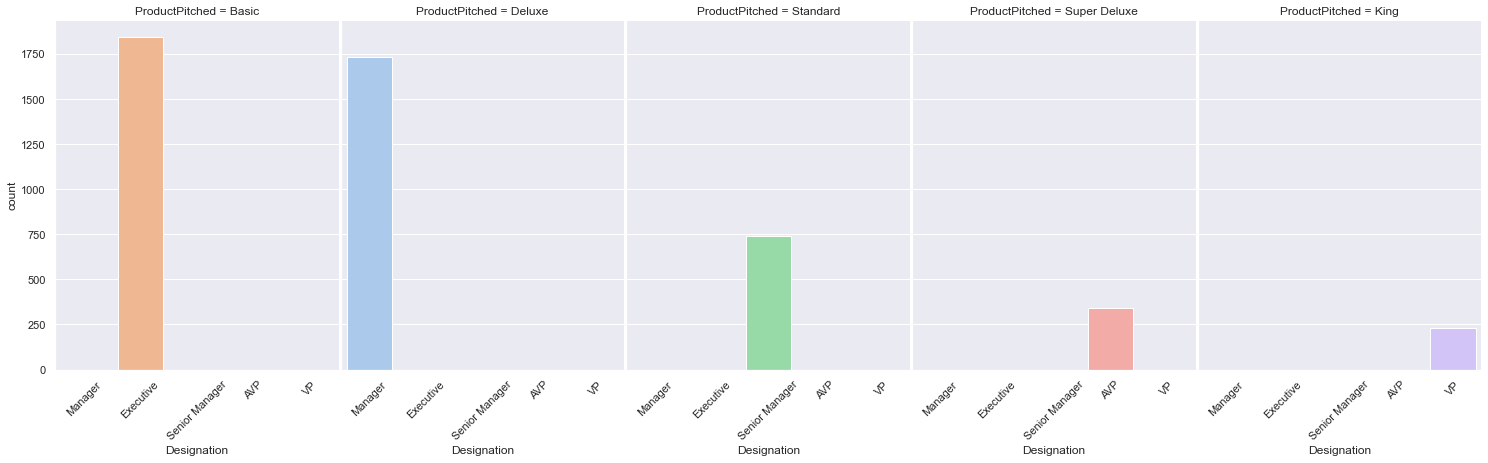

<IPython.core.display.Javascript object>

In [110]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "Designation")

#### Observation  "Designation vs ProductPitched": 

1. **Basic :** 100% of customers were "Executive"
2. **Deluxe :** 100% of customers were "Manager"
3. **Standard :** 100% of customers were "Senior Manager"
4. **Super Deluxe :** 100% of customers were "AVP" (Assistant Vice President)
5. **King :** 100% of customers were "VP" (Vice President)

##### MonthlyIncome vs ProductPitched

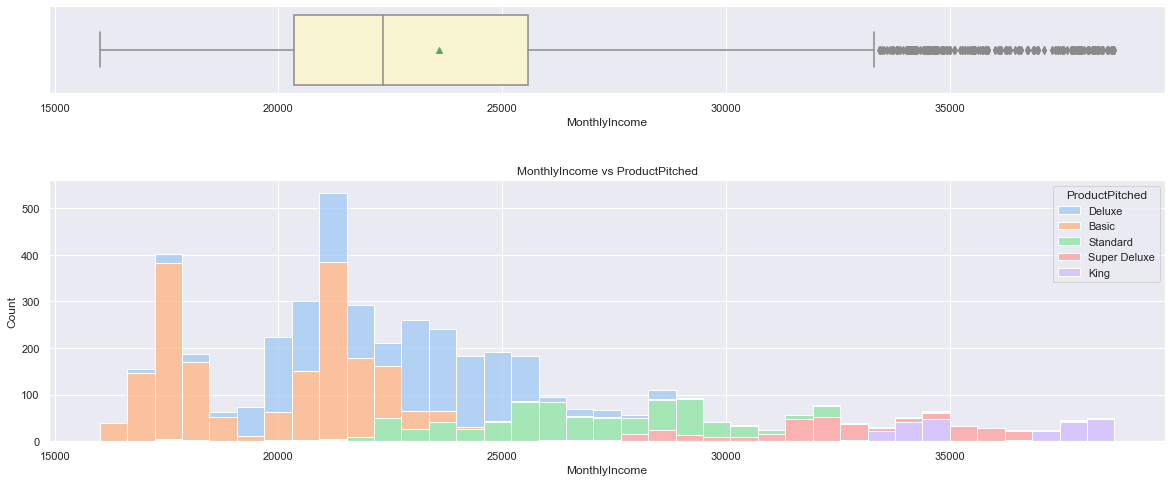

<IPython.core.display.Javascript object>

In [111]:
# Visualize data through histogram and box plots for outliers and its impact
hist_boxplot_with_hue(
    tourism_data[
        (tourism_data["MonthlyIncome"] > 15000)
        & (tourism_data["MonthlyIncome"] < 40000)
    ],
    "MonthlyIncome",
    "ProductPitched",
    "MonthlyIncome vs ProductPitched",
)

Count  Percentage
ProductPitched MonthlyIncome_Bin                   
Basic          Under 5000             0         0.0
               5001 to 10000          0         0.0
               10001 to 15000         0         0.0
               15001 to 20000       837        47.7
               20001 to 25000       891        50.8
               25001 to 30000        11         0.6
               30001 to 35000         9         0.5
               35001 to 40000         5         0.3
               Above 40000            2         0.1
Deluxe         Under 5000             2         0.1
               5001 to 10000          0         0.0
               10001 to 15000         0         0.0
               15001 to 20000       193        12.2
               20001 to 25000      1170        73.8
               25001 to 30000       212        13.4
               30001 to 35000         5         0.3
               35001 to 40000         4         0.3
               Above 40000            0         0.0
King           Under 5000             0         0.0
               5001 to 10000          0         0.0
               10001 to 15000         0         0.0
               15001 to 20000         1         0.4
               20001 to 25000         1         0.4
               25001 to 30000         0         0.0
               30001 to 35000       114        49.6
               35001 to 40000       114        49.6
               Above 40000            0         0.0
Standard       Under 5000             0         0.0
               5001 to 10000          0         0.0
               10001 to 15000         0         0.0
               15001 to 20000         6         0.8
               20001 to 25000       192        25.9
               25001 to 30000       474        63.9
               30001 to 35000        68         9.2
               35001 to 40000         2         0.3
               Above 40000            0         0.0
Super Deluxe   Under 5000             0         0.0
               5001 to 10000          0         0.0
               10001 to 15000         0         0.0
               15001 to 20000         1         0.3
               20001 to 25000         3         0.9
               25001 to 30000        71        20.8
               30001 to 35000       186        54.4
               35001 to 40000        81        23.7
               Above 40000            0         0.0

--------------------------------------------------------------------------------------------------------------


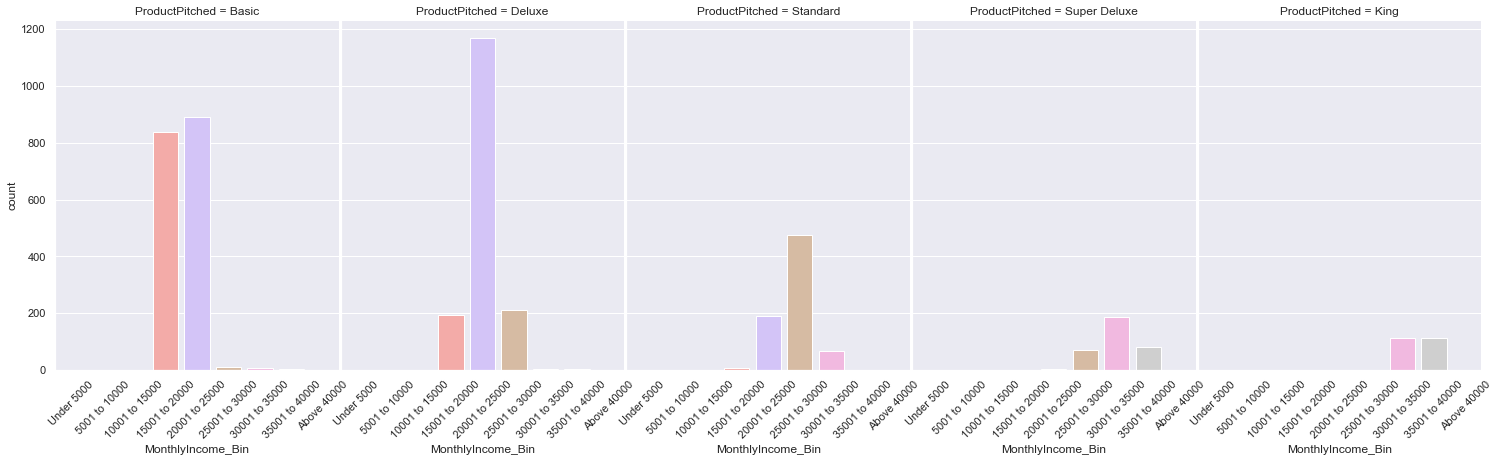

<IPython.core.display.Javascript object>

In [112]:
# Plot catplot along with percentage
catplot_with_percentage(tourism_data, "ProductPitched", "MonthlyIncome_Bin")

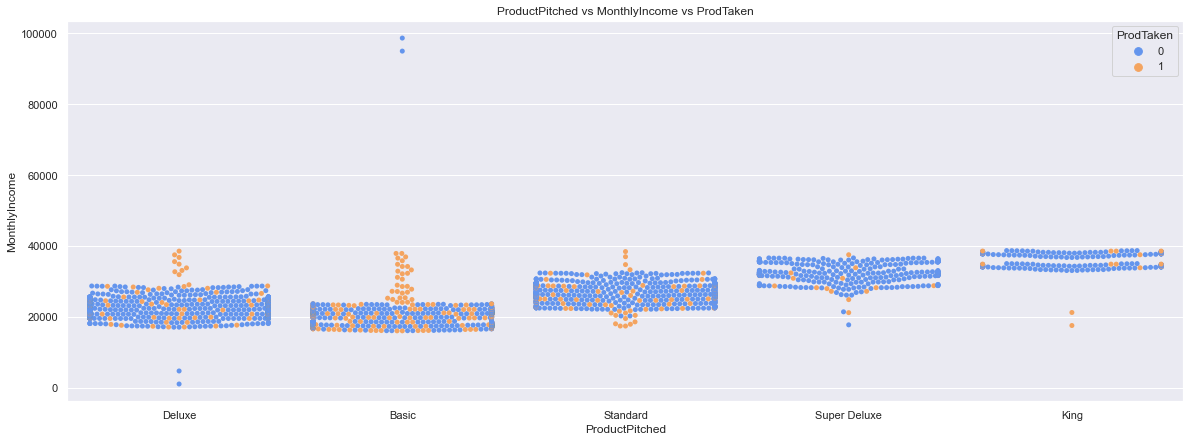

<IPython.core.display.Javascript object>

In [113]:
# Plot "ProductPitched vs MonthlyIncome vs ProdTaken" comparison
plt.figure(figsize=(20, 7))
sns.swarmplot(
    data=tourism_data,
    x="ProductPitched",
    y="MonthlyIncome",
    hue="ProdTaken",
    palette=["cornflowerblue", "sandybrown"],
).set(title="ProductPitched vs MonthlyIncome vs ProdTaken")
plt.show()

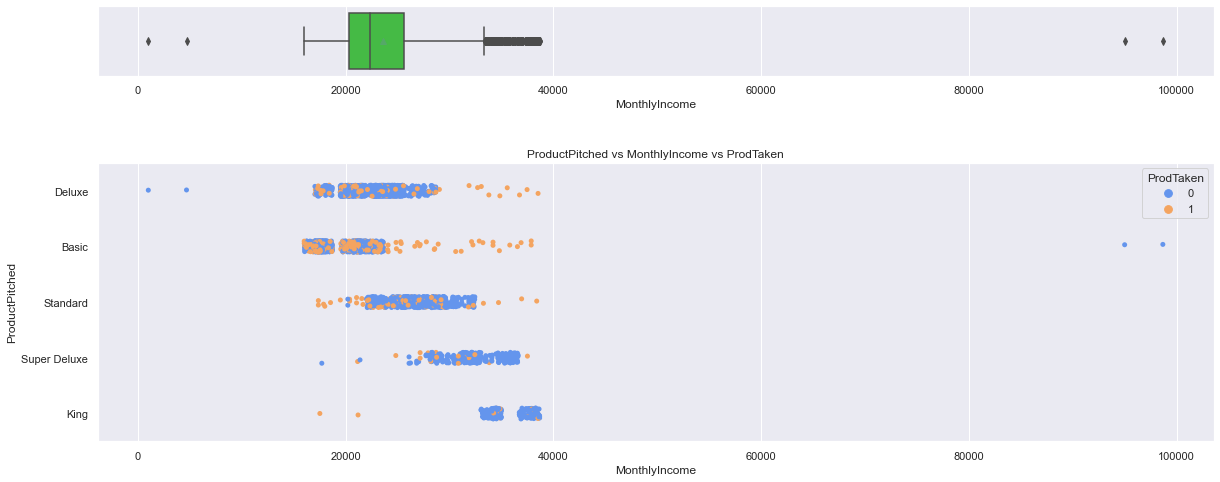

<IPython.core.display.Javascript object>

In [114]:
# Plot boxplot with outliers along with stripplot to compare outliers against productpitched and prodtaken features
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2, sharex=False, gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize=(20, 8),
)
plt.subplots_adjust(hspace=0.5)
sns.boxplot(
    data=tourism_data, x="MonthlyIncome", ax=ax_box2, showmeans=True, color="limegreen",
)
sns.stripplot(
    data=tourism_data,
    y="ProductPitched",
    x="MonthlyIncome",
    hue="ProdTaken",
    palette=["cornflowerblue", "sandybrown"],
).set(title="ProductPitched vs MonthlyIncome vs ProdTaken")
plt.show()

#### Observation  "Monthly Income vs ProductPitched": 

1. **Basic :** Customers mostly had income range 20001-25000(50.8%), followed by 15001-20000(47.7%) and 25001-30000(0.6%) 
2. **Deluxe :** Customers mostly had income range 20001-25000(73.8%), followed by 25001-30000(13.4%) and 15001- 20000(12.2%) 
3. **Standard :** Customers mostly had income range 25001-30000(63.9%), followed by 20001-25000(25.9%) and 30001- 35000(9.2%) 
4. **Super Deluxe :** Customers mostly had income range 30001-35000(54.4%), followed by 35001-40000(23.7%) and 25001-30000(20.8%) 
5. **King :** Customers mostly had income range 30001-40000(49.6%), followed by 15001-25000(0.4%)
6. Outliers seems to be genuine and mostly comes under Products "Super Deluxe" and "King"

### 5. Insights Based On EDA

### Data Description:

* There are 4888 rows and 19 columns
* There are null values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome". Missing value treatment is required for these columns
* **The target variable is "ProdTaken." It does not have null values**
* Column "Age" is in years and is a continous variable
* Columns "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" are strings and categorical variable. They can be typecast as Categorical. OneHotEncoding can be applied on these columns.
* Columns "CityTier", "NumberOfPersonVisiting", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "PitchSatisfactionScore" and "NumberOfChildrenVisiting" are sequential numbers
* Column "DurationOfPitch" is probably in minutes and is a continous variable
* Columns "Passport" and "OwnCar" are numbers and has only two values - 0 & 1

### Data Cleaning:

* There are missing values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome"
* Columns "Age", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome" are numeric. So missing values in these columns can be imputed with median value
* Columns "TypeofContact" is categoric. So missing values in these columns can be imputed with mode value
* In column "Age", there are three values "Male", "Female" and "Fe Male". However, "Fe Male" looks like a mistake of "Female". Need to correct this data


### Insights on each columns are listed below:

#### Customer details:

**1. CustomerID (Unique customer ID) :** This feature was unique. So made this index column.

**2. ProdTaken (Whether the customer has purchased a package or not (0: No, 1: Yes) :** This feature is the target variable. It is a numerical column. But, it has only two values "0" and "1" meaning "No" and "Yes" respectively. It denotes whether customer took travel package or not. **Most of customers did not purchase travel package (81.2%). Objective is to get more customers to purchase travel package.**

**3. Age (Age of customer) :** This feature has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 37.622265 and 36 respectively. There are missing values and treatment is required. Most of the customers fall under age range 31 to 35, followed by 36-40 and  26-30. Customers of younger age doesn't purchase travel packages. Probably because they dont have any job yet and so no money. Customers of older age also doesn't purchase travel packages. Probably because they dont have good health to travel.

**4. TypeofContact (How customer was contacted (Company Invited or Self Inquiry)) :** This feature is a categorical variable. There are only two values "Self Enquiry" and "Company Invited". Most of the customers were contacted by "Self Enquiry" (70.5%) compared to "Company Invited" (29.0%). There are missing values. Since this is a categorical variable, mode ("Self Enquiry") must be used to treat missing values.

**5. CityTier (City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3) :** This feature is a numerical column. But, it has only three values 1,2 and 3 Its value depends on the development of a city, population, facilities, and living standards. Tier 1 cities are more (65.3%) followed by Tier 3 (30.7%) and Tier 2 (4.1%).There are no missing values.

**6. Occupation (Occupation of customer) :** This feature is a categorical variable. There are only four values "Salaried", "Small Business", "Large Business" and "Free Lancer". Most of the customers were "Salaried" (48.4%) followed by "Small Business" (42.6%), "Large Business" (8.9%) and "Free Lancer" (0.0%). There are no missing values.

**7. Gender (Gender of customer) :** This feature is a categorical variable. There are three values "Male", "Female" and "Fe Male". **However, "Fe Male" looks like a mistake of "Female". Need to correct this data.**
Most of the customers were "Male" (59.7%) followed by "Female" (37.2%) and "Fe Male" (3.2%). There are no missing values.

**8. NumberOfPersonVisiting (Total number of persons planning to take the trip with the customer) :** This feature is a numerical column. But, it has only five values 1,2,3,4 and 5. Most of the customers had "3" persons travelling with them (49.1%) followed by "2" (29.0%), "4" (21.0%), "1" (0.8%) and "5" (0.1%). There are no missing values

**9. PreferredPropertyStar (Preferred hotel property rating by customer) :** This feature is a numerical column. But, it has only three values 3,4 and 5. Most of the customers preferred hotels with stars "3" (61.2%) followed by "5" (19.6%), and "4" (18.7%). There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values.

**10. MaritalStatus (Marital status of customer) :** This feature is a categorical column. It has four values "Married", "Divorced", "Single" and "Unmarried". Most of the customers were "Married" (47.9%) followed by "Divorced" (19.4%), "Single" (18.7%) and "Unmarried" (14.0%). There are no missing values

**11. NumberOfTrips (Average number of trips in a year by customer) :** This feature is a numerical column. But, it has limited values. Most of the customers took number of trips "2" (30%) followed by "3" (22.1%), and "1" (12.7%). There are outliers which looks extreme values and requires treatment. There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values.

**12. Passport (The customer has a passport or not (0: No, 1: Yes)) :** This feature is a categorical column. It has two values "0" and "1" which means "No" and "Yes" respectively. Most of the customers did not had Passport (70.9%). There are no missing values.

**13. OwnCar (Whether the customers own a car or not (0: No, 1: Yes)) :** This feature is a categorical column. It has two values "0" and "1" which means "No" and "Yes". Most of the customers owned a car (62.0%). There are no missing values.

**14. NumberOfChildrenVisiting (Total number of children with age less than 5 planning to take the trip with the customer) :** This feature is a numerical column. But, it has only four values 0,1,2 and 3. Most of the customers had number of children "1" (42.6%), followed by "2" (27.3%), "0" (22.1%) and "3" (6.6%). There are missing values. Since this is a numerical variable, median ("1") value can be used to treat missing values.

**15. Designation (Designation of the customer in the current organization) :** This feature is a categorical column. It has five values "Executive", "Manager", "Senior Manager", "AVP" and "VP". Most of the customers were "Executive" (37.7%), followed by "Manager" (35.4%), "Senior Manager" (15.2%), "AVP" (7.0%) and "VP" (4.7%). There are no missing values.

**16. MonthlyIncome (Gross monthly income of the customer) :** This feature has normal distribution with outliers. However, outlier treatment is not required because outlier values looks genuine. Mean and Median are almost same with values as 23619.853491 and 22347 respectively. There are missing values and treatment is required. Most of the customers (almost 50%) has monthly income in range 20001 to 25000, followed by 15001 to 20000, 25001 to 30000. Only very few customers has monthly income less than 5000 and above 40000.


#### Customer interaction data: 

**1. PitchSatisfactionScore (Sales pitch satisfaction score) :** This feature is a numerical column. But, it has only five values 1,2,3,4 and 5. Most of the customers had pitch satisfaction score "3" (30.2%), followed by "5" (19.8%), "1" (19.3%), "4" (18.7%) and "2" (12.0%). There are no missing values.

**2. ProductPitched (Product pitched by the salesperson) :** This feature is a categorical column. It has five values "Basic", "Deluxe", "Standard", "Super Deluxe" and "King". Most of the customers were sales pitched with "Basic" (37.7%) followed by "Deluxe" (35.4%), "Standard" (15.2%), "Super Deluxe" (7.0%) and "King" (4.7%). There are no missing values.

**3. NumberOfFollowups (Total number of follow-ups has been done by the salesperson after the sales pitch) :** This feature is a numerical column. But, it has only six values 1,2,3,4,5 and 6. Most of the customers had to be followed up "4" times (42.3%) followed by "3" (30.0%), "5" (15.7%), "2" (4.7%), "1" (3.6%) and "6" (2.8%). There are missing values. Since this is a numerical variable, median ("4") can be used to treat missing values.

**4. DurationOfPitch (Duration of the pitch by a salesperson to the customer) :** This feature has normal distribution. There are outliers which looks extreme values and requires treatment. Mean and Median are almost same with values as 15.490835 and 13 respectively. There are missing values and treatment is required. Most of the customers had sales pitch duration in range 6 to 10, followed by 11 to 15 and 16 to 20. Very few customers had sales pitch duration less than 5 and above 35.


### Other Insights :

**1. Age and ProductTaken :** Number of customers who took travel package are more at around age 30. However, number of customers who didn't take travel package are more at around age 35. However, customers in age range between 16 and 20 tends to take travel package more. More than 60% of customers in this age range has taken travel package.

**2. MonthlyIncome and ProductTaken :** There is a correlation between MonthlyIncome and ProdTaken. Customers with income between 15001 and 20000 tends to take travel package more. Whereas, customers with income less than 5000 and more than 40000 did not take travel package.

**3. Passport and ProductTaken :** Customers who has Passport had taken travel packages more. Probably, those are overseas travel packages.

**4. DurationOfPitch vs ProdTaken :** There is a slight correlation between DurationOfPitch and ProdTaken. Customers tends to take travel package more when duration of sales pitch is between 26 to 30. Customers tends to reject travel package completely when duration of sales pitch is less than 5 and above 40.

**5. Occupation vs ProdTaken :** All customers doing occupation "Free Lancer" had accepted travel package. However, there were only 2 customers in this category. Customers doing occupation "Large Business" had accepted travel package more compared to "Small Business" and "Salaried". Probably, these customers have more income and can afford travel packages.

**6. NumberOfPersonVisiting vs ProdTaken :** Customers where NumberOfPersonVisiting is 1 or 5 didnt take travel package. Probably because they dont want to travel alone. Also, travel expense may be more if numbers of persons are 5. Customers where NumberOfPersonVisiting is 3,2 and 4 had shown equal interest to take travel package.

**7. NumberOfFollowups vs ProdTaken :** More NumberOfFollowups had made customers take travel package. Customers who were followed up 6 times had mostly taken travel package. Then comes 5,4,3,1 and 2. There is a correlation between NumberOfFollowups and ProdTaken.

**8. ProductPitched vs ProdTaken :** Customers who were pitched with product "Basic" had taken it more compared to other products. Probably, its least expensive travel package. Then comes Standard, Deluxe, King and Super Deluxe.
There is a slight correlation between ProductPitched and ProdTaken.

**9. PreferredPropertyStar vs ProdTaken :** Customers who preferred property star 5 had taken travel package more. Probably, they were impressed with property ratings. Then comes PreferredPropertyStar of 4 and 3.

**10. MaritalStatus vs ProdTaken :** Customers who are "Single" had taken travel package more compared to others. Then comes "Unmarried", "Married" and "Divorced".

**11. NumberOfTrips vs ProdTaken :** Customers who had 7 and 8 trips had taken travel packages more. Customers who already took more than 20 trips did not accept travel package. However, customers who took 19 and 20 trips tends to accept travel packages. Probably, these are outliers and can be treated.

**12. Designation vs ProdTaken :** Customers with designation "Executive" had taken travel package more. Then comes "Senior Manager", "Manager", "VP" and "AVP".




### Customer Profile of Travel Packages 

**1. Basic :** 30% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 26-30. 71.8 % of customers were contacted by "Self Enquiry". 79.6% of customers were from CityTier "1", followed by 14.5% from CityTier "3" and 5.9% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 50.2% of customers had occupation as "Salaried", followed by 39.1% had occupation "Small Business" and 10.6% had occupation "Large Business". 63.1% of customers were "Males" and rest were "Females". 49.5% of customers had "3" number of persons visiting, followed by "2"(28.1%) and "4"(21.9%). 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times. 60.7% of customers preferred property star "3", then 20.0% preferred "4" times and 19.3% preferred "5". 44.3% of customers were "Married", then 27.7% were "Single" and 18.0% were "Divorced". 35.4% of customers had taken "2" trips, then 26.8% took "3" trips and 11.5% took "1" trip. 69.2% of customers did not had passport and 30.8% had passport. 29.9% of customers had pitch satisfaction score "3", then 21.2% had "4" and 19.3% had "1". 58.8% of customers owned a car and 41.2% did not. 43.1% of customers had "1" children travelling with them, then 28.1% had "2" and 21.9% had "0". **100% of customers were "Executive".** Customers mostly had income range 20001-25000(50.8%), followed by 15001-20000(47.7%) and 25001-30000(0.6%).


**2. Deluxe :** 11.8% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 31-35. 68.5 % of customers were contacted by "Self Enquiry". 52.4% of customers were from CityTier "1", followed by 45.3% from CityTier "3" and 2.3% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 47.2% of customers had occupation as "Salaried", followed by 45.6% had occupation "Small Business" and 7.2% had occupation "Large Business". 58.2% of customers were "Males" and rest were "Females". 49.0% of customers had "3" number of persons visiting, followed by "2"(29.5%) and "4"(20.5%). 42.6% of customers were followed up "4" times, then 29.9% were followed up "3" times and 15.5% were followed up "5" times. 63.0% of customers preferred property star "3", then 19.0% preferred "5" times and 18.0% preferred "4". 49.2% of customers were "Married", then 19.4% were "Divorced" and 18.6% were "Unmarried". 29.7% of customers had taken "2" trips, then 21.3% took "3" trips and 13.7% took "1" trip. 72.3% of customers did not had passport and 27.7% had passport. 31.9% of customers had pitch satisfaction score "3", then 20.3% had "1" and 18.9% had "5". 61.1% of customers owned a car and 38.9% did not. 43.6% of customers had "1" children travelling with them, then 43.6% had "2" and 22.6% had "0".**100% of customers were "Manager".** Customers mostly had income range 20001-25000(73.8%), followed by 25001-30000(13.4%) and 15001- 20000(12.2%).

**3. Standard :** 16% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 36-40. 70.6 % of customers were contacted by "Self Enquiry". 58.8% of customers were from CityTier "1", followed by 38.8% from CityTier "3" and 2.4% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 45.6% of customers had occupation as "Salaried", followed by 43.1% had occupation "Small Business" and 11.3% had occupation "Large Business". 56.1% of customers were "Males" and rest were "Females". 48.9% of customers had "3" number of persons visiting, followed by "2"(28.2%) and "4"(21.8%). 44.9% of customers were followed up "4" times, then 29.8% were followed up "3" times and 17.9% were followed up "5" times. 58.8% of customers preferred property star "3", then 23.6% preferred "5" times and 17.5% preferred "4". 51.2% of customers were "Married", then 22.9% were "Unmarried" and 19.1% were "Divorced". 27.7% of customers had taken "2" trips, then 20.8% took "3" trips and 13.5% took "1" trip. 71.7% of customers did not had passport and 28.3% had passport. 27.2% of customers had pitch satisfaction score "3", then 19.9% had "5" and 19.7% had "1". 65.2% of customers owned a car and 34.8% did not. 42.9% of customers had "1" children travelling with them, then 26.7% had "2" and 23.2% had "0".**100% of customers were "Senior Manager".** Customers mostly had income range 25001-30000(63.9%), followed by 20001-25000(25.9%) and 30001- 35000(9.2%).


**4. Super Deluxe :** 5.8% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 51-55. 71.9 % of customers were contacted by "Self Enquiry". 62.00% of customers were from CityTier "1", followed by 35.1% from CityTier "3" and 2.9% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 50.9% of customers had occupation as "Salaried", followed by 43.9% had occupation "Small Business" and 5.3% had occupation "Large Business". 53.2% of customers were "Males" and rest were "Females". 48.2% of customers had "3" number of persons visiting, followed by "2"(31.0%) and "4"(19.0%). 42.1% of customers were followed up "4" times, then 30.7% were followed up "3" times and 15.7% were followed up "5" times. 62.0% of customers preferred property star "3", then 19.9% preferred "5" times and 18.1% preferred "4". 48.5% of customers were "Married", then 25.7% were "Divorced" and 24.0% were "Single". 20.5% of customers had taken "2" trips, then 19.2% took "4" trips and 15.4% took "3" trips. 69.6% of customers did not had passport and 30.4% had passport. 36.8% of customers had pitch satisfaction score "3", then 28.1% had "5" and 14.0% had "4". 70.2% of customers owned a car and 29.8% did not. 42.0% of customers had "1" children travelling with them, then 28.0% had "0" and 24.7% had "2".**100% of customers were "AVP".** Customers mostly had income range 30001-35000(54.4%), followed by 35001-40000(23.7%) and 25001-30000(20.8%).


**5. King :** 8.7% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 41-45. 79.1 % of customers were contacted by "Self Enquiry". 73.0% of customers were from CityTier "1", followed by 17.4% from CityTier "3" and 9.6% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 49.6% of customers had occupation as "Salaried", followed by 45.2% had occupation "Small Business" and 5.2% had occupation "Large Business". 64.3% of customers were "Males" and rest were "Females". 50.0% of customers had "3" number of persons visiting, followed by "2"(32.6%) and "4"(17.4%). 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times. 66.2% of customers preferred property star "3", then 19.8% preferred "4" times and 14.0% preferred "5". 54.8% of customers were "Married", then 22.6% were "Single" and "Divorced". 23.6% of customers had taken "2" trips, then 18.9% took "1" trips and 14.2% took "4" and "5" trips. 73.9% of customers did not had passport and 26.1% had passport. 25.2% of customers had pitch satisfaction score "5", then 21.7% had "4" and 20.9% had "3". 72.2% of customers owned a car and 27.8% did not. 42.6% of customers had "1" children travelling with them, then 34.4% had "2" and 14.8% had "0".**100% of customers were "VP".** Customers mostly had income range 30001-40000(49.6%), followed by 15001-25000(0.4%)


### Actions for Data Preprocessing:

1. There are null values and **Missing Value Treatment** is required.
2. **Outlier Treatment is required.** Analyse outlier values further.
3. Value "Fe Male" in feature "Gender" must be corrected as "Female".
4. Features "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" can be converted to category. One Hot Encoding must be applied to these categorical columns.


### 6. Data Preprocessing

#### A. Check Duplicates & Clean-up

In [115]:
# Check for duplicate rows
tourism_data[tourism_data.duplicated()].shape

(141, 22)

<IPython.core.display.Javascript object>

In [116]:
# Check for duplicate rows
tourism_data.duplicated().value_counts()

False    4747
True      141
dtype: int64

<IPython.core.display.Javascript object>

#### Observation : 
1. There are 141 duplicate values. They must be dropped.

In [117]:
# Drop duplicate rows
tourism_data.drop_duplicates(subset=None, keep="first", inplace=True)

<IPython.core.display.Javascript object>

In [118]:
# Again checking number of columns and rows
print(f"There are {tourism_data.shape[0]} rows and {tourism_data.shape[1]} columns.")

There are 4747 rows and 22 columns.


<IPython.core.display.Javascript object>

#### B. Missing Value Treatment

In [119]:
# Check null values and its percentage

def check_null_values():
    return pd.DataFrame(
    {
        "Null values": tourism_data.isnull().sum(),
        "Percentage of Null values": round(
            (tourism_data.isnull().sum() / tourism_data.shape[0] * 100), 2
        ),
        "Data Type": tourism_data.dtypes,
    }
    )
    
    
check_null_values()




Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                               216                       4.55   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                   246                       5.18   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                  44                       0.93   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar              26                       0.55   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                     138                       2.91   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting           60                       1.26   float64
Designation                         0                       0.00    object
MonthlyIncome                     224                       4.72   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

#### Observation : 
1. There are null values in continous variable columns "Age", "DurationOfPitch" and "MonthlyIncome". This can be fixed by imputing median values.
2. There are null values in categorical variable columns "TypeofContact", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips" and "NumberOfChildrenVisiting". This can be fixed by imputing mode values.

In [120]:
# Fill null values with median value grouped by "ProductPitched","Occupation","Designation","Gender","MaritalStatus","Passport","OwnCar","CityTier","NumberOfPersonVisiting","PitchSatisfactionScore"

tourism_data[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourism_data.groupby(
    [
        "ProductPitched",
        "Occupation",
        "Designation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
        "CityTier",
        "NumberOfPersonVisiting",
        "PitchSatisfactionScore",
    ]
)[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                79                       1.66   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                   110                       2.32   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                  18                       0.38   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar              19                       0.40   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                     100                       2.11   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting           43                       0.91   float64
Designation                         0                       0.00    object
MonthlyIncome                      94                       1.98   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

In [121]:
# Fill null values with median value grouped by "ProductPitched","Occupation","Designation","Gender","MaritalStatus","Passport","OwnCar","CityTier","NumberOfPersonVisiting"

tourism_data[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourism_data.groupby(
    [
        "ProductPitched",
        "Occupation",
        "Designation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
        "CityTier",
        "NumberOfPersonVisiting",
    ]
)[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                20                       0.42   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                    27                       0.57   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                   5                       0.11   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar              12                       0.25   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                      68                       1.43   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting           30                       0.63   float64
Designation                         0                       0.00    object
MonthlyIncome                      25                       0.53   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

In [122]:
# Fill null values with median value grouped by "ProductPitched","Occupation","Designation","Gender","MaritalStatus","Passport","OwnCar","CityTier"

tourism_data[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourism_data.groupby(
    [
        "ProductPitched",
        "Occupation",
        "Designation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
        "CityTier",
    ]
)[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                 6                       0.13   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                     4                       0.08   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                   1                       0.02   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar               0                       0.00   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                       0                       0.00   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting            0                       0.00   float64
Designation                         0                       0.00    object
MonthlyIncome                       5                       0.11   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

In [123]:
# Fill null values with median value grouped by "ProductPitched","Occupation","Designation","Gender","MaritalStatus","Passport","OwnCar"

tourism_data[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourism_data.groupby(
    [
        "ProductPitched",
        "Occupation",
        "Designation",
        "Gender",
        "MaritalStatus",
        "Passport",
        "OwnCar",
    ]
)[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                 0                       0.00   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                     1                       0.02   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                   1                       0.02   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar               0                       0.00   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                       0                       0.00   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting            0                       0.00   float64
Designation                         0                       0.00    object
MonthlyIncome                       1                       0.02   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

In [124]:
# Fill null values with median value grouped by "ProductPitched","Occupation","Designation","Gender","MaritalStatus","Passport"

tourism_data[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = tourism_data.groupby(
    [
        "ProductPitched",
        "Occupation",
        "Designation",
        "Gender",
        "MaritalStatus",
        "Passport",
    ]
)[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)

# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                 0                       0.00   float64
TypeofContact                      25                       0.53    object
CityTier                            0                       0.00     int64
DurationOfPitch                     0                       0.00   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                   0                       0.00   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar               0                       0.00   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                       0                       0.00   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting            0                       0.00   float64
Designation                         0                       0.00    object
MonthlyIncome                       0                       0.00   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

In [125]:
# Get mode of categorical variable "TypeofContact"
tourism_data["TypeofContact"].mode()

0    Self Enquiry
dtype: object

<IPython.core.display.Javascript object>

In [126]:
# Fill null values in "TypeofContact" with mode value "Self Enquiry"
tourism_data["TypeofContact"] = tourism_data["TypeofContact"].fillna(
    value="Self Enquiry"
)

<IPython.core.display.Javascript object>

In [127]:
# Check null values
check_null_values()

Null values  Percentage of Null values Data Type
ProdTaken                           0                       0.00     int64
Age                                 0                       0.00   float64
TypeofContact                       0                       0.00    object
CityTier                            0                       0.00     int64
DurationOfPitch                     0                       0.00   float64
Occupation                          0                       0.00    object
Gender                              0                       0.00    object
NumberOfPersonVisiting              0                       0.00     int64
NumberOfFollowups                   0                       0.00   float64
ProductPitched                      0                       0.00    object
PreferredPropertyStar               0                       0.00   float64
MaritalStatus                       0                       0.00    object
NumberOfTrips                       0                       0.00   float64
Passport                            0                       0.00     int64
PitchSatisfactionScore              0                       0.00     int64
OwnCar                              0                       0.00     int64
NumberOfChildrenVisiting            0                       0.00   float64
Designation                         0                       0.00    object
MonthlyIncome                       0                       0.00   float64
Age_Bin                           216                       4.55  category
DurationOfPitch_Bin               246                       5.18  category
MonthlyIncome_Bin                 224                       4.72  category

<IPython.core.display.Javascript object>

#### C. Feature Engineering

In [128]:
# Check data for any feature engineering
tourism_data.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
CustomerID                                                                
200000              1  41.0     Self Enquiry         3              6.0   
200001              0  49.0  Company Invited         1             14.0   
200002              1  37.0     Self Enquiry         1              8.0   
200003              0  33.0  Company Invited         1              9.0   
200004              0  26.0     Self Enquiry         1              8.0   

                Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
CustomerID                                                                      
200000            Salaried  Female                       3                3.0   
200001            Salaried    Male                       3                4.0   
200002         Free Lancer    Male                       3                4.0   
200003            Salaried  Female                       2                3.0   
200004      Small Business    Male                       2                3.0   

           ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
CustomerID                                                                      
200000             Deluxe                    3.0        Single            1.0   
200001             Deluxe                    4.0      Divorced            2.0   
200002              Basic                    3.0        Single            7.0   
200003              Basic                    3.0      Divorced            2.0   
200004              Basic                    4.0      Divorced            1.0   

            Passport  PitchSatisfactionScore  OwnCar  \
CustomerID                                             
200000             1                       2       1   
200001             0                       3       1   
200002             1                       3       0   
200003             1                       5       1   
200004             0                       5       1   

            NumberOfChildrenVisiting Designation  MonthlyIncome   Age_Bin  \
CustomerID                                                                  
200000                           0.0     Manager        20993.0  41 to 45   
200001                           2.0     Manager        20130.0  46 to 50   
200002                           0.0   Executive        17090.0  36 to 40   
200003                           1.0   Executive        17909.0  31 to 35   
200004                           0.0   Executive        18468.0       NaN   

           DurationOfPitch_Bin MonthlyIncome_Bin  
CustomerID                                        
200000                 6 to 10    20001 to 25000  
200001                11 to 15    20001 to 25000  
200002                 6 to 10    15001 to 20000  
200003                 6 to 10    15001 to 20000  
200004                 6 to 10    15001 to 20000

<IPython.core.display.Javascript object>

In [129]:
tourism_data.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact                 object
CityTier                       int64
DurationOfPitch              float64
Occupation                    object
Gender                        object
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched                object
PreferredPropertyStar        float64
MaritalStatus                 object
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                   object
MonthlyIncome                float64
Age_Bin                     category
DurationOfPitch_Bin         category
MonthlyIncome_Bin           category
dtype: object

<IPython.core.display.Javascript object>

In [130]:
# Correct gender values
tourism_data.loc[tourism_data["Gender"] == "Fe Male", "Gender"] = "Female"

<IPython.core.display.Javascript object>

In [131]:
# Check for unique values in every column to decide whether to convert column as "Category"
for colname in tourism_data.columns:

    # if loan_data[colname].nunique() <= 300:
    print("Column Name : ", colname)
    print("Column DataType : ", tourism_data[colname].dtype)
    print("Number of unique values : ", tourism_data[colname].nunique())
    print("Unique values are : ", tourism_data[colname].unique())
    print("*" * 70)
    print("\n\n")

Column Name :  ProdTaken
Column DataType :  int64
Number of unique values :  2
Unique values are :  [1 0]
**********************************************************************



Column Name :  Age
Column DataType :  float64
Number of unique values :  60
Unique values are :  [41.   49.   37.   33.   26.   32.   59.   30.   38.   36.   35.   31.
 34.   28.   29.   22.   53.   21.   42.   44.   46.   39.   24.   43.
 50.   27.   48.   47.   58.   55.   45.   56.   23.   51.   37.5  40.
 54.   20.   25.   19.   32.5  57.   52.   40.5  18.   45.5  27.5  60.
 35.5  30.5  33.5  29.5  34.5  31.5  41.5  56.5  26.5  24.5  29.25 61.  ]
**********************************************************************



Column Name :  TypeofContact
Column DataType :  object
Number of unique values :  2
Unique values are :  ['Self Enquiry' 'Company Invited']
**********************************************************************



Column Name :  CityTier
Column DataType :  int64
Number of unique values :  3

<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" can be converted to category
2. One Hot Encoding can be applied to these categorical columns

In [132]:
# Convert columns as "category"
tourism_data["TypeofContact"] = tourism_data["TypeofContact"].astype("category")
tourism_data["Occupation"] = tourism_data["Occupation"].astype("category")
tourism_data["Gender"] = tourism_data["Gender"].astype("category")
tourism_data["ProductPitched"] = tourism_data["ProductPitched"].astype("category")
tourism_data["MaritalStatus"] = tourism_data["MaritalStatus"].astype("category")
tourism_data["Designation"] = tourism_data["Designation"].astype("category")


<IPython.core.display.Javascript object>

#### D. Outlier Treatment

In [133]:
# Create function to detect outliers


def detect_outliers_iqr(data):
    """
    To deteck outliers

    data: dataframe
    """

    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("1st Quantile : ", q1, " 3rd Quantile : ", q3, "\n")
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    print("Lower Whisker : ", lwr_bound, " Upper Whisker : ", upr_bound, "\n")
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

<IPython.core.display.Javascript object>

In [134]:
# Get numerical data columns
numerical_col = tourism_data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

<IPython.core.display.Javascript object>

In [135]:
# Check outlier values whether its genuine or data error
for colname in numerical_col:
    print("Column : ", colname, "\n")
    sample_outliers = detect_outliers_iqr(tourism_data[colname])
    print("Outliers from IQR method: ", sample_outliers)
    print("*" * 70)
    print("\n\n")

Column :  ProdTaken 

1st Quantile :  0.0  3rd Quantile :  0.0 

Lower Whisker :  0.0  Upper Whisker :  0.0 

Outliers from IQR method:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

<IPython.core.display.Javascript object>

#### Observation: 

1. Outlier treatment is required for features "DurationOfPitch" and "NumberOfTrips"" because those outlier values looks extreme compared to other values.
2. Outlier treatment is not required for feature "MonthlyIncome" because those outlier values looks genuine and possible values.

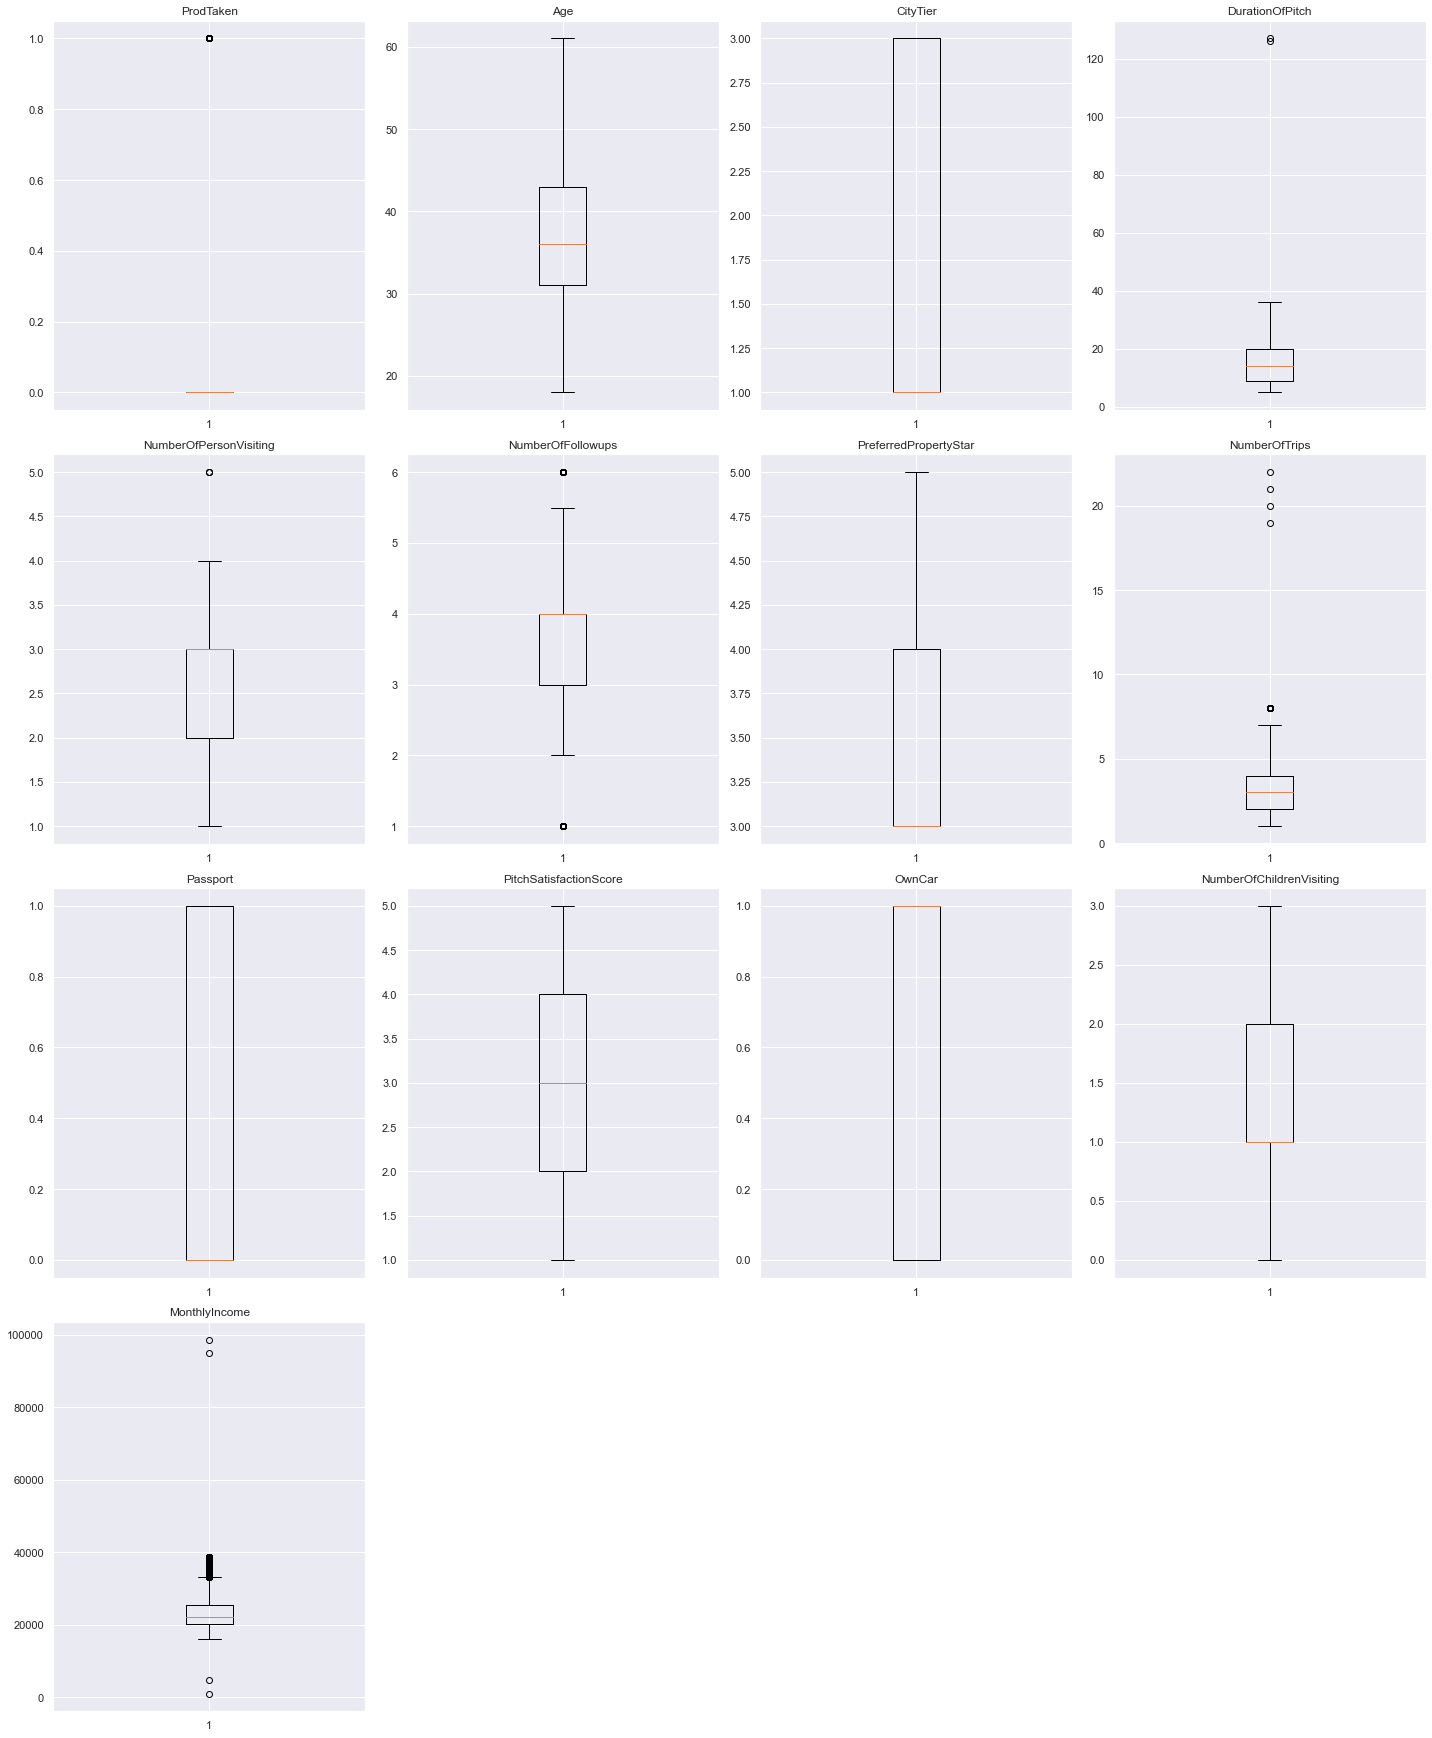

<IPython.core.display.Javascript object>

In [136]:
# Check outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(tourism_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [137]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [138]:
# Treat outliers
loan_data = treat_outliers_all(tourism_data, [
        
        "DurationOfPitch",
        "NumberOfTrips",
    ])



<IPython.core.display.Javascript object>

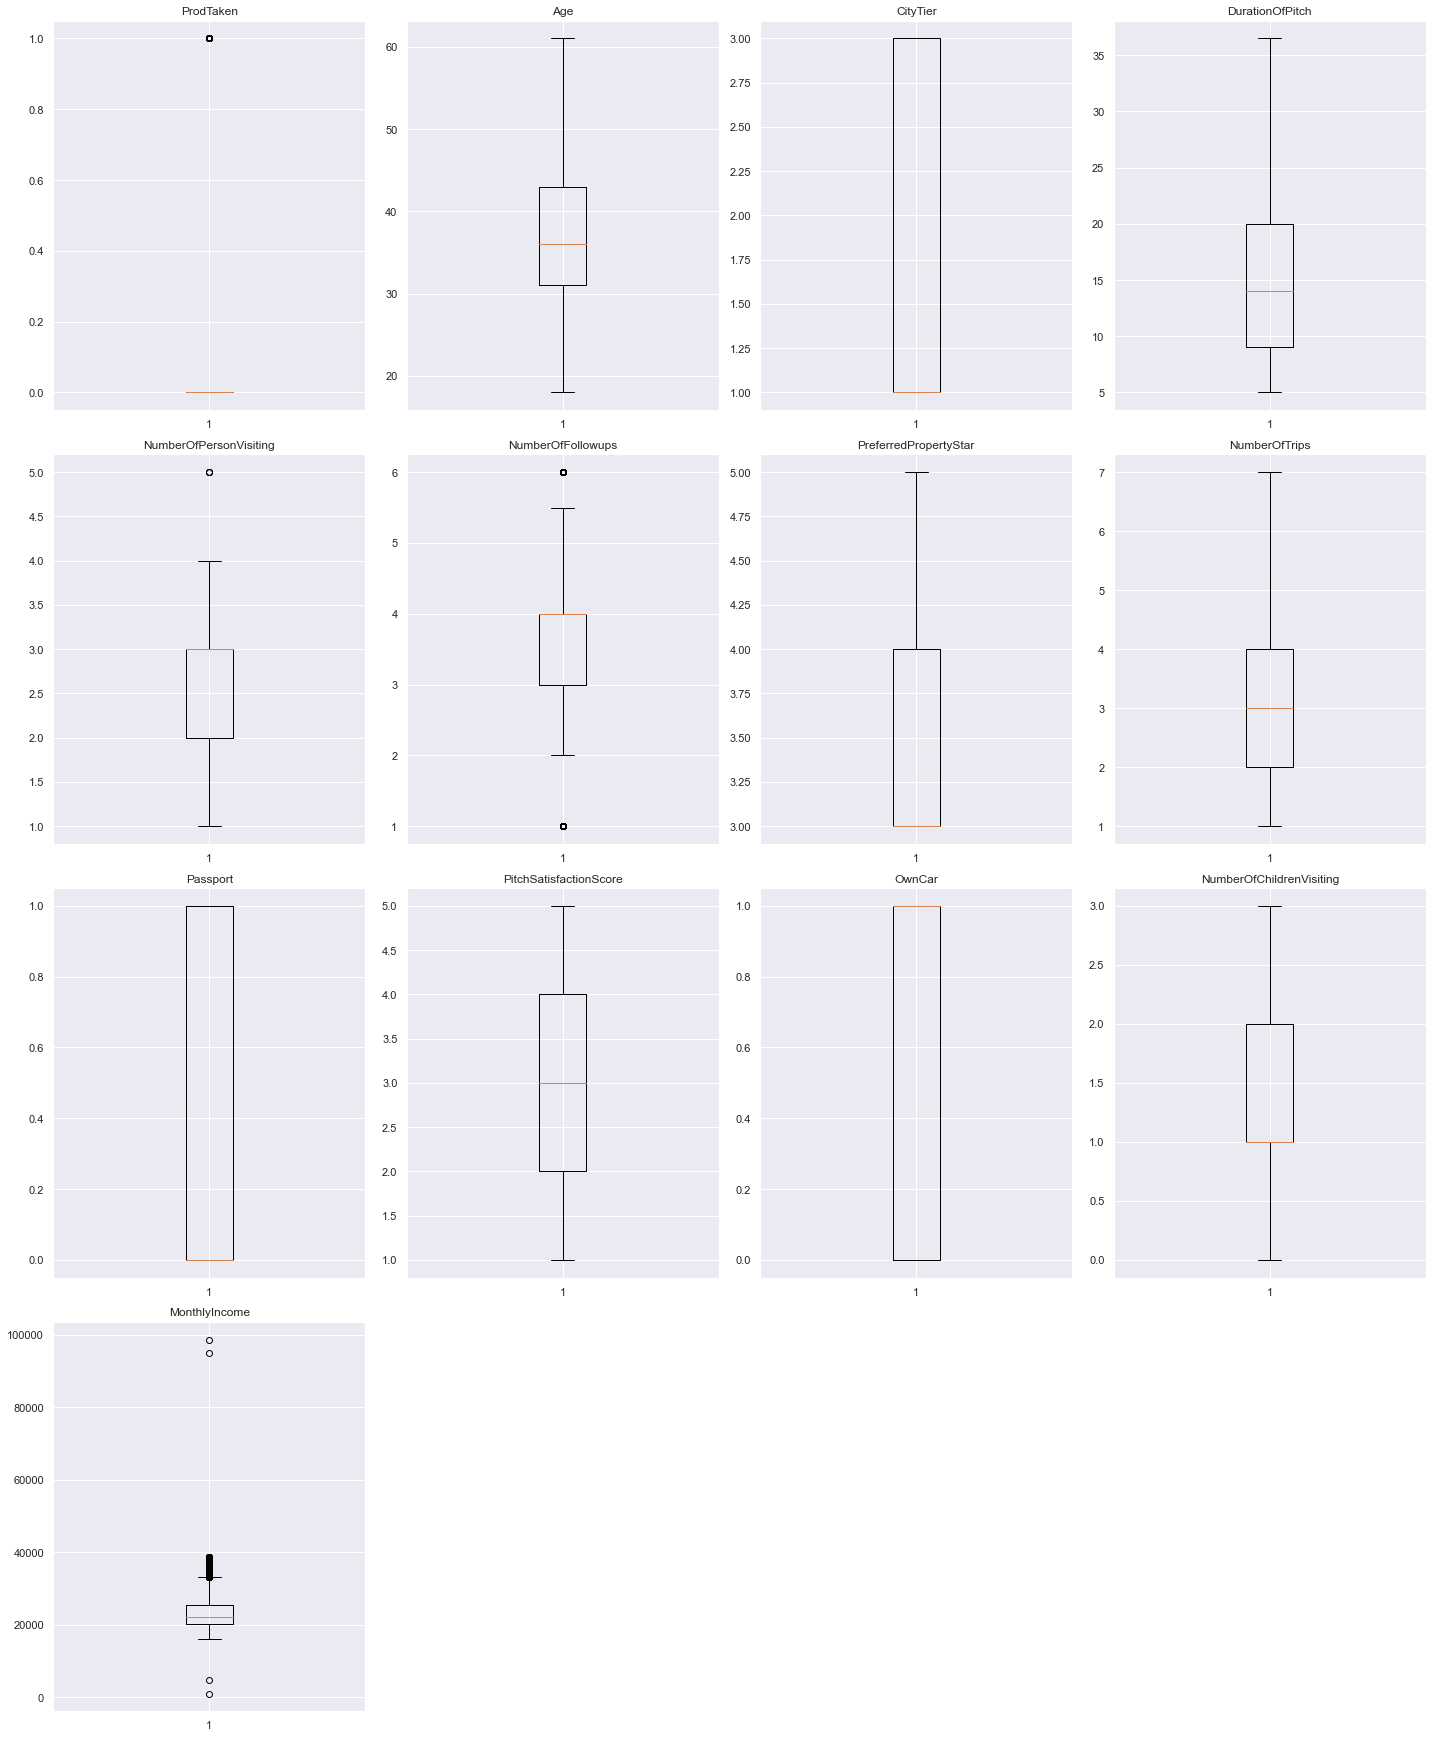

<IPython.core.display.Javascript object>

In [139]:
# Check outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### E. Data Preparation

In [140]:
tourism_data.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
Age_Bin                     category
DurationOfPitch_Bin         category
MonthlyIncome_Bin           category
dtype: object

<IPython.core.display.Javascript object>

#### F. Data Split - Training & Test

In [141]:
# Create X and Y data for independent and dependent variables respectively
X = tourism_data.drop(
    ["ProdTaken", "Age_Bin", "DurationOfPitch_Bin", "MonthlyIncome_Bin"], axis=1
)
X = pd.get_dummies(
    X,
    columns=[
        "TypeofContact",
        "Occupation",
        "Gender",
        "ProductPitched",
        "MaritalStatus",
        "Designation",
    ],
    drop_first=True,
)
Y = tourism_data["ProdTaken"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

#### G. Data Split Check

In [142]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format(
        (len(X_train) / len(tourism_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Test set".format(
        (len(X_test) / len(tourism_data.index)) * 100
    )
)

69.98% data is in Training set
30.02% data is in Test set


<IPython.core.display.Javascript object>

In [143]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3322, 28)
Shape of Test set :  (1425, 28)
Percentage of classes in training set:
0    0.811559
1    0.188441
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.81193
1    0.18807
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

In [144]:
# Check ProdTaken True/False ratio in split data

print(
    "Original Product Taken Values    : {0} ({1:0.2f}%)".format(
        len(tourism_data.loc[tourism_data["ProdTaken"] == 1]),
        (
            len(tourism_data.loc[tourism_data["ProdTaken"] == 1])
            / len(tourism_data.index)
        )
        * 100,
    )
)
print(
    "Original Product Not Taken Values   : {0} ({1:0.2f}%)".format(
        len(tourism_data.loc[tourism_data["ProdTaken"] == 0]),
        (
            len(tourism_data.loc[tourism_data["ProdTaken"] == 0])
            / len(tourism_data.index)
        )
        * 100,
    )
)
print("")
print(
    "Training Product Taken Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Product Not Taken Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Product Taken Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Product Not Taken Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Product Taken Values    : 894 (18.83%)
Original Product Not Taken Values   : 3853 (81.17%)

Training Product Taken Values    : 626 (18.84%)
Training Product Not Taken Values   : 2696 (81.16%)

Test Product Taken Values        : 268 (18.81%)
Test Product Not Taken Values       : 1157 (81.19%)



<IPython.core.display.Javascript object>

### 7. Model Building - Bagging

#### Confusion Matrix

Confusion Matrix is performance measure of models

**True Positives (TP):** we correctly predicted that customers will take product, and they did.

**True Negatives (TN):** we correctly predicted that customers will not take product, and they did not.

**False Positives (FP):** we correctly predicted that customers will take product, but, they did not (a "Type I error").

**False Negatives (FN):** we correctly predicted that customers will not take product, but, they did (a "Type II error").

In [145]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def make_confusion_matrix(model, predictors, target, text=None):
    """
    To plot the confusion_matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)

    cf_matrix = metrics.confusion_matrix(target, pred)

    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = [
        "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(8, 5))
    ax = sns.heatmap(
        cf_matrix,
        annot=labels,
        fmt="",
        cmap="Blues",
        linewidths=2,
        linecolor="black",
        # cbar=True,
    )

    ax.set_title("Confusion Matrix For " + text + " Data \n\n")
    ax.set_xlabel("\nPredicted Values")
    ax.set_ylabel("Actual Values ")

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(["False", "True"])
    ax.yaxis.set_ticklabels(["False", "True"])

    # plt.grid(b=None, axis="both", which="both", visible=True)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

<IPython.core.display.Javascript object>

In [146]:
def get_confusion_matrix(model):
    """
    To get confusion_matrix for both test and train

    model: classifier
    """
    make_confusion_matrix(model, X_train, y_train, "Train")
    print("\n")
    make_confusion_matrix(model, X_test, y_test, "Test")

<IPython.core.display.Javascript object>

In [147]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, F1 and ROC-AUC Score
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    # F1 Score of the model
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    # ROC-AUC Score of the model
    train_roc_auc = metrics.roc_auc_score(y_train, pred_train)
    test_roc_auc = metrics.roc_auc_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:

        display(
            pd.DataFrame(
                {
                    # "Score": ["Accuracy", "Recall", "Precision", "F1","ROC-AUC"],
                    "Training Score": [
                        train_acc,
                        train_recall,
                        train_precision,
                        train_f1,
                        train_roc_auc,
                    ],
                    "Testing Score": [
                        test_acc,
                        test_recall,
                        test_precision,
                        test_f1,
                        test_roc_auc,
                    ],
                },
                index=["Accuracy", "Recall", "Precision", "F1", "ROC-AUC"],
            )
        )

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

####  A. Build Bagging Classifier

In [148]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [149]:
# Use function to get accuracy, recall, precision and F1 on train and test set
bagging_estimator_score = get_metrics_score(bagging_estimator)

Training Score  Testing Score
Accuracy         0.994582       0.900351
Recall           0.971246       0.604478
Precision        1.000000       0.818182
F1               0.985413       0.695279
ROC-AUC          0.985623       0.786681

<IPython.core.display.Javascript object>

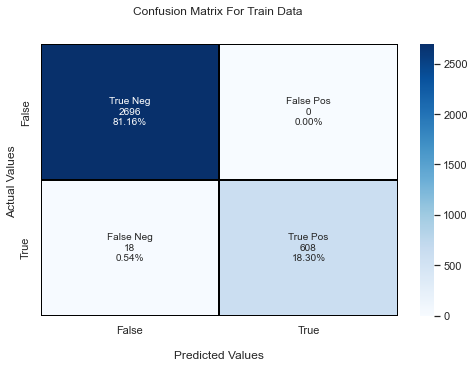

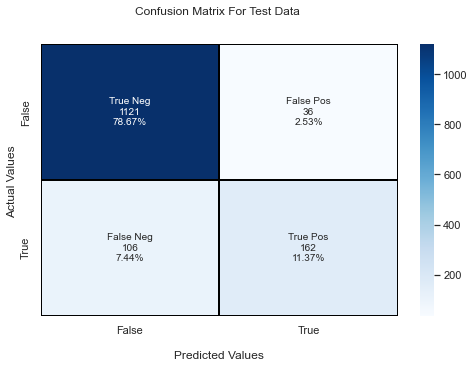

<IPython.core.display.Javascript object>

In [150]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(bagging_estimator)

#### Observation : 

1. Model performance need to be further improved.

####  B. Random Forest

In [151]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [152]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score = get_metrics_score(rf_estimator)

Training Score  Testing Score
Accuracy              1.0       0.902456
Recall                1.0       0.563433
Precision             1.0       0.872832
F1                    1.0       0.684807
ROC-AUC               1.0       0.772209

<IPython.core.display.Javascript object>

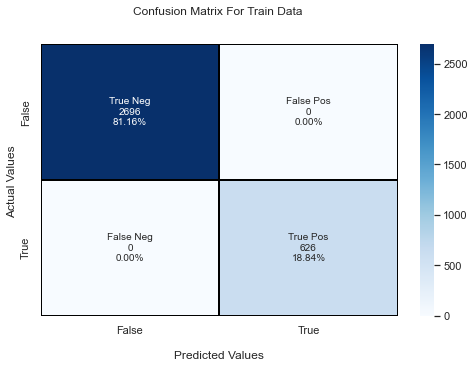

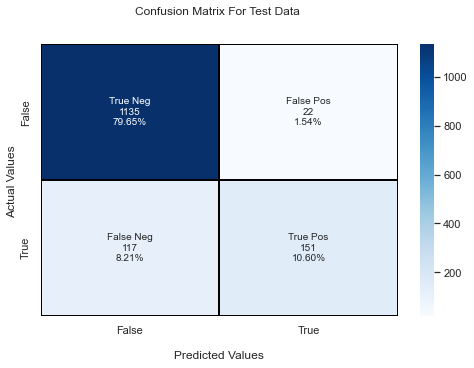

<IPython.core.display.Javascript object>

In [153]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(rf_estimator)

#### Observation : 

1. Model performance need to be further improved.

####  C. Decision Tree

In [154]:
dtree_estimator = DecisionTreeClassifier(random_state=1)
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [155]:
# Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_score = get_metrics_score(dtree_estimator)

Training Score  Testing Score
Accuracy              1.0       0.884211
Recall                1.0       0.701493
Precision             1.0       0.688645
F1                    1.0       0.695009
ROC-AUC               1.0       0.814013

<IPython.core.display.Javascript object>

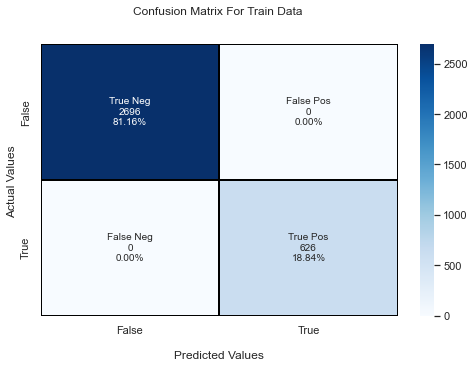

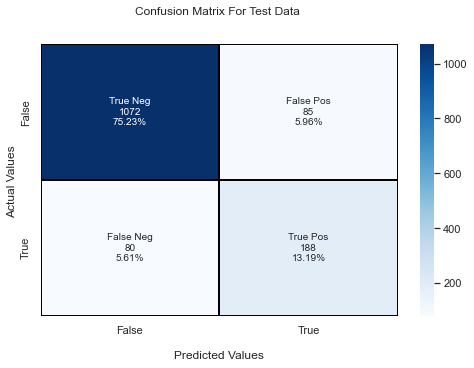

<IPython.core.display.Javascript object>

In [156]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(dtree_estimator)

#### Observation : 

1. Model performance need to be further improved.

### Bagging Model Performance Comparison

In [157]:
def model_performance_comparison(model_list, model_name_list):

    # defining empty lists to add train and test results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train = []
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []

    # looping through all the models to get the accuracy, precall, precision, f1 and ROC-AUC scores
    for model in model_list:
        j = get_metrics_score(model, False)
        acc_train.append(np.round(j[0], 2))
        acc_test.append(np.round(j[1], 2))
        recall_train.append(np.round(j[2], 2))
        recall_test.append(np.round(j[3], 2))
        precision_train.append(np.round(j[4], 2))
        precision_test.append(np.round(j[5], 2))
        f1_train.append(np.round(j[6], 2))
        f1_test.append(np.round(j[7], 2))
        roc_auc_train.append(np.round(j[8], 2))
        roc_auc_test.append(np.round(j[9], 2))

    display(
        pd.DataFrame(
            {
                "Model": model_name_list,
                "Train_Accuracy": acc_train,
                "Test_Accuracy": acc_test,
                "Train_Recall": recall_train,
                "Test_Recall": recall_test,
                "Train_Precision": precision_train,
                "Test_Precision": precision_test,
                "Train_F1": f1_train,
                "Test_F1": f1_test,
                "Train_ROC-AUC": roc_auc_train,
                "Test_ROC-AUC": roc_auc_test,
            }
        )
    )

<IPython.core.display.Javascript object>

In [158]:
model_performance_comparison(
    [bagging_estimator, rf_estimator, dtree_estimator],
    [
        "Bagging classifier with default parameters",
        "Random Forest with deafult parameters",
        "Decision Tree with deafult parameters",
    ],
)

Model  Train_Accuracy  Test_Accuracy  \
0  Bagging classifier with default parameters            0.99           0.90   
1       Random Forest with deafult parameters            1.00           0.90   
2       Decision Tree with deafult parameters            1.00           0.88   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0          0.97         0.60              1.0            0.82      0.99   
1          1.00         0.56              1.0            0.87      1.00   
2          1.00         0.70              1.0            0.69      1.00   

   Test_F1  Train_ROC-AUC  Test_ROC-AUC  
0     0.70           0.99          0.79  
1     0.68           1.00          0.77  
2     0.70           1.00          0.81

<IPython.core.display.Javascript object>

### 8. Model Performance Improvement - Bagging

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will take product but in reality the customer would not take product. - Loss of resources for marketing/sales and marketing/sales cost is higher.

2. Predicting a customer will not take product but in reality the customer would have taken product. - Loss of opportunity/revenue.

### Which case is more important? 

* Both cases are important as given below:

* If we predict a customer will take product but in reality the customer would not take product, then company will loose time spend on marketing/sales. Also, cost of marketing/sales will ho higher.

* If we predict a customer will not take product but in reality the customer would take product, then company will loose oppurtunity and revenue.


### How to reduce this loss i.e need to reduce False Negatives?

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

####  A. Tuning Bagging Classifier

In [159]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [10, 100, 1000],
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=1000,
                  random_state=1)

<IPython.core.display.Javascript object>

In [160]:
# Use function to get accuracy, recall, precision and F1 on train and test set
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

Training Score  Testing Score
Accuracy              1.0       0.910877
Recall                1.0       0.641791
Precision             1.0       0.847291
F1                    1.0       0.730361
ROC-AUC               1.0       0.807499

<IPython.core.display.Javascript object>

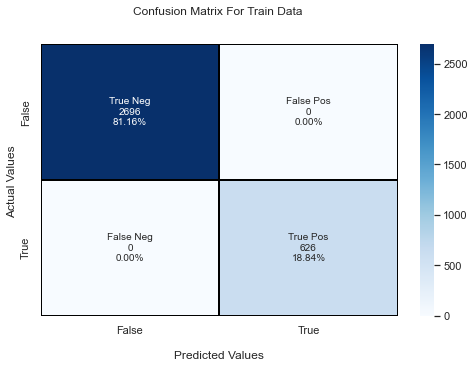

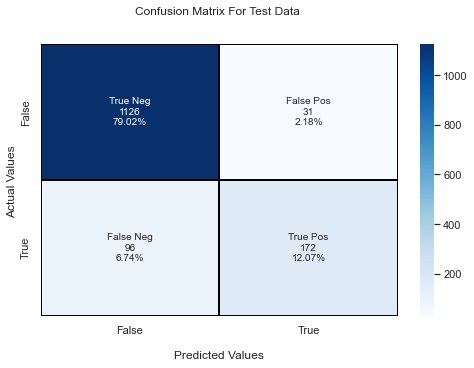

<IPython.core.display.Javascript object>

In [161]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(bagging_estimator_tuned)

#### Observation : 

1. Model performance is good. Need to check whether performance can be further improved.

####  B. Tuning Random Forest

In [162]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(
    class_weight={0: 0.2, 1: 0.8}, random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_features": np.arange(1, 20, 1),
    "n_estimators": [10, 100, 1000],
    # "max_samples": [0.7, 0.8, 0.9, 1],
    # "min_samples_leaf": np.arange(5, 10),
    # "max_samples": np.arange(0.7, 1, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=18,
                       random_state=1)

<IPython.core.display.Javascript object>

In [163]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

Training Score  Testing Score
Accuracy              1.0       0.910877
Recall                1.0       0.630597
Precision             1.0       0.857868
F1                    1.0       0.726882
ROC-AUC               1.0       0.803198

<IPython.core.display.Javascript object>

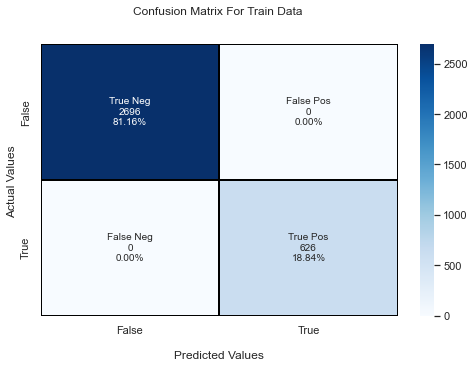

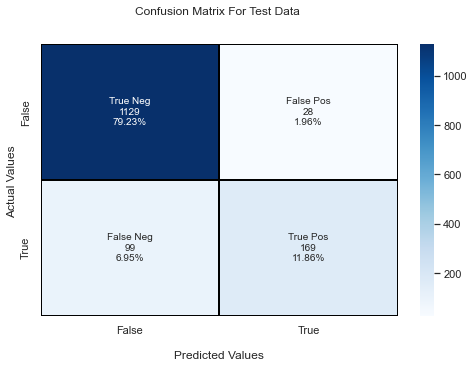

<IPython.core.display.Javascript object>

In [164]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(rf_estimator_tuned)

#### Observation : 

1. Model performance is good. Need to check whether performance can be further improved.

#### Feature Importance - Tuned Random Forest

In [165]:

def get_feature_imp_list(model):

    display(
        pd.DataFrame(
            model.feature_importances_,
            columns=["Feature Importance"],
            index=X_train.columns,
        ).sort_values(by="Feature Importance", ascending=False)
    )



<IPython.core.display.Javascript object>

In [166]:
def plot_feature_imp(model):

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(
        range(len(indices)),
        importances[indices],
        color="cornflowerblue",
        align="center",
    )
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

<IPython.core.display.Javascript object>

In [167]:
# importance of features in the Random Forest
get_feature_imp_list(rf_estimator_tuned)

Feature Importance
Age                                    0.125627
DurationOfPitch                        0.121416
MonthlyIncome                          0.121312
Passport                               0.095839
Designation_Executive                  0.057928
PitchSatisfactionScore                 0.053812
NumberOfTrips                          0.053421
NumberOfFollowups                      0.052671
CityTier                               0.047551
PreferredPropertyStar                  0.044681
MaritalStatus_Single                   0.024504
NumberOfChildrenVisiting               0.019272
MaritalStatus_Married                  0.018836
NumberOfPersonVisiting                 0.018116
Occupation_Large Business              0.018087
Gender_Male                            0.017204
TypeofContact_Self Enquiry             0.017117
MaritalStatus_Unmarried                0.013459
Occupation_Salaried                    0.012845
Occupation_Small Business              0.012097
OwnCar                                 0.011722
Designation_Manager                    0.010189
ProductPitched_Deluxe                  0.009082
Designation_Senior Manager             0.007537
ProductPitched_Standard                0.006972
ProductPitched_Super Deluxe            0.006112
ProductPitched_King                    0.001411
Designation_VP                         0.001181

<IPython.core.display.Javascript object>

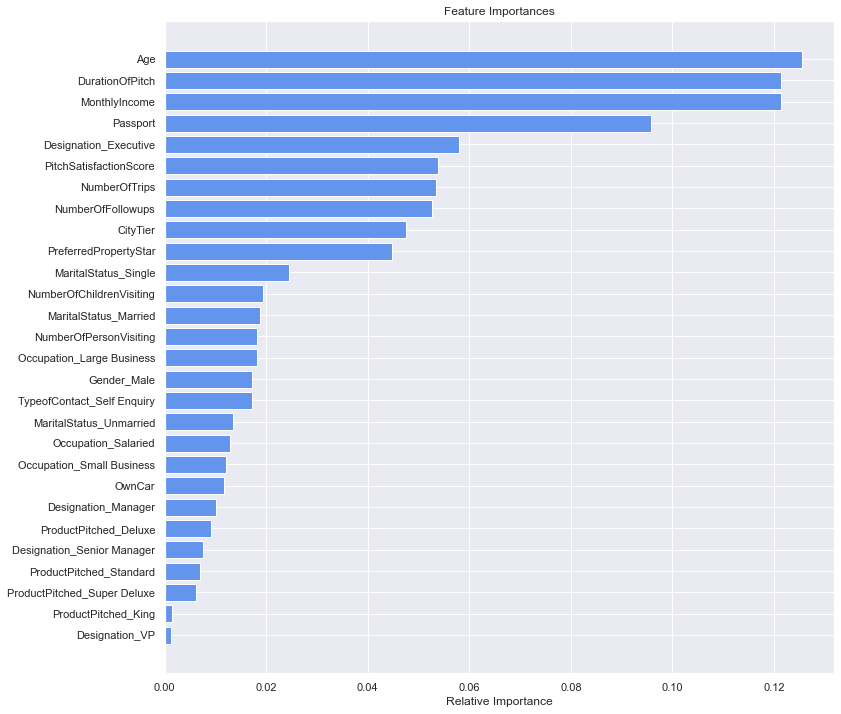

<IPython.core.display.Javascript object>

In [168]:
# plot of features in the Random Forest
plot_feature_imp(rf_estimator_tuned)


#### Observation : 

1. Model performance is good. Need to check whether performance can be further improved.

####  C. Tuning Decision Tree

In [169]:
# Choose the type of classifier.
dtree_estimator_tuned = DecisionTreeClassifier(
    class_weight={0: 0.2, 1: 0.8}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    # "criterion": ["entropy", "gini"],
    # "splitter": ["best", "random"],
    "max_depth": np.arange(1, 20),
    "max_features": np.arange(1, 20, 1),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    # "max_leaf_nodes": [2, 3, 5, 10, 15],
    # "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
    # "min_samples_split": np.arange(1, 20, 1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=16,
                       max_features=19, random_state=1)

<IPython.core.display.Javascript object>

In [170]:
# Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_tuned_score = get_metrics_score(dtree_estimator_tuned)

Training Score  Testing Score
Accuracy         0.992775       0.880702
Recall           0.993610       0.675373
Precision        0.968847       0.685606
F1               0.981073       0.680451
ROC-AUC          0.993096       0.801818

<IPython.core.display.Javascript object>

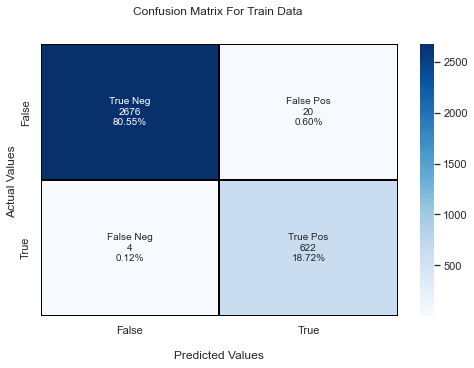

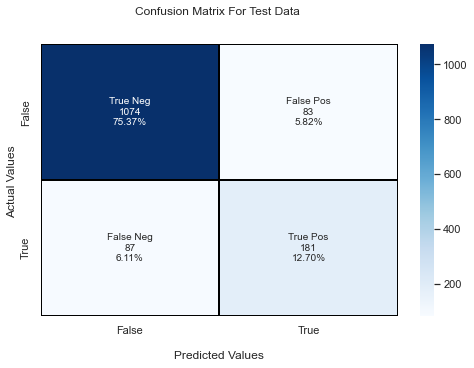

<IPython.core.display.Javascript object>

In [171]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(dtree_estimator_tuned)

In [172]:
# importance of features in the Random Forest
get_feature_imp_list(dtree_estimator_tuned)

Feature Importance
DurationOfPitch                    1.318478e-01
Age                                1.293831e-01
MonthlyIncome                      1.172692e-01
Passport                           9.792915e-02
Designation_Executive              6.916610e-02
NumberOfTrips                      6.388065e-02
PitchSatisfactionScore             5.705024e-02
NumberOfFollowups                  5.513208e-02
CityTier                           4.184941e-02
PreferredPropertyStar              3.437279e-02
MaritalStatus_Unmarried            2.463488e-02
NumberOfPersonVisiting             1.798651e-02
MaritalStatus_Married              1.789305e-02
MaritalStatus_Single               1.777797e-02
Occupation_Large Business          1.755011e-02
TypeofContact_Self Enquiry         1.754329e-02
Occupation_Salaried                1.728948e-02
Designation_Senior Manager         1.423008e-02
Gender_Male                        1.322349e-02
Designation_Manager                9.560897e-03
Occupation_Small Business          9.537288e-03
ProductPitched_Deluxe              9.440766e-03
OwnCar                             8.006331e-03
NumberOfChildrenVisiting           6.541726e-03
ProductPitched_Super Deluxe        9.035591e-04
ProductPitched_King                7.294080e-17
Designation_VP                     1.500696e-17
ProductPitched_Standard            0.000000e+00

<IPython.core.display.Javascript object>

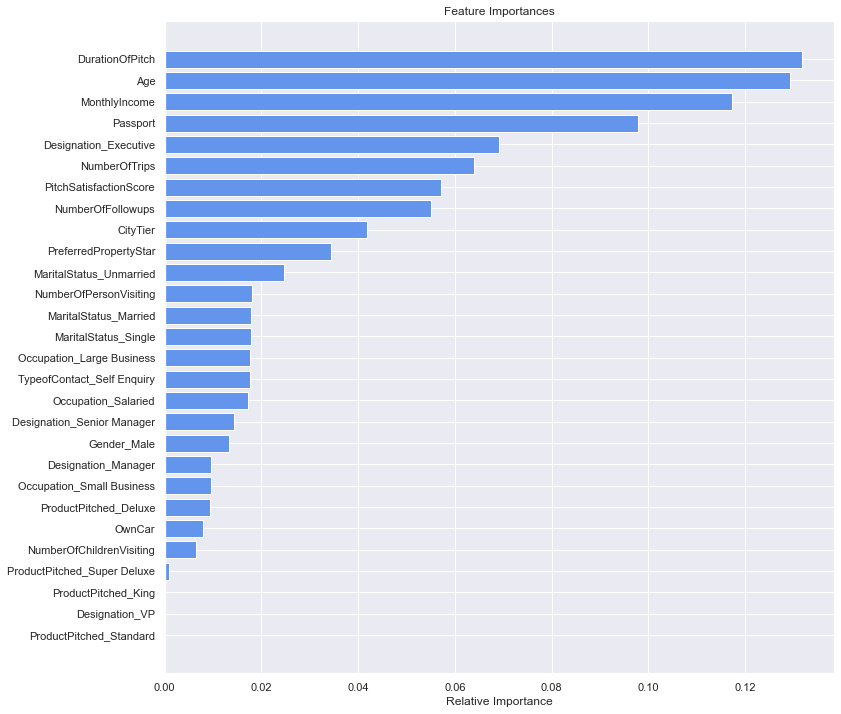

<IPython.core.display.Javascript object>

In [173]:
plot_feature_imp(dtree_estimator_tuned)

#### Observation : 

1. Model performance is good. Need to check whether performance can be further improved.

### Tuned Bagging Model Performance Comparison

In [174]:
model_performance_comparison(
    [bagging_estimator_tuned, rf_estimator_tuned, dtree_estimator_tuned],
    ["Tuned Bagging classifier", "Tuned Random Forest", "Tuned Decision Tree",],
)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Tuned Bagging classifier            1.00           0.91          1.00   
1       Tuned Random Forest            1.00           0.91          1.00   
2       Tuned Decision Tree            0.99           0.88          0.99   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  \
0         0.64             1.00            0.85      1.00     0.73   
1         0.63             1.00            0.86      1.00     0.73   
2         0.68             0.97            0.69      0.98     0.68   

   Train_ROC-AUC  Test_ROC-AUC  
0           1.00          0.81  
1           1.00          0.80  
2           0.99          0.80

<IPython.core.display.Javascript object>

### 9. Model Building - Boosting

####  A. Build Adaboost

In [175]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [176]:
# Using above defined function to get accuracy, recall and precision on train and test set
abc_score = get_metrics_score(abc)

Training Score  Testing Score
Accuracy         0.851896       0.842105
Recall           0.337061       0.305970
Precision        0.732639       0.677686
F1               0.461707       0.421594
ROC-AUC          0.654250       0.636131

<IPython.core.display.Javascript object>

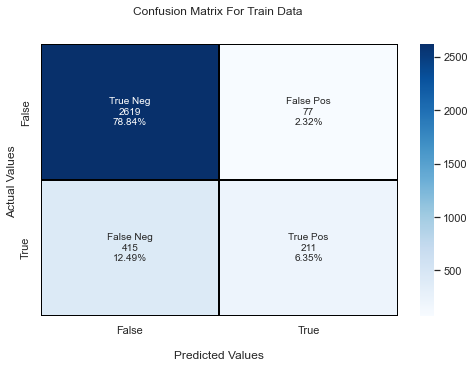

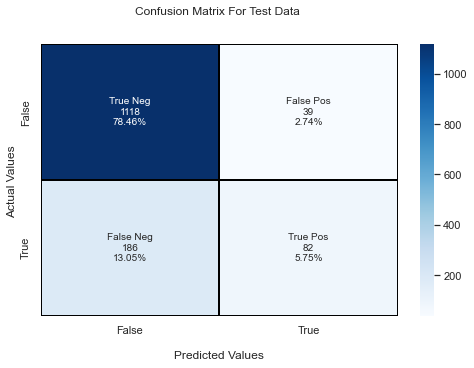

<IPython.core.display.Javascript object>

In [177]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(abc)

#### Observation : 

1. Model performance need to be further improved.

####  B. Build GradientBoost

In [178]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [179]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
gbc_score = get_metrics_score(gbc)

Training Score  Testing Score
Accuracy         0.891933       0.856842
Recall           0.496805       0.395522
Precision        0.876056       0.716216
F1               0.634047       0.509615
ROC-AUC          0.740242       0.679611

<IPython.core.display.Javascript object>

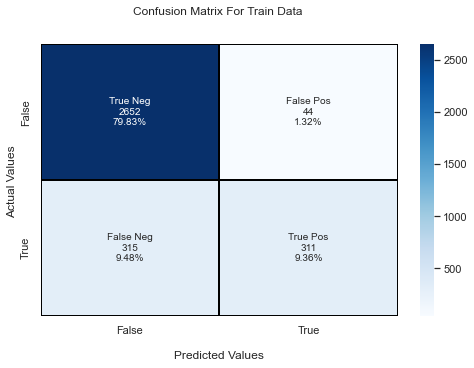

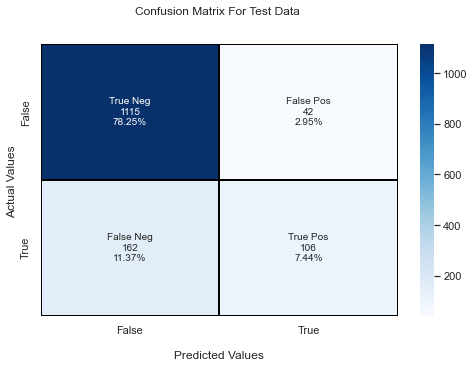

<IPython.core.display.Javascript object>

In [180]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(gbc)

#### Observation : 

1. Model performance need to be further improved.

####  C. Build XGBoost

In [181]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [182]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
xgb_score = get_metrics_score(xgb)

Training Score  Testing Score
Accuracy              1.0       0.918596
Recall                1.0       0.694030
Precision             1.0       0.845455
F1                    1.0       0.762295
ROC-AUC               1.0       0.832322

<IPython.core.display.Javascript object>

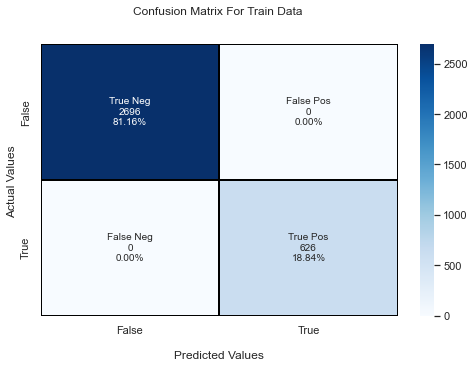

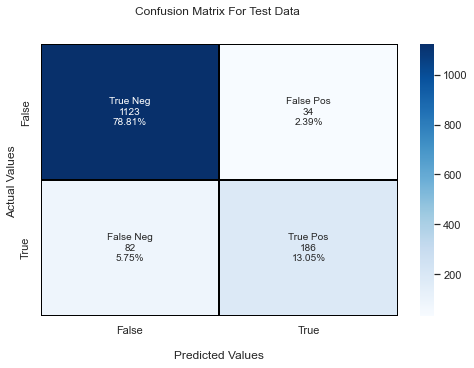

<IPython.core.display.Javascript object>

In [183]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(xgb)

#### Observation : 

1. Model performance is good. Need to check whether it can be further improved.

####  D. Build Stacking Classifier

In [184]:
estimators = [
    ("Bagging Classifier", bagging_estimator_tuned),
    ("Random Forest", rf_estimator_tuned),
    ("Gradient Boosting", gbc),
]

final_estimator = XGBClassifier(random_state=1, eval_metric="logloss")



<IPython.core.display.Javascript object>

In [185]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.8,
                                                  n_estimators=1000,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_features=18,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=No...
                                                 interaction_constraints=None,
                        

<IPython.core.display.Javascript object>

In [186]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
stacking_estimator_score = get_metrics_score(stacking_estimator)

Training Score  Testing Score
Accuracy         0.995786       0.913684
Recall           0.985623       0.742537
Precision        0.991961       0.786561
F1               0.988782       0.763916
ROC-AUC          0.991884       0.847932

<IPython.core.display.Javascript object>

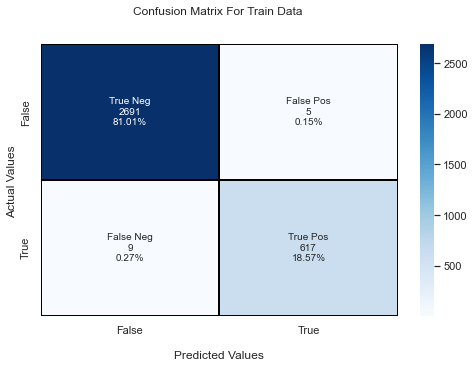

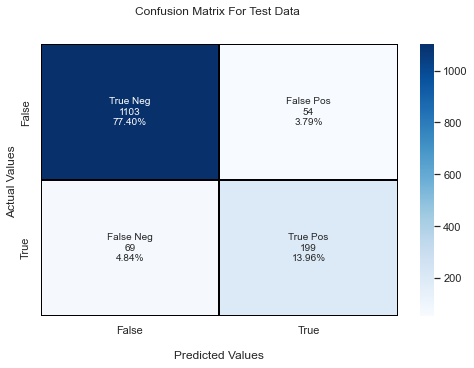

<IPython.core.display.Javascript object>

In [187]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(stacking_estimator)

#### Observation : 

1. Model performance is good. Need to check whether it can be further improved.

### Boosting Model Performance Comparison

In [188]:
model_performance_comparison(
    [abc, gbc, xgb, stacking_estimator],
    [
        "AdaBoost Classifier",
        "GradientBoost Classifier",
        "XGBoost Classifier",
        "Stacking Classifier",
    ],
)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0       AdaBoost Classifier            0.85           0.84          0.34   
1  GradientBoost Classifier            0.89           0.86          0.50   
2        XGBoost Classifier            1.00           0.92          1.00   
3       Stacking Classifier            1.00           0.91          0.99   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  \
0         0.31             0.73            0.68      0.46     0.42   
1         0.40             0.88            0.72      0.63     0.51   
2         0.69             1.00            0.85      1.00     0.76   
3         0.74             0.99            0.79      0.99     0.76   

   Train_ROC-AUC  Test_ROC-AUC  
0           0.65          0.64  
1           0.74          0.68  
2           1.00          0.83  
3           0.99          0.85

<IPython.core.display.Javascript object>

### 10. Model Performance Improvement - Boosting

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will take product but in reality the customer would not take product. - Loss of resources for marketing/sales

2. Predicting a customer will not take product but in reality the customer would have taken product. - Loss of opportunity/revenue

### Which case is more important? 

* Both cases are important as given below:

* If we predict a customer will take product but in reality the customer would not take product, then company will loose time spend on marketing/sales.

* If we predict a customer will not take product but in reality the customer would take product, then company will loose oppurtunity and revenue.


### How to reduce this loss i.e need to reduce False Negatives?

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

####  A. Tuning AdaBoost

In [189]:
# Choose the type of classifier.
# abc_tuned = AdaBoostClassifier(random_state=1)
abc_tuned = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(
        class_weight={0: 0.2, 1: 0.8}, max_depth=16, max_features=19, random_state=1
    ),
)


# Grid of parameters to choose from
## add from article

parameters = {
    # Let's try different max_depth for base_estimator
    "learning_rate": np.arange(0.1, 2, 0.1),
    # "max_samples": [0.7, 0.8, 0.9, 1],
    # "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 100, 1000],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                       1: 0.8},
                                                         max_depth=16,
                                                         max_features=19,
                                                         random_state=1),
                   learning_rate=1.9000000000000001, n_estimators=1000,
                   random_state=1)

<IPython.core.display.Javascript object>

In [190]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
abc_tuned_score = get_metrics_score(abc_tuned)

Training Score  Testing Score
Accuracy              1.0       0.916491
Recall                1.0       0.630597
Precision             1.0       0.894180
F1                    1.0       0.739606
ROC-AUC               1.0       0.806655

<IPython.core.display.Javascript object>

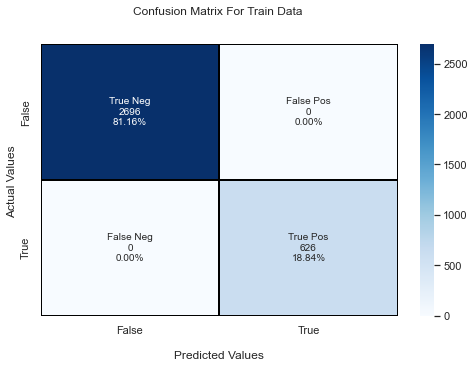

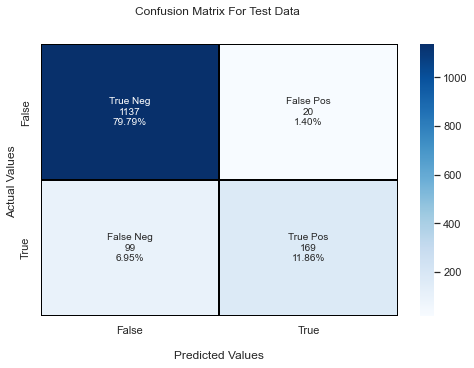

<IPython.core.display.Javascript object>

In [191]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(abc_tuned)

In [192]:
# importance of features in the Random Forest
get_feature_imp_list(abc_tuned)

Feature Importance
MaritalStatus_Unmarried                0.021717
Age                                         NaN
CityTier                                    NaN
DurationOfPitch                             NaN
NumberOfPersonVisiting                      NaN
NumberOfFollowups                           NaN
PreferredPropertyStar                       NaN
NumberOfTrips                               NaN
Passport                                    NaN
PitchSatisfactionScore                      NaN
OwnCar                                      NaN
NumberOfChildrenVisiting                    NaN
MonthlyIncome                               NaN
TypeofContact_Self Enquiry                  NaN
Occupation_Large Business                   NaN
Occupation_Salaried                         NaN
Occupation_Small Business                   NaN
Gender_Male                                 NaN
ProductPitched_Deluxe                       NaN
ProductPitched_King                         NaN
ProductPitched_Standard                     NaN
ProductPitched_Super Deluxe                 NaN
MaritalStatus_Married                       NaN
MaritalStatus_Single                        NaN
Designation_Executive                       NaN
Designation_Manager                         NaN
Designation_Senior Manager                  NaN
Designation_VP                              NaN

<IPython.core.display.Javascript object>

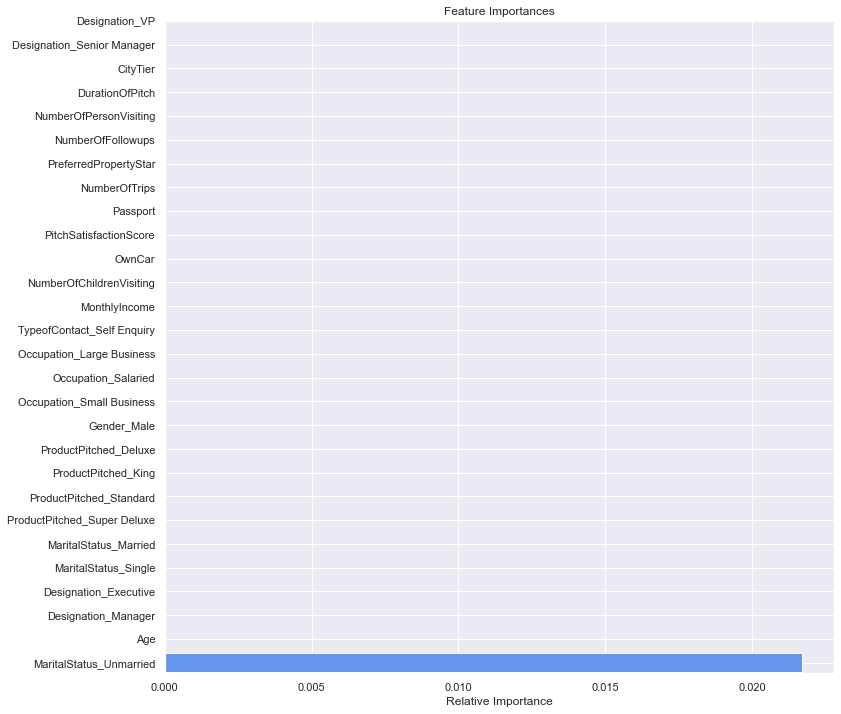

<IPython.core.display.Javascript object>

In [193]:
# plot of features in the Random Forest
plot_feature_imp(abc_tuned)


#### Observation : 

1. Model performance is good. Need to check whether it can be further improved.


####  B. Tuning GradientBoost

In [194]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [10, 100, 1000],
    # "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [5, 10, 15, 20],
    # "learning_rate": [0.01, 0.1, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), max_depth=5,
                           max_features=0.7, n_estimators=1000, random_state=1)

<IPython.core.display.Javascript object>

In [195]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
gbc_tuned_score = get_metrics_score(gbc_tuned)

Training Score  Testing Score
Accuracy              1.0       0.928421
Recall                1.0       0.750000
Precision             1.0       0.851695
F1                    1.0       0.797619
ROC-AUC               1.0       0.859875

<IPython.core.display.Javascript object>

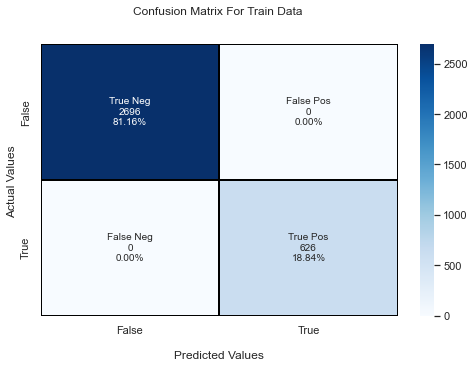

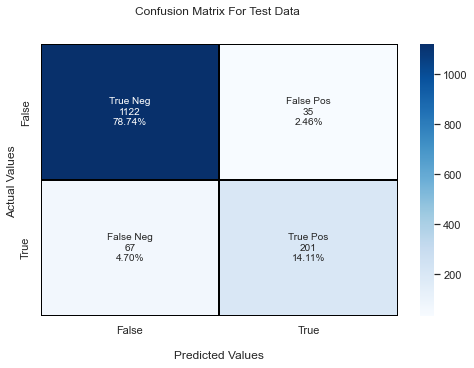

<IPython.core.display.Javascript object>

In [196]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(gbc_tuned)

In [197]:
# importance of features in the Random Forest
get_feature_imp_list(gbc_tuned)

Feature Importance
MonthlyIncome                          0.177590
Age                                    0.125374
DurationOfPitch                        0.113897
Passport                               0.098484
Designation_Executive                  0.064855
NumberOfTrips                          0.054681
NumberOfFollowups                      0.052207
PitchSatisfactionScore                 0.047599
CityTier                               0.042257
PreferredPropertyStar                  0.031048
MaritalStatus_Single                   0.030676
Occupation_Large Business              0.018957
MaritalStatus_Unmarried                0.017395
Gender_Male                            0.016693
NumberOfPersonVisiting                 0.016133
Occupation_Small Business              0.010908
ProductPitched_Deluxe                  0.010533
MaritalStatus_Married                  0.009960
TypeofContact_Self Enquiry             0.009385
Occupation_Salaried                    0.008653
Designation_Senior Manager             0.008412
NumberOfChildrenVisiting               0.007819
Designation_Manager                    0.006940
OwnCar                                 0.006360
ProductPitched_Standard                0.005950
ProductPitched_Super Deluxe            0.004132
Designation_VP                         0.002552
ProductPitched_King                    0.000546

<IPython.core.display.Javascript object>

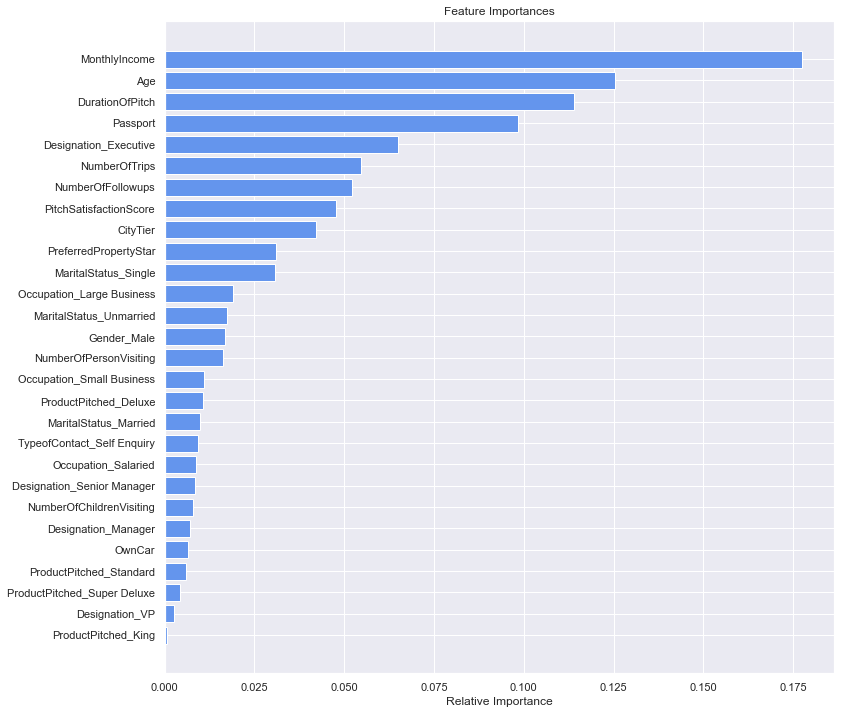

<IPython.core.display.Javascript object>

In [198]:
# plot of features in the Random Forest
plot_feature_imp(gbc_tuned)


#### Observation : 

1. Model performance is good. Need to check whether it can be further improved.

####  C. Tuning XGBoost

In [199]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
## add from

parameters = {
    "max_depth": [3, 6, 10],
    "learning_rate": [0.001, 0.01, 0.1, 0.3, 0.5],
    "n_estimators": [100, 500, 1000],
    # "colsample_bytree": [0.3, 0.7, 0.9, 1],
    # "scale_pos_weight": [0, 1, 2, 5],
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [200]:
# Using above defined function to get accuracy, recall, precision and f1 on train and test set
xgb_tuned_score = get_metrics_score(xgb_tuned)

Training Score  Testing Score
Accuracy              1.0       0.926316
Recall                1.0       0.742537
Precision             1.0       0.846809
F1                    1.0       0.791252
ROC-AUC               1.0       0.855711

<IPython.core.display.Javascript object>

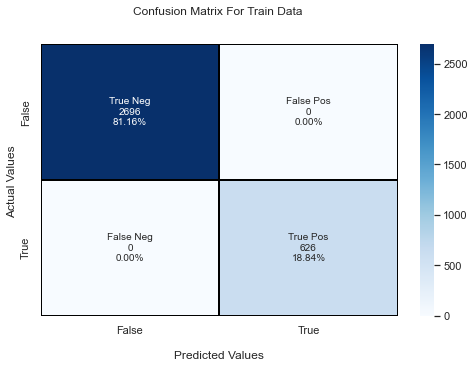

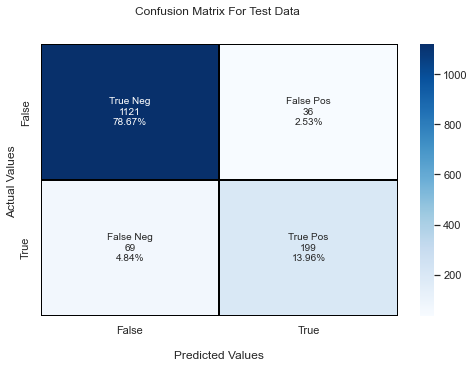

<IPython.core.display.Javascript object>

In [201]:
# Use function to get confusion matrix on train and test set
get_confusion_matrix(xgb_tuned)

In [202]:
# importance of features in the Random Forest
get_feature_imp_list(xgb_tuned)

Feature Importance
Designation_Executive                  0.118610
Passport                               0.086280
Occupation_Large Business              0.080327
ProductPitched_Super Deluxe            0.070000
MaritalStatus_Single                   0.058938
MaritalStatus_Unmarried                0.052146
CityTier                               0.043372
NumberOfFollowups                      0.039078
ProductPitched_Deluxe                  0.035277
TypeofContact_Self Enquiry             0.034990
NumberOfTrips                          0.032669
MaritalStatus_Married                  0.032660
ProductPitched_Standard                0.032381
PreferredPropertyStar                  0.031729
Age                                    0.031283
ProductPitched_King                    0.029820
DurationOfPitch                        0.027996
PitchSatisfactionScore                 0.027462
Occupation_Small Business              0.023869
Gender_Male                            0.022264
NumberOfPersonVisiting                 0.021971
OwnCar                                 0.018859
Occupation_Salaried                    0.016472
MonthlyIncome                          0.016203
NumberOfChildrenVisiting               0.015343
Designation_Manager                    0.000000
Designation_Senior Manager             0.000000
Designation_VP                         0.000000

<IPython.core.display.Javascript object>

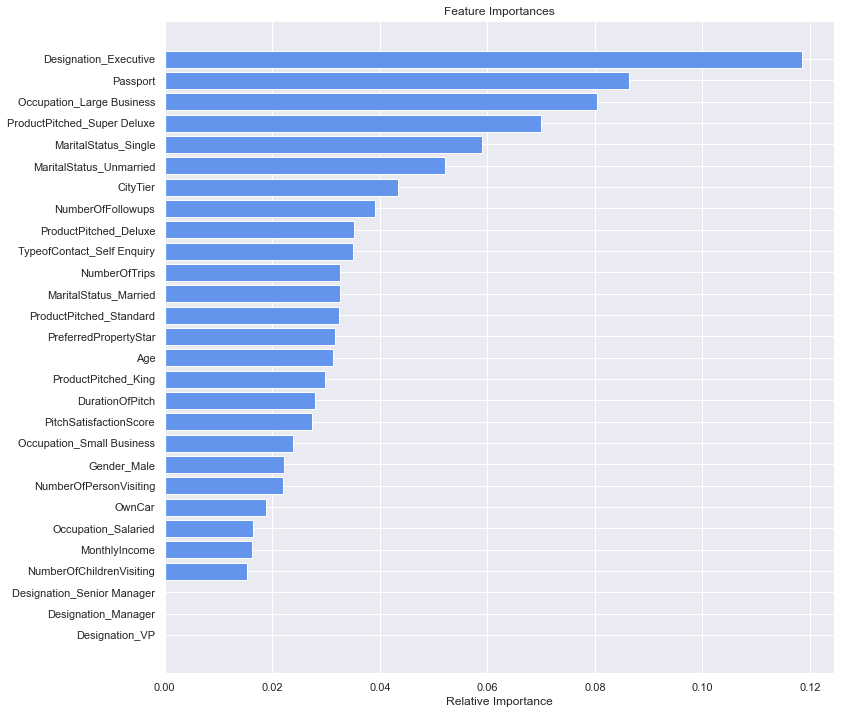

<IPython.core.display.Javascript object>

In [203]:
# plot of features in the Random Forest
plot_feature_imp(xgb_tuned)


#### Observation : 

1. Model performance is good.

### Tuned Boosting Model Performance Comparison

In [204]:
model_performance_comparison(
    [abc_tuned, gbc_tuned, xgb_tuned],
    [
        "Tuned AdaBoost Classifier",
        "Tuned GradientBoost Classifier",
        "Tuned XGBoost Classifier",
    ],
)

Model  Train_Accuracy  Test_Accuracy  \
0       Tuned AdaBoost Classifier             1.0           0.92   
1  Tuned GradientBoost Classifier             1.0           0.93   
2        Tuned XGBoost Classifier             1.0           0.93   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0           1.0         0.63              1.0            0.89       1.0   
1           1.0         0.75              1.0            0.85       1.0   
2           1.0         0.74              1.0            0.85       1.0   

   Test_F1  Train_ROC-AUC  Test_ROC-AUC  
0     0.74            1.0          0.81  
1     0.80            1.0          0.86  
2     0.79            1.0          0.86

<IPython.core.display.Javascript object>

### 10. Insights Based On EDA

### Data Description:

* There are 4888 rows and 19 columns
* There are null values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome". Missing value treatment is required for these columns
* **The target variable is "ProdTaken." It does not have null values**
* Column "Age" is in years and is a continous variable
* Columns "TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus" and "Designation" are strings and categorical variable. They can be typecast as Categorical. OneHotEncoding can be applied on these columns.
* Columns "CityTier", "NumberOfPersonVisiting", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "PitchSatisfactionScore" and "NumberOfChildrenVisiting" are sequential numbers
* Column "DurationOfPitch" is probably in minutes and is a continous variable
* Columns "Passport" and "OwnCar" are numbers and has only two values - 0 & 1

### Data Cleaning:

* There are missing values in columns "Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome"
* Columns "Age", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "NumberOfChildrenVisiting" and "MonthlyIncome" are numeric. So missing values in these columns can be imputed with median value
* Columns "TypeofContact" is categoric. So missing values in these columns can be imputed with mode value
* In column "Age", there are three values "Male", "Female" and "Fe Male". However, "Fe Male" looks like a mistake of "Female". Need to correct this data


### Insights on each columns are listed below:

#### Customer details:

**1. CustomerID (Unique customer ID) :** This feature was unique. So made this index column.

**2. ProdTaken (Whether the customer has purchased a package or not (0: No, 1: Yes) :** This feature is the target variable. It is a numerical column. But, it has only two values "0" and "1" meaning "No" and "Yes" respectively. It denotes whether customer took travel package or not. **Most of customers did not purchase travel package (81.2%). Objective is to get more customers to purchase travel package.**

**3. Age (Age of customer) :** This feature has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 37.622265 and 36 respectively. There are missing values and treatment is required. Most of the customers fall under age range 31 to 35, followed by 36-40 and  26-30. Customers of younger age doesn't purchase travel packages. Probably because they dont have any job yet and so no money. Customers of older age also doesn't purchase travel packages. Probably because they dont have good health to travel.

**4. TypeofContact (How customer was contacted (Company Invited or Self Inquiry)) :** This feature is a categorical variable. There are only two values "Self Enquiry" and "Company Invited". Most of the customers were contacted by "Self Enquiry" (70.5%) compared to "Company Invited" (29.0%). There are missing values. Since this is a categorical variable, mode ("Self Enquiry") must be used to treat missing values.

**5. CityTier (City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3) :** This feature is a numerical column. But, it has only three values 1,2 and 3 Its value depends on the development of a city, population, facilities, and living standards. Tier 1 cities are more (65.3%) followed by Tier 3 (30.7%) and Tier 2 (4.1%).There are no missing values.

**6. Occupation (Occupation of customer) :** This feature is a categorical variable. There are only four values "Salaried", "Small Business", "Large Business" and "Free Lancer". Most of the customers were "Salaried" (48.4%) followed by "Small Business" (42.6%), "Large Business" (8.9%) and "Free Lancer" (0.0%). There are no missing values.

**7. Gender (Gender of customer) :** This feature is a categorical variable. There are three values "Male", "Female" and "Fe Male". **However, "Fe Male" looks like a mistake of "Female". Need to correct this data.**
Most of the customers were "Male" (59.7%) followed by "Female" (37.2%) and "Fe Male" (3.2%). There are no missing values.

**8. NumberOfPersonVisiting (Total number of persons planning to take the trip with the customer) :** This feature is a numerical column. But, it has only five values 1,2,3,4 and 5. Most of the customers had "3" persons travelling with them (49.1%) followed by "2" (29.0%), "4" (21.0%), "1" (0.8%) and "5" (0.1%). There are no missing values

**9. PreferredPropertyStar (Preferred hotel property rating by customer) :** This feature is a numerical column. But, it has only three values 3,4 and 5. Most of the customers preferred hotels with stars "3" (61.2%) followed by "5" (19.6%), and "4" (18.7%). There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values.

**10. MaritalStatus (Marital status of customer) :** This feature is a categorical column. It has four values "Married", "Divorced", "Single" and "Unmarried". Most of the customers were "Married" (47.9%) followed by "Divorced" (19.4%), "Single" (18.7%) and "Unmarried" (14.0%). There are no missing values

**11. NumberOfTrips (Average number of trips in a year by customer) :** This feature is a numerical column. But, it has limited values. Most of the customers took number of trips "2" (30%) followed by "3" (22.1%), and "1" (12.7%). There are outliers which looks extreme values and requires treatment. There are missing values. Since this is a numerical variable, median ("3") can be used to treat missing values.

**12. Passport (The customer has a passport or not (0: No, 1: Yes)) :** This feature is a categorical column. It has two values "0" and "1" which means "No" and "Yes" respectively. Most of the customers did not had Passport (70.9%). There are no missing values.

**13. OwnCar (Whether the customers own a car or not (0: No, 1: Yes)) :** This feature is a categorical column. It has two values "0" and "1" which means "No" and "Yes". Most of the customers owned a car (62.0%). There are no missing values.

**14. NumberOfChildrenVisiting (Total number of children with age less than 5 planning to take the trip with the customer) :** This feature is a numerical column. But, it has only four values 0,1,2 and 3. Most of the customers had number of children "1" (42.6%), followed by "2" (27.3%), "0" (22.1%) and "3" (6.6%). There are missing values. Since this is a numerical variable, median ("1") value can be used to treat missing values.

**15. Designation (Designation of the customer in the current organization) :** This feature is a categorical column. It has five values "Executive", "Manager", "Senior Manager", "AVP" and "VP". Most of the customers were "Executive" (37.7%), followed by "Manager" (35.4%), "Senior Manager" (15.2%), "AVP" (7.0%) and "VP" (4.7%). There are no missing values.

**16. MonthlyIncome (Gross monthly income of the customer) :** This feature has normal distribution with outliers. However, outlier treatment is not required because outlier values looks genuine. Mean and Median are almost same with values as 23619.853491 and 22347 respectively. There are missing values and treatment is required. Most of the customers (almost 50%) has monthly income in range 20001 to 25000, followed by 15001 to 20000, 25001 to 30000. Only very few customers has monthly income less than 5000 and above 40000.


#### Customer interaction data: 

**1. PitchSatisfactionScore (Sales pitch satisfaction score) :** This feature is a numerical column. But, it has only five values 1,2,3,4 and 5. Most of the customers had pitch satisfaction score "3" (30.2%), followed by "5" (19.8%), "1" (19.3%), "4" (18.7%) and "2" (12.0%). There are no missing values.

**2. ProductPitched (Product pitched by the salesperson) :** This feature is a categorical column. It has five values "Basic", "Deluxe", "Standard", "Super Deluxe" and "King". Most of the customers were sales pitched with "Basic" (37.7%) followed by "Deluxe" (35.4%), "Standard" (15.2%), "Super Deluxe" (7.0%) and "King" (4.7%). There are no missing values.

**3. NumberOfFollowups (Total number of follow-ups has been done by the salesperson after the sales pitch) :** This feature is a numerical column. But, it has only six values 1,2,3,4,5 and 6. Most of the customers had to be followed up "4" times (42.3%) followed by "3" (30.0%), "5" (15.7%), "2" (4.7%), "1" (3.6%) and "6" (2.8%). There are missing values. Since this is a numerical variable, median ("4") can be used to treat missing values.

**4. DurationOfPitch (Duration of the pitch by a salesperson to the customer) :** This feature has normal distribution. There are outliers which looks extreme values and requires treatment. Mean and Median are almost same with values as 15.490835 and 13 respectively. There are missing values and treatment is required. Most of the customers had sales pitch duration in range 6 to 10, followed by 11 to 15 and 16 to 20. Very few customers had sales pitch duration less than 5 and above 35.


### Other Insights :

**1. Age and ProductTaken :** Number of customers who took travel package are more at around age 30. However, number of customers who didn't take travel package are more at around age 35. However, customers in age range between 16 and 20 tends to take travel package more. More than 60% of customers in this age range has taken travel package.

**2. MonthlyIncome and ProductTaken :** There is a correlation between MonthlyIncome and ProdTaken. Customers with income between 15001 and 20000 tends to take travel package more. Whereas, customers with income less than 5000 and more than 40000 did not take travel package.

**3. Passport and ProductTaken :** Customers who has Passport had taken travel packages more. Probably, those are overseas travel packages.

**4. DurationOfPitch vs ProdTaken :** There is a slight correlation between DurationOfPitch and ProdTaken. Customers tends to take travel package more when duration of sales pitch is between 26 to 30. Customers tends to reject travel package completely when duration of sales pitch is less than 5 and above 40.

**5. Occupation vs ProdTaken :** All customers doing occupation "Free Lancer" had accepted travel package. However, there were only 2 customers in this category. Customers doing occupation "Large Business" had accepted travel package more compared to "Small Business" and "Salaried". Probably, these customers have more income and can afford travel packages.

**6. NumberOfPersonVisiting vs ProdTaken :** Customers where NumberOfPersonVisiting is 1 or 5 didnt take travel package. Probably because they dont want to travel alone. Also, travel expense may be more if numbers of persons are 5. Customers where NumberOfPersonVisiting is 3,2 and 4 had shown equal interest to take travel package.

**7. NumberOfFollowups vs ProdTaken :** More NumberOfFollowups had made customers take travel package. Customers who were followed up 6 times had mostly taken travel package. Then comes 5,4,3,1 and 2. There is a correlation between NumberOfFollowups and ProdTaken.

**8. ProductPitched vs ProdTaken :** Customers who were pitched with product "Basic" had taken it more compared to other products. Probably, its least expensive travel package. Then comes Standard, Deluxe, King and Super Deluxe.
There is a slight correlation between ProductPitched and ProdTaken.

**9. PreferredPropertyStar vs ProdTaken :** Customers who preferred property star 5 had taken travel package more. Probably, they were impressed with property ratings. Then comes PreferredPropertyStar of 4 and 3.

**10. MaritalStatus vs ProdTaken :** Customers who are "Single" had taken travel package more compared to others. Then comes "Unmarried", "Married" and "Divorced".

**11. NumberOfTrips vs ProdTaken :** Customers who had 7 and 8 trips had taken travel packages more. Customers who already took more than 20 trips did not accept travel package. However, customers who took 19 and 20 trips tends to accept travel packages. Probably, these are outliers and can be treated.

**12. Designation vs ProdTaken :** Customers with designation "Executive" had taken travel package more. Then comes "Senior Manager", "Manager", "VP" and "AVP".




### Customer Profile of Travel Packages 

**1. Basic :** 30% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 26-30. 71.8 % of customers were contacted by "Self Enquiry". 79.6% of customers were from CityTier "1", followed by 14.5% from CityTier "3" and 5.9% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 50.2% of customers had occupation as "Salaried", followed by 39.1% had occupation "Small Business" and 10.6% had occupation "Large Business". 63.1% of customers were "Males" and rest were "Females". 49.5% of customers had "3" number of persons visiting, followed by "2"(28.1%) and "4"(21.9%). 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times. 60.7% of customers preferred property star "3", then 20.0% preferred "4" times and 19.3% preferred "5". 44.3% of customers were "Married", then 27.7% were "Single" and 18.0% were "Divorced". 35.4% of customers had taken "2" trips, then 26.8% took "3" trips and 11.5% took "1" trip. 69.2% of customers did not had passport and 30.8% had passport. 29.9% of customers had pitch satisfaction score "3", then 21.2% had "4" and 19.3% had "1". 58.8% of customers owned a car and 41.2% did not. 43.1% of customers had "1" children travelling with them, then 28.1% had "2" and 21.9% had "0". **100% of customers were "Executive".** Customers mostly had income range 20001-25000(50.8%), followed by 15001-20000(47.7%) and 25001-30000(0.6%).


**2. Deluxe :** 11.8% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 31-35. 68.5 % of customers were contacted by "Self Enquiry". 52.4% of customers were from CityTier "1", followed by 45.3% from CityTier "3" and 2.3% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 47.2% of customers had occupation as "Salaried", followed by 45.6% had occupation "Small Business" and 7.2% had occupation "Large Business". 58.2% of customers were "Males" and rest were "Females". 49.0% of customers had "3" number of persons visiting, followed by "2"(29.5%) and "4"(20.5%). 42.6% of customers were followed up "4" times, then 29.9% were followed up "3" times and 15.5% were followed up "5" times. 63.0% of customers preferred property star "3", then 19.0% preferred "5" times and 18.0% preferred "4". 49.2% of customers were "Married", then 19.4% were "Divorced" and 18.6% were "Unmarried". 29.7% of customers had taken "2" trips, then 21.3% took "3" trips and 13.7% took "1" trip. 72.3% of customers did not had passport and 27.7% had passport. 31.9% of customers had pitch satisfaction score "3", then 20.3% had "1" and 18.9% had "5". 61.1% of customers owned a car and 38.9% did not. 43.6% of customers had "1" children travelling with them, then 43.6% had "2" and 22.6% had "0".**100% of customers were "Manager".** Customers mostly had income range 20001-25000(73.8%), followed by 25001-30000(13.4%) and 15001- 20000(12.2%).

**3. Standard :** 16% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 36-40. 70.6 % of customers were contacted by "Self Enquiry". 58.8% of customers were from CityTier "1", followed by 38.8% from CityTier "3" and 2.4% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 45.6% of customers had occupation as "Salaried", followed by 43.1% had occupation "Small Business" and 11.3% had occupation "Large Business". 56.1% of customers were "Males" and rest were "Females". 48.9% of customers had "3" number of persons visiting, followed by "2"(28.2%) and "4"(21.8%). 44.9% of customers were followed up "4" times, then 29.8% were followed up "3" times and 17.9% were followed up "5" times. 58.8% of customers preferred property star "3", then 23.6% preferred "5" times and 17.5% preferred "4". 51.2% of customers were "Married", then 22.9% were "Unmarried" and 19.1% were "Divorced". 27.7% of customers had taken "2" trips, then 20.8% took "3" trips and 13.5% took "1" trip. 71.7% of customers did not had passport and 28.3% had passport. 27.2% of customers had pitch satisfaction score "3", then 19.9% had "5" and 19.7% had "1". 65.2% of customers owned a car and 34.8% did not. 42.9% of customers had "1" children travelling with them, then 26.7% had "2" and 23.2% had "0".**100% of customers were "Senior Manager".** Customers mostly had income range 25001-30000(63.9%), followed by 20001-25000(25.9%) and 30001- 35000(9.2%).


**4. Super Deluxe :** 5.8% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 51-55. 71.9 % of customers were contacted by "Self Enquiry". 62.00% of customers were from CityTier "1", followed by 35.1% from CityTier "3" and 2.9% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 50.9% of customers had occupation as "Salaried", followed by 43.9% had occupation "Small Business" and 5.3% had occupation "Large Business". 53.2% of customers were "Males" and rest were "Females". 48.2% of customers had "3" number of persons visiting, followed by "2"(31.0%) and "4"(19.0%). 42.1% of customers were followed up "4" times, then 30.7% were followed up "3" times and 15.7% were followed up "5" times. 62.0% of customers preferred property star "3", then 19.9% preferred "5" times and 18.1% preferred "4". 48.5% of customers were "Married", then 25.7% were "Divorced" and 24.0% were "Single". 20.5% of customers had taken "2" trips, then 19.2% took "4" trips and 15.4% took "3" trips. 69.6% of customers did not had passport and 30.4% had passport. 36.8% of customers had pitch satisfaction score "3", then 28.1% had "5" and 14.0% had "4". 70.2% of customers owned a car and 29.8% did not. 42.0% of customers had "1" children travelling with them, then 28.0% had "0" and 24.7% had "2".**100% of customers were "AVP".** Customers mostly had income range 30001-35000(54.4%), followed by 35001-40000(23.7%) and 25001-30000(20.8%).


**5. King :** 8.7% of customers who were pitched this product had taken this travel package. Customers are mostly in age range 41-45. 79.1 % of customers were contacted by "Self Enquiry". 73.0% of customers were from CityTier "1", followed by 17.4% from CityTier "3" and 9.6% from CityTier "1". Customers were mostly pitched in duration 6-10, followed by 11-15 and 16-20. 49.6% of customers had occupation as "Salaried", followed by 45.2% had occupation "Small Business" and 5.2% had occupation "Large Business". 64.3% of customers were "Males" and rest were "Females". 50.0% of customers had "3" number of persons visiting, followed by "2"(32.6%) and "4"(17.4%). 41.9% of customers were followed up "4" times, then 30.4% were followed up "3" times and 15.7% were followed up "5" times. 66.2% of customers preferred property star "3", then 19.8% preferred "4" times and 14.0% preferred "5". 54.8% of customers were "Married", then 22.6% were "Single" and "Divorced". 23.6% of customers had taken "2" trips, then 18.9% took "1" trips and 14.2% took "4" and "5" trips. 73.9% of customers did not had passport and 26.1% had passport. 25.2% of customers had pitch satisfaction score "5", then 21.7% had "4" and 20.9% had "3". 72.2% of customers owned a car and 27.8% did not. 42.6% of customers had "1" children travelling with them, then 34.4% had "2" and 14.8% had "0".**100% of customers were "VP".** Customers mostly had income range 30001-40000(49.6%), followed by 15001-25000(0.4%)


### 11. All Models Performance Comparison

In [205]:
model_performance_comparison(
    [
        bagging_estimator,
        rf_estimator,
        dtree_estimator,
        bagging_estimator_tuned,
        rf_estimator_tuned,
        dtree_estimator_tuned,
        abc,
        gbc,
        xgb,
        stacking_estimator,
        abc_tuned,
        gbc_tuned,
        xgb_tuned,
    ],
    [
        "Bagging classifier with default parameters",
        "Random Forest with deafult parameters",
        "Decision Tree with deafult parameters",
        "Tuned Bagging classifier",
        "Tuned Random Forest",
        "Tuned Decision Tree",
        "AdaBoost Classifier",
        "GradientBoost Classifier",
        "XGBoost Classifier",
        "Stacking Classifier",
        "Tuned AdaBoost Classifier",
        "Tuned GradientBoost Classifier",
        "Tuned XGBoost Classifier",
    ],
)

Model  Train_Accuracy  Test_Accuracy  \
0   Bagging classifier with default parameters            0.99           0.90   
1        Random Forest with deafult parameters            1.00           0.90   
2        Decision Tree with deafult parameters            1.00           0.88   
3                     Tuned Bagging classifier            1.00           0.91   
4                          Tuned Random Forest            1.00           0.91   
5                          Tuned Decision Tree            0.99           0.88   
6                          AdaBoost Classifier            0.85           0.84   
7                     GradientBoost Classifier            0.89           0.86   
8                           XGBoost Classifier            1.00           0.92   
9                          Stacking Classifier            1.00           0.91   
10                   Tuned AdaBoost Classifier            1.00           0.92   
11              Tuned GradientBoost Classifier            1.00           0.93   
12                    Tuned XGBoost Classifier            1.00           0.93   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0           0.97         0.60             1.00            0.82      0.99   
1           1.00         0.56             1.00            0.87      1.00   
2           1.00         0.70             1.00            0.69      1.00   
3           1.00         0.64             1.00            0.85      1.00   
4           1.00         0.63             1.00            0.86      1.00   
5           0.99         0.68             0.97            0.69      0.98   
6           0.34         0.31             0.73            0.68      0.46   
7           0.50         0.40             0.88            0.72      0.63   
8           1.00         0.69             1.00            0.85      1.00   
9           0.99         0.74             0.99            0.79      0.99   
10          1.00         0.63             1.00            0.89      1.00   
11          1.00         0.75             1.00            0.85      1.00   
12          1.00         0.74             1.00            0.85      1.00   

    Test_F1  Train_ROC-AUC  Test_ROC-AUC  
0      0.70           0.99          0.79  
1      0.68           1.00          0.77  
2      0.70           1.00          0.81  
3      0.73           1.00          0.81  
4      0.73           1.00          0.80  
5      0.68           0.99          0.80  
6      0.42           0.65          0.64  
7      0.51           0.74          0.68  
8      0.76           1.00          0.83  
9      0.76           0.99          0.85  
10     0.74           1.00          0.81  
11     0.80           1.00          0.86  
12     0.79           1.00          0.86

<IPython.core.display.Javascript object>

### 12. Actionable Insights & Recommendations

### Conclusion:

**A. Model Evaluation Criteria :** Both predicting a customer will take product but in reality the customer would not take product and predicting a customer will not take product but in reality the customer would have taken product are equally important. If we predict a customer will take product but in reality the customer would not take product, then company will loose time spend on marketing/sales. Also, cost of marketing/sales will ho higher. If we predict a customer will not take product but in reality the customer would take product, then company will loose oppurtunity and revenue. So model evaluation criteria is to compare f1_score. So f1_score should be highest. The greater the f1_score higher the chances of identifying both the classes correctly.


**B. Best Model :** The best model is **"Tuned GradientBoost Classifier"**. It has f1_score on test data as **"0.80"** which is really good. 


### Recommendations :

   1) Target customers within age range 16-30. They tend to accept travel packages more.
   
   2) Target customers in City Tier 2 and 3. 
   
   3) Ideal sales pitch duration is between 26 to 30. Its not recommended to do sales pitch for less than 5 and more than 40.
   
   4) Target customers doing "Large Business"
   
   5) Recommended travel persons is within 2-4. Its not recommended to contact customers where number of traveler is 1 or 5.
   
   6) Ideal number of follow-ups with customers are 4,5 and 6.
   
   7) Top selling product is "Basic". Introduce new travel packages similar to this package and reach out to more customers. 
   
   8) Ideal property star rating is "5".
   
   9) Recommended Marital Status is "Single" (probably bachelors), "Married" etc.
   
   10) Customers who tends to take travel packages already had 7 or 8 trips.
   
   11) Customers with Passport tends take travel packages more
   
   12) Target customers who are "Executies", "Senior Manager" or "Manager"
   
   13) Recommended to contact customers with income between 15001 and 20000 as they tend to take travel package more. Whereas, its not recommended to contact customers with income less than 5000 and more than 40000 as they did not take travel package.

